# Pacotes

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import boxcox
from sklearn.tree import DecisionTreeRegressor, plot_tree
#import math
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, \
    confusion_matrix, balanced_accuracy_score, roc_auc_score, roc_curve, precision_score, recall_score,f1_score
import pickle
import shap

# Conversão do csv para parquet



Arquivos Parquet, normalmente ocupa menos espaço em disco que o formato csv e, por isso, é indicado quando se lida com grande volume de dados.

Esse arquivo, especificamente, ocupa 1,65GB no formato csv e, 416 MB no formato parquet.

O formato parquet foi desenvolvido pelo Apache e o dados são salvos em colunas. Ao contrário do formato CSV, o formato parquet salva as colunas separadamente e carrega apenas as colunas que serão utilizadas. Esse formato é indicado para ambiente de big data e datalakes e, é compatível com Apache Spark, Hive, AWS Athena, Google BigQuery e Pandas.

In [2]:
# #Encontra o encoding do arquivo csv
# import chardet

# with open("G:\Meu Drive\ciencia de dados\Pos\TCC\TCC\dados\enem\microdados_enem_2023\DADOS\MICRODADOS_ENEM_2023.csv", 'rb') as f:
#     result = chardet.detect(f.read(1000))  # Lê todo o arquivo para detectar a codificação

# print(result)  # Exibe a codificação detectada

In [ ]:
#Banco de dados real, completo
#df = pd.read_csv("G:\Meu Drive\ciencia de dados\Pos\TCC\TCC\dados\enem\microdados_enem_2023\DADOS\MICRODADOS_ENEM_2023.csv", encoding= 'ISO-8859-1', sep=';')


In [4]:
# #Salva df no formato parque com o nome enem_2023.parquet
# df.to_parquet('enem_2023.parquet')

In [5]:
# df.shape

# Carregamento dos dados

In [2]:
#Amostra dos dados usandos para criar o algoritmo
#df_enem_2023=pd.read_csv("G:\Meu Drive\ciencia de dados\Pos\TCC\TCC\dados\enem\microdados_enem_2023\DADOS\MICRODADOS_ENEM_2023.csv", encoding= 'ISO-8859-1', sep=';', nrows=400)

In [3]:
# Dados que serão usados no TCC
df_enem_2023 = pd.read_parquet("G:\Meu Drive\ciencia de dados\Pos\TCC\TCC\enem_2023.parquet")


<>:2: SyntaxWarning: invalid escape sequence '\M'
<>:2: SyntaxWarning: invalid escape sequence '\M'
C:\Users\prisc\AppData\Local\Temp\ipykernel_8444\1018461891.py:2: SyntaxWarning: invalid escape sequence '\M'
  df_enem_2023 = pd.read_parquet("G:\Meu Drive\ciencia de dados\Pos\TCC\TCC\enem_2023.parquet")


In [4]:
df_enem_2023.head()

NU_INSCRICAO  NU_ANO  TP_FAIXA_ETARIA TP_SEXO  TP_ESTADO_CIVIL  \
0  210059085136    2023               14       M                2   
1  210059527735    2023               12       M                2   
2  210061103945    2023                6       F                1   
3  210060214087    2023                2       F                1   
4  210059980948    2023                3       F                1   

   TP_COR_RACA  TP_NACIONALIDADE  TP_ST_CONCLUSAO  TP_ANO_CONCLUIU  TP_ESCOLA  \
0            1                 1                1               17          1   
1            1                 0                1               16          1   
2            1                 1                1                0          1   
3            3                 1                2                0          2   
4            3                 1                2                0          2   

   ...  Q016  Q017  Q018 Q019  Q020 Q021  Q022  Q023  Q024  Q025  
0  ...     C     C     B    B     A    B     B     A     A     B  
1  ...     B     A     B    B     A    A     C     A     D     B  
2  ...     B     A     A    B     A    A     A     A     A     B  
3  ...     A     A     A    B     A    A     D     A     A     B  
4  ...     A     A     A    B     A    A     B     A     A     A  

[5 rows x 76 columns]

In [5]:
df_enem_2023.shape

(3933955, 76)

# Limpeza dos dados

### Exclusão dos Treineiros e da coluna Treineiros

In [6]:
#Seleção das observações identificadas como treineiro
treineiros=df_enem_2023.loc[df_enem_2023['IN_TREINEIRO']==1]
df_enem_2023=df_enem_2023.drop(treineiros.index) #Exclusão dos treineiros
df_enem_2023=df_enem_2023.drop(columns='IN_TREINEIRO') #Exclusão da coluna que identifica os treineiros

Colunas excluídas excluidas:
* NU_ANO, pois todos os dados antrasados são de 2023
* 'TP_PRESENCA_CN' e 'TP_PRESENCA_LC', pois as provas de matemática e de ciências naturais são em um dia, e as provas de ciências humanas e linguagens e códigos são em outro dia, não é necessário ter uma variável de presença para cada uma dessas provas, pois são iguais as variáveis PRESENCA_CH_LC e 'PRESENCA_MT_CN'.
* 'TP_ESCOLA',
'TP_ENSINO',
* 'CO_MUNICIPIO_ESC' e 'CO_UF_ESC', são códigos dos municípios e dos estados das escolas, trabalharemos com os nomes.
'TP_SIT_FUNC_ESC',
* 'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA' e 'CO_UF_PROVA',são códigos dos municípios e dos estados de onde foi realizada a prova, trabalharemos com os nomes.
* 'SG_UF_PROVA', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', CO_PROVA_MT', existem 13 provas diferentes para cada área. Para o objetivo do trabalho, qual prova cada candidato fez é irrelevante.
* 'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT', 'TX_GABARITO_CN', 'TX_GABARITO_CH', 'TX_GABARITO_LC', 'TX_GABARITO_MT', 'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH', 'TX_GABARITO_LC', 'TX_GABARITO_MT',
'TP_LINGUA', são os vetores das respostas de cada candidatos. É irrelevante para o objetivo do trabalho.
* 'TP_LINGUA', é a lingua estrangeira escolhida pelo candidato, pode ser inglês ou espanho. É irrelevante para o objetivo
'TP_STATUS_REDACAO', é a situação da redação, pode ser sem problemas, em branco, fuga ao tema, entre outros. É irrelevante para o trabalho. 
* 'Q003', ocupação mais próxima da ocupação do seu pai ou do homem responsável por você. 
* 'Q004', ocupação mais próxima da ocupação do seu mãe ou mulher responsável por você. 
* 'Q005', número de  pessoas moram atualmente na residência
* 'Q009', quantidade de quartos para dormir
* 'Q011', quantidade de motocicleta
* 'Q013', quantidade de freezer
* 'Q014', quantidade de máquina de lavar roupas
* 'Q015', quantidade de máquina de secar roupas
* 'Q016', quantidade de microondas
* 'Q017', quantidade de máquina de lavar louças
* 'Q018', se o candidato possui aspirador de pó
* 'Q020', se o candidato possui aparelho de dvd
* 'Q021', se a residência possui TV por assinatura
* 'Q022', se a residência possui assinatura celular
* 'Q023', se a residência possui telefone fixo



In [7]:
variaveis_excluidas=['NU_ANO',
                     'TP_PRESENCA_CN',
                      'TP_PRESENCA_LC',
                      'TP_ESCOLA',
                      'TP_ENSINO',
                      'CO_MUNICIPIO_ESC',
                      'CO_UF_ESC',
                      'TP_SIT_FUNC_ESC',
                      'CO_MUNICIPIO_PROVA',
                      'NO_MUNICIPIO_PROVA',
                      'CO_UF_PROVA',
                      'SG_UF_PROVA',
                      'CO_PROVA_CN',
                      'CO_PROVA_CH',
                      'CO_PROVA_LC',
                      'CO_PROVA_MT',
                      'TX_RESPOSTAS_CN',
                      'TX_RESPOSTAS_CH',
                      'TX_RESPOSTAS_LC',
                      'TX_RESPOSTAS_MT',
                      'TP_LINGUA',
                      'TX_GABARITO_CN',
                      'TX_GABARITO_CH',
                      'TX_GABARITO_LC',
                      'TX_GABARITO_MT',
                      'TP_LINGUA',
                      'TX_GABARITO_CN',
                      'TX_GABARITO_CH',
                      'TX_GABARITO_LC',
                      'TX_GABARITO_MT',
                      'TP_STATUS_REDACAO',
                      'Q003',
                      'Q004',
                      'Q005',
                      'Q009',
                      'Q011',
                      'Q013',
                      'Q014',
                      'Q015',
                      'Q016',
                      'Q017',
                      'Q018',
                      'Q020',
                      'Q021',
                      'Q022',
                      'Q023']

In [8]:
len(variaveis_excluidas)

46

In [9]:
df_enem_2023=df_enem_2023.drop(columns=variaveis_excluidas)


In [10]:
len(df_enem_2023.columns)

34


## Detecção dos candidatos ausentes

In [11]:
dados_presenca=['INSCRICAO',
                'TP_PRESENCA_CH_LC',
                'TP_PRESENCA_MT_CN']

In [12]:
# Seleção dos candidatos eliminados nas provas. Motivos que podem levar um candidato a ser eliminado:
# (https://www.gov.br/inep/pt-br/acesso-a-informacao/perguntas-frequentes/exame-nacional-do-ensino-medio-enem/no-dia-do-exame-orientacoes/motivos-de-eliminacao-do-enem)
eliminados_mt = df_enem_2023.loc[df_enem_2023['TP_PRESENCA_MT'] == 2]['NU_INSCRICAO']
eliminados_ch = df_enem_2023.loc[df_enem_2023['TP_PRESENCA_CH'] == 2]['NU_INSCRICAO']
print(f'Total de eliminados na prova de matemática/Ciências naturais: {len(eliminados_mt)}')
print(f'Total de elimiandos na prova de Linguagens e códigos/Ciências humanas: {len(eliminados_ch)}')

Total de eliminados na prova de matemática/Ciências naturais: 1835
Total de elimiandos na prova de Linguagens e códigos/Ciências humanas: 3983


In [13]:
# Seleção dos candidatos presentes nas provas
presentes_mt = df_enem_2023.loc[df_enem_2023['TP_PRESENCA_MT'] == 1]['NU_INSCRICAO']
presentes_ch = df_enem_2023.loc[df_enem_2023['TP_PRESENCA_CH'] == 1]['NU_INSCRICAO']
print(f'Total de presentes na prova de matemática/Ciências naturais: {len(presentes_mt)}')
print(f'Total de presentes na prova de Linguagens e códigos/Ciências humanas: {len(presentes_ch)}')

Total de presentes na prova de matemática/Ciências naturais: 2175507
Total de presentes na prova de Linguagens e códigos/Ciências humanas: 2274394


In [14]:
df_enem_2023['TP_PRESENCA_MT'].value_counts()

TP_PRESENCA_MT
1    2175507
0    1136546
2       1835
Name: count, dtype: int64

In [15]:
ausentes_mt = df_enem_2023.loc[df_enem_2023['TP_PRESENCA_MT'] == 0]['NU_INSCRICAO']
ausentes_ch = df_enem_2023.loc[df_enem_2023['TP_PRESENCA_CH'] == 0]['NU_INSCRICAO']
ausentes_geral= pd.Series(list(set(ausentes_ch).intersection(set(ausentes_mt))))
presentes_geral=pd.Series(list(set(presentes_ch).intersection(set(presentes_mt))))
print(f'Total de ausentes em todas as provas do enem: {len(ausentes_geral)}')
print(f'Total de presentes em todas as provas do enem: {len(presentes_geral)}')
print(f'{len(df_enem_2023)-len(ausentes_geral)-len(presentes_geral)} faltaram em apenas um dia de prova')

Total de ausentes em todas as provas do enem: 1027371
Total de presentes em todas as provas do enem: 2166843
119674 faltaram em apenas um dia de prova


# Transformação dos dados

*Dicionário dos dados*
* 'NU_INSCRICAO': Número de inscrição
* 'TP_FAIXA_ETARIA': faixa etária do candidato

* 'TP_SEXO': Sexo

* 'TP_ESTADO_CIVIL': Cor/raça do candidato
* 'TP_NACIONALIDADE': nacionalidade
* 'TP_ST_CONCLUSAO': situação de conclusão do ensino médio.
* 'TP_ANO_CONCLUIU': Ano de conclusão do ensino médio. (0: não informou, 1: 2022, 2:2021, 3:2020, ... 16: 2007, 17: antes de 2007)
* 'TP_ESCOLA': Escola pública, privada ou não respondeu
* 'TP_ENSINO': Escola regular ou especial
* 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT': Presença nas provas objetivas
* 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT': Nota das provas objetivas
* 'TP_LINGUA': Língua estrangeira esoolhida, ingles ou espanhol
* 'TP_STATUS_REDACAO': Situação da redação
* 'NU_NOTA_COMP1': Nota da competência 1 - Demonstrar domínio da modalidade escrita formal da Língua Portuguesa.
* 'NU_NOTA_COMP2': Nota da competência 2 - Compreender a proposta de redação e aplicar conceitos das várias áreas de conhecimento para desenvolver o tema, dentro dos limites estruturais do texto dissertativo-argumentativo em prosa.
*  'NU_NOTA_COMP3': Nota da competência 3 - Selecionar, relacionar, organizar e interpretar informações, fatos, opiniões e argumentos em defesa de um ponto de vista.
* 'NU_NOTA_COMP4': Nota da competência 4 - Demonstrar conhecimento dos mecanismos linguísticos necessários para a construção da argumentação.
* 'NU_NOTA_COMP5': Nota da competência 5 - Elaborar proposta de intervenção para o problema abordado, respeitando os direitos humanos.
* 'NU_NOTA_REDACAO': Nota da redação
* 'Q001':série em que pai, ou homem responsábel pelo candidato, estudou
* 'Q002': série em que mãe, ou mulher responsável pelo candidato, estudou, 
* 'Q006': Renda mensal familiar
* 'Q007': Numero de vezes, semanais, que empregado doméstico trabalha na casa do candidato.
* 'Q008': quantidade de banheiros na residência
* 'Q009': quantidade de quartos
* 'Q010': quantidade de carros '
* 'Q012': quatidade de banheiros, 
* 'Q013': Quantidade de freezer,
* 'Q014': Quantidade de máquina de lavar roupa,
* 'Q015': Quantidade de máquina de secar roupa,
* 'Q016': Quantidade de mmicroondas,
* 'Q017': Quantidade de máquina de lavar louça,
* 'Q018': Possui aspirador de pó,
* 'Q019': Quantidade de televisão a cores,
* 'Q024': Quantidade de computador,
* 'Q025': Oissui acessoa  internet na residência

In [16]:
colunas_selecionadas=['NU_INSCRICAO',
                        'TP_FAIXA_ETARIA',
                        'TP_SEXO',
                        'TP_ESTADO_CIVIL',
                        'TP_COR_RACA',
                        'TP_NACIONALIDADE',
                        'TP_ST_CONCLUSAO',
                        'TP_ANO_CONCLUIU',
                        'TP_ESCOLA', 'TP_ENSINO',
                        'IN_TREINEIRO',
                        'TP_PRESENCA_CN',
                        'TP_PRESENCA_CH',
                        'TP_PRESENCA_LC',
                        'TP_PRESENCA_MT',
                        'NU_NOTA_CN',
                        'NU_NOTA_CH',
                        'NU_NOTA_LC',
                        'NU_NOTA_MT',
                        'TP_LINGUA',
                        'TP_STATUS_REDACAO',
                        'NU_NOTA_COMP1',
                        'NU_NOTA_COMP2',
                        'NU_NOTA_COMP3',
                        'NU_NOTA_COMP4',
                        'NU_NOTA_COMP5',
                        'NU_NOTA_REDACAO',
                        'Q001', 'Q002', 'Q003', 'Q004',
                        'Q005', 'Q006', 'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013',
                        'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022',
                        'Q023', 'Q024', 'Q025']

## Renomeando variáveis

Renomeando as colunas.

In [17]:
renome_colunas={'NU_INSCRICAO': 'INSCRICAO',
                'TP_PRESENCA_CH': 'PRESENCA_CH_LC',
                'TP_PRESENCA_MT': 'PRESENCA_MT_CN',
                'NU_NOTA_CN': 'NOTA_CN',
                'NU_NOTA_CH': 'NOTA_CH',
                'NU_NOTA_LC': 'NOTA_LC',
                'NU_NOTA_MT': 'NOTA_MT',
                'TP_FAIXA_ETARIA': 'FAIXA_ETARIA',
                'TP_SEXO': 'SEXO',
                'TP_ESTADO_CIVIL': 'ESTADO_CIVIL',
                'TP_COR_RACA': 'COR',
                'TP_NACIONALIDADE':'NACIONALIDADE',
                'TP_ST_CONCLUSAO':'ST_CONCLUSAO',
                'IN_TREINEIRO':'TREINEIRO',
                'TP_ANO_CONCLUIU':'ANO_CONCLUSAO',
                'NU_INSCRICAO':'INSCRICAO',
                'NO_MUNICIPIO_ESC':'MUNICIPIO',
                'SG_UF_ESC':'UF',
                'TP_DEPENDENCIA_ADM_ESC': 'ADM_ESC',
                'TP_LOCALIZACAO_ESC':'TP_URBANA_RURAL',
                'NU_NOTA_COMP1': 'NOTA_COMP1_REDACAO' ,
                'NU_NOTA_COMP2': 'NOTA_COMP2_REDACAO',
                'NU_NOTA_COMP3': 'NOTA_COMP3_REDACAO',
                'NU_NOTA_COMP4': 'NOTA_COMP4_REDACAO',
                'NU_NOTA_COMP5': 'NOTA_COMP5_REDACAO',
                'NU_NOTA_REDACAO': 'NOTA_REDACAO',
                'Q001': 'ESCOLARIDADE_PATERNA',
                'Q002': 'ESCOLARIDADE_MATERNA',
                'Q006': 'RENDA_FAMILIAR',
                'Q007': 'POSSUI_DIARISTA',
                'Q008': 'QTD_BANHEIROS',
                'Q010': 'QTD_CARROS',
                'Q012': 'QTD_GELADEIRA',
                'Q019': 'QTD_TV_COLORIDA',
                'Q024': 'QTD_COMPUTADOR',
                'Q025': 'ACESSO_INTERNET'}

In [18]:
df_enem_2023.rename(columns=renome_colunas, inplace=True)

In [19]:
df_enem_2023.columns

Index(['INSCRICAO', 'FAIXA_ETARIA', 'SEXO', 'ESTADO_CIVIL', 'COR',
       'NACIONALIDADE', 'ST_CONCLUSAO', 'ANO_CONCLUSAO', 'MUNICIPIO', 'UF',
       'ADM_ESC', 'TP_URBANA_RURAL', 'PRESENCA_CH_LC', 'PRESENCA_MT_CN',
       'NOTA_CN', 'NOTA_CH', 'NOTA_LC', 'NOTA_MT', 'NOTA_COMP1_REDACAO',
       'NOTA_COMP2_REDACAO', 'NOTA_COMP3_REDACAO', 'NOTA_COMP4_REDACAO',
       'NOTA_COMP5_REDACAO', 'NOTA_REDACAO', 'ESCOLARIDADE_PATERNA',
       'ESCOLARIDADE_MATERNA', 'RENDA_FAMILIAR', 'POSSUI_DIARISTA',
       'QTD_BANHEIROS', 'QTD_CARROS', 'QTD_GELADEIRA', 'QTD_TV_COLORIDA',
       'QTD_COMPUTADOR', 'ACESSO_INTERNET'],
      dtype='object')

## Renomeando Labels

Renomeando as categorias de cada variável categórica

In [20]:
label_cores={0: 'Nao_declarado',
                1: 'Branca',
                2: 'Preta',
                3: 'Parda',
                4: 'Amarela',
                5: 'Indígena'}

df_enem_2023['COR']=df_enem_2023['COR'].map(label_cores)
df_enem_2023['COR'].value_counts().reset_index()

COR    count
0          Parda  1469012
1         Branca  1263911
2          Preta   458956
3        Amarela    54342
4  Nao_declarado    45520
5       Indígena    22147

In [21]:
label_sexo={"F": "Feminino", "M": "Masculino"}
df_enem_2023['SEXO']=df_enem_2023['SEXO'].map(label_sexo)
df_enem_2023['SEXO'].value_counts().reset_index()

SEXO    count
0   Feminino  2007132
1  Masculino  1306756

In [22]:
label_estado_civil={0:'Nao_informado',
                        1:	'Solteiro(a)',
                        2:	'Casado_Mora_com_companheiro',
                        3:	'Divorciado_Desquitado_Separado',
                        4:	'Viuvo'}
df_enem_2023['ESTADO_CIVIL']=df_enem_2023['ESTADO_CIVIL'].map(label_estado_civil)
df_enem_2023['ESTADO_CIVIL'].value_counts().reset_index()

ESTADO_CIVIL    count
0                     Solteiro(a)  2905623
1     Casado_Mora_com_companheiro   198132
2                   Nao_informado   144304
3  Divorciado_Desquitado_Separado    61132
4                           Viuvo     4697

In [23]:
label_tp_escola={1:	'Nao_Respondeu',
                     2:	'Publica',
                     3:	'Privada'}

df_enem_2023['ADM_ESC']=df_enem_2023['ADM_ESC'].map(label_tp_escola)
df_enem_2023['ADM_ESC'].value_counts().reset_index()

ADM_ESC   count
0        Publica  671488
1  Nao_Respondeu   48433
2        Privada    8957

In [24]:
df_enem_2023['ADM_ESC'].value_counts().reset_index()


ADM_ESC   count
0        Publica  671488
1  Nao_Respondeu   48433
2        Privada    8957

In [25]:
label_nacionalidade={0:	'Nao_informado',
                         1:	'Brasileiro',
                         2:	'Brasileiro_Naturalizado',
                         3:	'Estrangeiro',
                         4:	'Brasileiro_Nato_nascido_no_exterior'}

df_enem_2023['NACIONALIDADE']=df_enem_2023['NACIONALIDADE'].map(label_nacionalidade)
df_enem_2023['NACIONALIDADE'].value_counts().reset_index()


NACIONALIDADE    count
0                           Brasileiro  3238054
1              Brasileiro_Naturalizado    61692
2  Brasileiro_Nato_nascido_no_exterior     6222
3                          Estrangeiro     6174
4                        Nao_informado     1746

In [26]:
label_st_conclusao={1:	'Ja_conclui_Ensino_Medio',
                        2:	'Estou_cursando_concluirei_Ensino_Medio_em_2023',
                        3:	'Estou_cursando_e_concluirei_o_Ensino_Medio_apos_2023',
                        4:	'Nao_conclui_e_nao_estou_cursando_o_Ensino_Medio'}

df_enem_2023['ST_CONCLUSAO']=df_enem_2023['ST_CONCLUSAO'].map(label_st_conclusao)
df_enem_2023['ST_CONCLUSAO'].value_counts().reset_index()



ST_CONCLUSAO    count
0                          Ja_conclui_Ensino_Medio  1895301
1   Estou_cursando_concluirei_Ensino_Medio_em_2023  1401164
2  Nao_conclui_e_nao_estou_cursando_o_Ensino_Medio    17423

In [27]:
label_faixa_etaria={1: "menor_que_17",
                        2:	"17",
                        3:	"18",
                        4:	"19",
                        5:	"20",
                        6:	"21",
                        7:	"22",
                        8:	"23",
                        9:	"24",
                        10:	"25",
                        11:	"26_30",
                        12: "31_35",
                        13:	"36_40",
                        14:	"41_45",
                        15:	"46_50",
                        16:	"51_55",
                        17:	"56_60",
                        18:	"61_65",
                        19:	"66_70",
                        20:	"maior_que_70"}

df_enem_2023['FAIXA_ETARIA']=df_enem_2023['FAIXA_ETARIA'].map(label_faixa_etaria)
df_enem_2023['FAIXA_ETARIA'].value_counts().reset_index()


FAIXA_ETARIA   count
0             18  878894
1             17  497159
2             19  426390
3             20  266041
4          26_30  245671
5             21  182869
6             22  137534
7          31_35  133003
8             23  111569
9          36_40   96663
10            24   91174
11            25   72968
12         41_45   66905
13         46_50   40652
14         51_55   24532
15  menor_que_17   19961
16         56_60   13403
17         61_65    5484
18         66_70    2150
19  maior_que_70     866

In [28]:
label_tp_urbana_rural={1:'urbana',2:"rural"}

df_enem_2023['TP_URBANA_RURAL']=df_enem_2023['TP_URBANA_RURAL'].map(label_tp_urbana_rural)
df_enem_2023['TP_URBANA_RURAL'].value_counts().reset_index()


TP_URBANA_RURAL   count
0          urbana  922856
1           rural   35650

In [29]:
label_escolaridade_paterna={'A':'sem_escoladidade',
                            'B':'4ano_incompleto',
                            'C':'9ano_incompleto',
                            'D':'ensino_medio_incompleto',
                            'E': 'ensino_medio_completo',
                            'F': 'ensino_superior',
                            'G': 'pos_graducao_completa',
                            'H':'nao_sabe_responder'}

df_enem_2023['ESCOLARIDADE_PATERNA']=df_enem_2023['ESCOLARIDADE_PATERNA'].map(label_escolaridade_paterna)
df_enem_2023['ESCOLARIDADE_PATERNA'].value_counts().reset_index()


ESCOLARIDADE_PATERNA   count
0    ensino_medio_completo  915556
1          4ano_incompleto  640702
2          9ano_incompleto  447280
3  ensino_medio_incompleto  371281
4       nao_sabe_responder  358081
5          ensino_superior  247617
6    pos_graducao_completa  171065
7         sem_escoladidade  162306

In [30]:
label_escolaridade_materna={'A':'sem_escoladidade',
                            'B':'4ano_incompleto',
                            'C':'9ano_incompleto',
                            'D':'ensino_medio_incompleto',
                            'E': 'ensino_medio_completo',
                            'F': 'ensino_superior',
                            'G': 'pos_graducao_completa',
                            'H':'nao_sabe_responder'}

df_enem_2023['ESCOLARIDADE_MATERNA']=df_enem_2023['ESCOLARIDADE_MATERNA'].map(label_escolaridade_materna)
df_enem_2023['ESCOLARIDADE_MATERNA'].value_counts().reset_index()



ESCOLARIDADE_MATERNA    count
0    ensino_medio_completo  1152362
1          4ano_incompleto   473289
2  ensino_medio_incompleto   414216
3          9ano_incompleto   393207
4          ensino_superior   345951
5    pos_graducao_completa   310962
6       nao_sabe_responder   118354
7         sem_escoladidade   105547

In [31]:
label_diarista={'A':'nao',
                'B': 'ate_2_vezes_semanais',
                'C': '3_a_4_vezes_semanais',
                'D': 'mais_5_vezes_semanais'}

df_enem_2023['POSSUI_DIARISTA']=df_enem_2023['POSSUI_DIARISTA'].map(label_diarista)
df_enem_2023['POSSUI_DIARISTA'].value_counts().reset_index()



POSSUI_DIARISTA    count
0                    nao  3087120
1   ate_2_vezes_semanais   129205
2  mais_5_vezes_semanais    68945
3   3_a_4_vezes_semanais    28618

In [32]:
label_banheiros={'A':'nao',
                'B': '1',
                'C': '2',
                'D': '3',
                'E':'mais_que_4'}

df_enem_2023['QTD_BANHEIROS']=df_enem_2023['QTD_BANHEIROS'].map(label_banheiros)
df_enem_2023['QTD_BANHEIROS'].value_counts().reset_index()




QTD_BANHEIROS    count
0             1  2333098
1             2   681652
2             3   178069
3    mais_que_4    88435
4           nao    32634

In [33]:
label_carros={'A':'nao',
            'B': '1',
            'C': '2',
            'D': '3',
            'E':'mais_que_4'}

df_enem_2023['QTD_CARROS']=df_enem_2023['QTD_CARROS'].map(label_carros)
df_enem_2023['QTD_CARROS'].value_counts().reset_index()


QTD_CARROS    count
0         nao  1931073
1           1  1121811
2           2   225603
3           3    28929
4  mais_que_4     6472

In [34]:
label_computador={'A':'nao',
                'B': '1',
                'C': '2',
                'D': '3',
                'E':'mais_que_4'}

df_enem_2023['QTD_COMPUTADOR']=df_enem_2023['QTD_COMPUTADOR'].map(label_computador)
df_enem_2023['QTD_COMPUTADOR'].value_counts().reset_index()


QTD_COMPUTADOR    count
0            nao  1785679
1              1  1143854
2              2   256687
3              3    87147
4     mais_que_4    40521

In [35]:
label_geladeira={'A':'nao',
                'B': '1',
                'C': '2',
                'D': '3',
                'E':'mais_que_4'}

df_enem_2023['QTD_GELADEIRA']=df_enem_2023['QTD_GELADEIRA'].map(label_geladeira)
df_enem_2023['QTD_GELADEIRA'].value_counts().reset_index()


QTD_GELADEIRA    count
0             1  3100437
1             2   134652
2           nao    66486
3             3    10194
4    mais_que_4     2119

In [36]:
label_tv={'A':'nao',
          'B': '1',
          'C': '2',
          'D': '3',
          'E':'mais_que_4'}

df_enem_2023['QTD_TV_COLORIDA']=df_enem_2023['QTD_TV_COLORIDA'].map(label_tv)
df_enem_2023['QTD_TV_COLORIDA'].value_counts().reset_index()


QTD_TV_COLORIDA    count
0               1  2263993
1               2   526390
2             nao   272239
3               3   174600
4      mais_que_4    76666

In [37]:
label_internet={'A':'nao',
                'B': 'sim'}

df_enem_2023['ACESSO_INTERNET']=df_enem_2023['ACESSO_INTERNET'].map(label_internet)
df_enem_2023['ACESSO_INTERNET'].value_counts().reset_index()


ACESSO_INTERNET    count
0             sim  2979483
1             nao   334405

In [38]:
label_renda={'A': 'nenhuma_renda',
             'B': 'renda_ate_1320',
             'C': 'renda_1320_1980',
             'D': 'renda_1980_2640',
             'E': 'renda_2640_3300',
             'F': 'renda_3300_3960',
             'G': 'renda_3960_5280',
             'H': 'renda_5280_6600',
             'I': 'renda_6600_7920',
             'J': 'renda_7920_9240',
             'K': 'renda_9240_10560',
             'L': 'renda_10560_11880',
             'M': 'renda_11880_13200',
             'N': 'renda_13200_15840',
             'O': 'renda_15840_19800',
             'P': 'renda_19800_26400',
             'Q': 'renda_acima_26400'}

df_enem_2023['RENDA_FAMILIAR']=df_enem_2023['RENDA_FAMILIAR'].map(label_renda)
df_enem_2023['RENDA_FAMILIAR'].value_counts().reset_index()


RENDA_FAMILIAR    count
0      renda_ate_1320  1098919
1     renda_1320_1980   581733
2     renda_1980_2640   380815
3     renda_2640_3300   247225
4       nenhuma_renda   235920
5     renda_3960_5280   205530
6     renda_3300_3960   139786
7     renda_5280_6600   104607
8     renda_6600_7920    63617
9     renda_7920_9240    54420
10   renda_9240_10560    41280
11  renda_acima_26400    30977
12  renda_13200_15840    27752
13  renda_10560_11880    27248
14  renda_15840_19800    26732
15  renda_19800_26400    24013
16  renda_11880_13200    23314

## Transformando dados categóricos

In [39]:
categoricas=['INSCRICAO',
              'FAIXA_ETARIA',
              'SEXO',
              'ESTADO_CIVIL',
              'COR',
              'NACIONALIDADE',
              'ST_CONCLUSAO',
              'ANO_CONCLUSAO',
              'MUNICIPIO',
              'UF',
              'ADM_ESC',
             'TP_URBANA_RURAL',
             'PRESENCA_CH_LC',
             'PRESENCA_MT_CN',
             'ESCOLARIDADE_PATERNA',
              'ESCOLARIDADE_MATERNA',
              'RENDA_FAMILIAR',
              'POSSUI_DIARISTA',
              'QTD_BANHEIROS',
              'QTD_CARROS',
              'QTD_GELADEIRA',
              'QTD_TV_COLORIDA',
              'QTD_COMPUTADOR',
              'ACESSO_INTERNET']
len(categoricas)

24

In [40]:
for cat in categoricas:
  df_enem_2023[cat] = df_enem_2023[cat].astype('category')

In [41]:
# Total de variáveis do tipo float
len(df_enem_2023.select_dtypes(include=['float']).columns)

10

## Criação da Variável Região

In [42]:
#Devido ao grande número de estados brasileiros, é inviável computacionalmente dummizar a variável UF, sendo assim criaremos uma coluna que indica qual é a região do brasil que está localizada a escola.
regioes = {
    'AC': 'Norte', 'AP': 'Norte', 'AM': 'Norte', 'PA': 'Norte', 'RO': 'Norte', 'RR': 'Norte', 'TO': 'Norte',
    'AL': 'Nordeste', 'BA': 'Nordeste', 'CE': 'Nordeste', 'MA': 'Nordeste', 'PB': 'Nordeste', 
    'PE': 'Nordeste', 'PI': 'Nordeste', 'RN': 'Nordeste', 'SE': 'Nordeste',
    'DF': 'Centro_Oeste', 'GO': 'Centro_Oeste', 'MT': 'Centro_Oeste', 'MS': 'Centro_Oeste',
    'ES': 'Sudeste', 'MG': 'Sudeste', 'RJ': 'Sudeste', 'SP': 'Sudeste',
    'PR': 'Sul', 'RS': 'Sul', 'SC': 'Sul'
}

df_enem_2023['REGIAO']=df_enem_2023['UF'].map(regioes)



In [43]:
df_enem_2023['REGIAO'].value_counts()

REGIAO
Sudeste         338507
Nordeste        310056
Sul             125406
Centro_Oeste     94595
Norte            89942
Name: count, dtype: int64

In [44]:
df_enem_2023['REGIAO']=df_enem_2023['REGIAO'].astype('category')

In [45]:
df_enem_2023['REGIAO'].dtype

CategoricalDtype(categories=['Centro_Oeste', 'Nordeste', 'Norte', 'Sudeste', 'Sul'], ordered=False, categories_dtype=object)

## Criação da variavel media final

A feature 'MEDIA' será o resultado da média aritmética entre a notas das provas objetivas e a nota da redação.

In [46]:
df_enem_2023['MEDIA']=(df_enem_2023['NOTA_CH']+df_enem_2023['NOTA_CN']+df_enem_2023['NOTA_LC']+df_enem_2023['NOTA_MT']+df_enem_2023['NOTA_REDACAO'])/5
df_enem_2023['MEDIA']

0             NaN
1             NaN
2          507.94
3          564.28
4          425.38
            ...  
3933949       NaN
3933950    574.56
3933952       NaN
3933953    551.94
3933954       NaN
Name: MEDIA, Length: 3313888, dtype: float64

## Tratamento dos dados NaN

In [47]:
# A quantidade de NaN por feature. As features ausentes não tem NaN
df_enem_2023.isnull().sum()[df_enem_2023.isnull().sum() > 0].T

MUNICIPIO             2355382
UF                    2355382
ADM_ESC               2585010
TP_URBANA_RURAL       2355382
NOTA_CN               1138381
NOTA_CH               1039494
NOTA_LC               1039494
NOTA_MT               1138381
NOTA_COMP1_REDACAO    1039494
NOTA_COMP2_REDACAO    1039494
NOTA_COMP3_REDACAO    1039494
NOTA_COMP4_REDACAO    1039494
NOTA_COMP5_REDACAO    1039494
NOTA_REDACAO          1039494
REGIAO                2355382
MEDIA                 1147045
dtype: int64

In [48]:
# Colunas do tipo float são as notas e recebem zero no lugar de NaN
colunas_float= ['NOTA_CN', 'NOTA_CH', 'NOTA_LC', 'NOTA_MT', 'NOTA_COMP1_REDACAO', 'NOTA_COMP2_REDACAO', 'NOTA_COMP3_REDACAO', 'NOTA_COMP4_REDACAO', 'NOTA_COMP5_REDACAO', 'NOTA_REDACAO']
for cate in colunas_float:
    df_enem_2023[cate].fillna(0, inplace=True)

C:\Users\prisc\AppData\Local\Temp\ipykernel_8444\3521159024.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_enem_2023[cate].fillna(0, inplace=True)


In [49]:
df_enem_2023.isnull().sum()[df_enem_2023.isnull().sum() > 0].T


MUNICIPIO          2355382
UF                 2355382
ADM_ESC            2585010
TP_URBANA_RURAL    2355382
REGIAO             2355382
MEDIA              1147045
dtype: int64

In [50]:
# As colunas do tipo categóricas trocarão NaN por 'Desconhecido'
categorical_columns = ['MUNICIPIO','UF','ADM_ESC','TP_URBANA_RURAL','REGIAO']
for cate in categorical_columns:
    # Adiciona categoria e preenche NAs em uma única operação
    df_enem_2023[cate] = (
        df_enem_2023[cate]
        .cat.add_categories('Desconhecido')
        .fillna('Desconhecido')
    )

In [51]:
df_enem_2023['UF'].dtype

CategoricalDtype(categories=['AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA',
                  'MG', 'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN',
                  'RO', 'RR', 'RS', 'SC', 'SE', 'SP', 'TO', 'Desconhecido'],
, ordered=False, categories_dtype=object)

In [52]:
df_enem_2023.isnull().sum()[df_enem_2023.isnull().sum() > 0].T

MEDIA    1147045
dtype: int64

## Seleção dos candidados presentes na prova de matemática

Seleciona os candidatos que foram fazer a prova objetiva de matemática

In [53]:
presentes_mt_df_enem_2023=df_enem_2023[df_enem_2023['INSCRICAO'].isin(presentes_mt)]

In [54]:
presentes_mt_df_enem_2023.PRESENCA_MT_CN.value_counts()

PRESENCA_MT_CN
1    2175507
0          0
2          0
Name: count, dtype: int64

In [55]:
df_enem_2023.columns

Index(['INSCRICAO', 'FAIXA_ETARIA', 'SEXO', 'ESTADO_CIVIL', 'COR',
       'NACIONALIDADE', 'ST_CONCLUSAO', 'ANO_CONCLUSAO', 'MUNICIPIO', 'UF',
       'ADM_ESC', 'TP_URBANA_RURAL', 'PRESENCA_CH_LC', 'PRESENCA_MT_CN',
       'NOTA_CN', 'NOTA_CH', 'NOTA_LC', 'NOTA_MT', 'NOTA_COMP1_REDACAO',
       'NOTA_COMP2_REDACAO', 'NOTA_COMP3_REDACAO', 'NOTA_COMP4_REDACAO',
       'NOTA_COMP5_REDACAO', 'NOTA_REDACAO', 'ESCOLARIDADE_PATERNA',
       'ESCOLARIDADE_MATERNA', 'RENDA_FAMILIAR', 'POSSUI_DIARISTA',
       'QTD_BANHEIROS', 'QTD_CARROS', 'QTD_GELADEIRA', 'QTD_TV_COLORIDA',
       'QTD_COMPUTADOR', 'ACESSO_INTERNET', 'REGIAO', 'MEDIA'],
      dtype='object')

## Criação da varivável IS_TOP20

Como serão usados algoritmos de classificação, será criado uma nova variável categorica chamada IS_TOP20. Os candidatos que estão entre as 20% maiores notas da prova de matemática estão classificados, e recebem '1', nessa categoria. Os demais candidatos recebem '0'.

In [56]:
nota_minima_top20=presentes_mt_df_enem_2023['NOTA_MT'].quantile(0.8)
nota_minima_top20

652.8

In [57]:
df_enem_2023['IS_TOP20'] = np.where(df_enem_2023['NOTA_MT'] >= nota_minima_top20, 1, 0)

In [58]:
df_enem_2023['IS_TOP20'].value_counts(normalize=True)

IS_TOP20
0    0.868676
1    0.131324
Name: proportion, dtype: float64

Observe que muitos candidatos podem compartilhar da mesma nota, por exemplo, vários candidatos podem tirar 0. Por isso, ter nota acima de 645 não implica que voce está entre os 20% melhores candidatos. 
Para que se mantenha a proporção e pegue exatamente os 20% dos melhores candidatos com maiores notas, deveríamos ter ordenado os candidatos por ordem decrescente de nota de matemática e ter selecionado os primeiros 20% de todos os candidatos.

Observe a seguir que 136, dos 198, candidatos tiraram zero, ou seja, 68% zeraram.


In [59]:
df_enem_2023['NOTA_MT'][df_enem_2023['IS_TOP20']==0].value_counts()

NOTA_MT
0.0      1150853
378.1        771
414.7        767
407.2        717
452.9        697
          ...   
321.3          1
323.8          1
323.3          1
322.3          1
324.2          1
Name: count, Length: 3283, dtype: int64

## Criação do Dataframe do candidatos que compareceram em  pelo menos uma prova (presentes_df_enem_2023)

In [68]:
presentes_df_enem_2023=df_enem_2023[df_enem_2023['INSCRICAO'].isin(presentes_geral)]

In [69]:
presentes_df_enem_2023.shape

(2166843, 37)

In [70]:
presentes_df_enem_2023.head()

INSCRICAO FAIXA_ETARIA       SEXO ESTADO_CIVIL     COR NACIONALIDADE  \
2   210061103945           21   Feminino  Solteiro(a)  Branca    Brasileiro   
3   210060214087           17   Feminino  Solteiro(a)   Parda    Brasileiro   
4   210059980948           18   Feminino  Solteiro(a)   Parda    Brasileiro   
9   210060801601        26_30  Masculino  Solteiro(a)  Branca    Brasileiro   
10  210059085130           23  Masculino  Solteiro(a)   Parda    Brasileiro   

                                      ST_CONCLUSAO ANO_CONCLUSAO  \
2                          Ja_conclui_Ensino_Medio             0   
3   Estou_cursando_concluirei_Ensino_Medio_em_2023             0   
4   Estou_cursando_concluirei_Ensino_Medio_em_2023             0   
9                          Ja_conclui_Ensino_Medio             8   
10                         Ja_conclui_Ensino_Medio             5   

       MUNICIPIO            UF  ... POSSUI_DIARISTA QTD_BANHEIROS QTD_CARROS  \
2   Desconhecido  Desconhecido  ...             nao             1          1   
3      Fortaleza            CE  ...             nao             1        nao   
4        Quixadá            CE  ...             nao             1        nao   
9   Desconhecido  Desconhecido  ...             nao             1          1   
10  Desconhecido  Desconhecido  ...             nao             2        nao   

   QTD_GELADEIRA  QTD_TV_COLORIDA  QTD_COMPUTADOR  ACESSO_INTERNET  \
2              1                1             nao              sim   
3              1                1             nao              sim   
4              1                1             nao              nao   
9              1                2               1              sim   
10             1                1               1              sim   

          REGIAO   MEDIA  IS_TOP20  
2   Desconhecido  507.94         0  
3       Nordeste  564.28         0  
4       Nordeste  425.38         0  
9   Desconhecido  617.12         1  
10  Desconhecido  697.66         1  

[5 rows x 37 columns]

## Seleção dos candidatos top20

Criação do dataframe top_20 que possui os dados dos candidatos que tiraram nota acima do percentil 80 de matemática.

In [71]:
candidatos_top20=df_enem_2023.loc[df_enem_2023['NOTA_MT']>nota_minima_top20].INSCRICAO

In [72]:
print(f'O total de candidatos que tiraram acima de {nota_minima_top20} é {len(candidatos_top20)}.')

O total de candidatos que tiraram acima de 652.8 é 434752.


In [73]:
top_20=df_enem_2023[df_enem_2023['INSCRICAO'].isin(candidatos_top20)]

In [74]:
top_20.NOTA_MT.describe().reset_index()

index        NOTA_MT
0  count  434752.000000
1   mean     724.703384
2    std      57.910179
3    min     652.900000
4    25%     679.700000
5    50%     710.800000
6    75%     754.800000
7    max     958.600000

In [75]:
presentes_df_enem_2023.NOTA_MT.describe().reset_index()

index       NOTA_MT
0  count  2.166843e+06
1   mean  5.322315e+02
2    std  1.321509e+02
3    min  0.000000e+00
4    25%  4.286000e+02
5    50%  5.197000e+02
6    75%  6.281000e+02
7    max  9.586000e+02

# Análise Exploratória dos dados

Estrutura do dataframe

In [76]:
df_enem_2023.head()

INSCRICAO FAIXA_ETARIA       SEXO                 ESTADO_CIVIL     COR  \
0  210059085136        41_45  Masculino  Casado_Mora_com_companheiro  Branca   
1  210059527735        31_35  Masculino  Casado_Mora_com_companheiro  Branca   
2  210061103945           21   Feminino                  Solteiro(a)  Branca   
3  210060214087           17   Feminino                  Solteiro(a)   Parda   
4  210059980948           18   Feminino                  Solteiro(a)   Parda   

   NACIONALIDADE                                    ST_CONCLUSAO  \
0     Brasileiro                         Ja_conclui_Ensino_Medio   
1  Nao_informado                         Ja_conclui_Ensino_Medio   
2     Brasileiro                         Ja_conclui_Ensino_Medio   
3     Brasileiro  Estou_cursando_concluirei_Ensino_Medio_em_2023   
4     Brasileiro  Estou_cursando_concluirei_Ensino_Medio_em_2023   

  ANO_CONCLUSAO     MUNICIPIO            UF  ...       POSSUI_DIARISTA  \
0            17  Desconhecido  Desconhecido  ...  3_a_4_vezes_semanais   
1            16  Desconhecido  Desconhecido  ...                   nao   
2             0  Desconhecido  Desconhecido  ...                   nao   
3             0     Fortaleza            CE  ...                   nao   
4             0       Quixadá            CE  ...                   nao   

  QTD_BANHEIROS QTD_CARROS QTD_GELADEIRA  QTD_TV_COLORIDA  QTD_COMPUTADOR  \
0             2          2             2                1             nao   
1             1          2             1                1               3   
2             1          1             1                1             nao   
3             1        nao             1                1             nao   
4             1        nao             1                1             nao   

   ACESSO_INTERNET        REGIAO   MEDIA  IS_TOP20  
0              sim  Desconhecido     NaN         0  
1              sim  Desconhecido     NaN         0  
2              sim  Desconhecido  507.94         0  
3              sim      Nordeste  564.28         0  
4              nao      Nordeste  425.38         0  

[5 rows x 37 columns]

## Análise dos dados pessoais

In [77]:
#Dados categóricos
categoricas=['FAIXA_ETARIA', 'SEXO', 'ESTADO_CIVIL', 'COR',
       'NACIONALIDADE', 'ST_CONCLUSAO', 'ANO_CONCLUSAO', 'UF',
       'ADM_ESC', 'TP_URBANA_RURAL','ESCOLARIDADE_PATERNA',
       'ESCOLARIDADE_MATERNA', 'RENDA_FAMILIAR', 'REGIAO']

Criação dos dataframe, e dos arquivos csv, contendo o total e a porcentagem do total, dos candidatos inscritos, dos candidatos presentes na prova de matemática e dos candidatos dentre os top_20, de cada categoria.

In [78]:
for cat in categoricas:
    df_cat=pd.DataFrame([df_enem_2023[cat].value_counts(dropna=False),df_enem_2023[cat].value_counts(dropna=False, normalize=True)*100,
                  presentes_df_enem_2023[cat].value_counts(dropna=False),presentes_df_enem_2023[cat].value_counts(dropna=False, normalize=True)*100,
                  top_20[cat].value_counts(dropna=False),top_20[cat].value_counts(dropna=False, normalize=True)*100]).T.sort_values(by=cat)
    #df_cat.to_excel(f'df_{cat}.xlsx', sheet_name=cat) #Usado para criar o arquivo csv
    print(df_cat)


                 count  proportion     count  proportion     count  proportion
FAIXA_ETARIA                                                                  
17            497159.0   15.002287  406881.0   18.777595   95963.0   22.073044
18            878894.0   26.521536  664085.0   30.647583  131267.0   30.193536
19            426390.0   12.866760  288931.0   13.334192   58709.0   13.504021
20            266041.0    8.028063  168604.0    7.781090   35705.0    8.212728
21            182869.0    5.518261  108482.0    5.006454   23375.0    5.376629
22            137534.0    4.150231   77653.0    3.583693   16400.0    3.772266
23            111569.0    3.366710   59628.0    2.751838   12304.0    2.830119
24             91174.0    2.751270   46613.0    2.151194    8995.0    2.068996
25             72968.0    2.201885   36046.0    1.663526    6798.0    1.563650
26_30         245671.0    7.413377  114191.0    5.269925   19981.0    4.595954
31_35         133003.0    4.013503   60070.0    2.77

In [79]:
df_freq=pd.DataFrame([df_enem_2023['ANO_CONCLUSAO'].value_counts(dropna=False),df_enem_2023['ANO_CONCLUSAO'].value_counts(dropna=False, normalize=True)]).T

In [80]:
df_freq

count  proportion
ANO_CONCLUSAO                       
0              1623067.0    0.489777
1               418530.0    0.126296
2               264183.0    0.079720
17              167321.0    0.050491
3               149798.0    0.045203
4               136449.0    0.041175
5               104195.0    0.031442
6                85411.0    0.025774
7                65549.0    0.019780
8                54769.0    0.016527
9                46654.0    0.014078
10               39920.0    0.012046
11               35512.0    0.010716
12               29001.0    0.008751
13               27421.0    0.008275
14               24639.0    0.007435
15               20998.0    0.006336
16               20471.0    0.006177

In [81]:
df_enem_2023.columns

Index(['INSCRICAO', 'FAIXA_ETARIA', 'SEXO', 'ESTADO_CIVIL', 'COR',
       'NACIONALIDADE', 'ST_CONCLUSAO', 'ANO_CONCLUSAO', 'MUNICIPIO', 'UF',
       'ADM_ESC', 'TP_URBANA_RURAL', 'PRESENCA_CH_LC', 'PRESENCA_MT_CN',
       'NOTA_CN', 'NOTA_CH', 'NOTA_LC', 'NOTA_MT', 'NOTA_COMP1_REDACAO',
       'NOTA_COMP2_REDACAO', 'NOTA_COMP3_REDACAO', 'NOTA_COMP4_REDACAO',
       'NOTA_COMP5_REDACAO', 'NOTA_REDACAO', 'ESCOLARIDADE_PATERNA',
       'ESCOLARIDADE_MATERNA', 'RENDA_FAMILIAR', 'POSSUI_DIARISTA',
       'QTD_BANHEIROS', 'QTD_CARROS', 'QTD_GELADEIRA', 'QTD_TV_COLORIDA',
       'QTD_COMPUTADOR', 'ACESSO_INTERNET', 'REGIAO', 'MEDIA', 'IS_TOP20'],
      dtype='object')

In [82]:
# Soma acumulada da quantidade de candidatos que terminaram a cada ano
df_enem_2023['ANO_CONCLUSAO'].value_counts(dropna=False, normalize=True, sort='ANO_CONCLUSAO').cumsum()

ANO_CONCLUSAO
0     0.489777
1     0.616073
2     0.695793
17    0.746284
3     0.791487
4     0.832662
5     0.864104
6     0.889877
7     0.909657
8     0.926185
9     0.940263
10    0.952309
11    0.963025
12    0.971777
13    0.980051
14    0.987486
15    0.993823
16    1.000000
Name: proportion, dtype: float64

### Gráficos das variáveis categóricas

In [83]:
categoricas

['FAIXA_ETARIA',
 'SEXO',
 'ESTADO_CIVIL',
 'COR',
 'NACIONALIDADE',
 'ST_CONCLUSAO',
 'ANO_CONCLUSAO',
 'UF',
 'ADM_ESC',
 'TP_URBANA_RURAL',
 'ESCOLARIDADE_PATERNA',
 'ESCOLARIDADE_MATERNA',
 'RENDA_FAMILIAR',
 'REGIAO']

In [84]:
for cat in categoricas:
  label_presentes=presentes_df_enem_2023[cat]
  label_top20=top_20[cat]

  fig = go.Figure(data=[
      go.Bar(
          name='Candidatos Presentes',
          x=label_presentes.value_counts().index,
          y=label_presentes.value_counts(dropna=False, normalize=True).values,
          text=label_presentes.value_counts().values.round(3),  # Valores exibidos
          textposition='outside'  # Posição acima das barras
      ),
      go.Bar(
          name='Candidatos Destaque em Matemática',
          x=label_top20.value_counts().index,
          y=label_top20.value_counts(dropna=False, normalize=True).values,
          text=label_top20.value_counts().values.round(3),  # Valores exibidos
          textposition='outside'  # Posição acima das barras
      )
  ])

  # Ajustando layout
  fig.update_layout(
      barmode='group',
      title_text=f'Proporção de Candidatos por {cat}'
  )

  fig.show()

### Tabelas de Contigencia

Mostra a proporção de cada categoria que está no top 20.



In [85]:
for cat in categoricas:
    tabela = pd.crosstab(df_enem_2023[cat], df_enem_2023['IS_TOP20'], normalize='index')
    print(tabela)

IS_TOP20             0         1
FAIXA_ETARIA                    
17            0.806784  0.193216
18            0.850489  0.149511
19            0.862173  0.137827
20            0.865671  0.134329
21            0.872072  0.127928
22            0.880633  0.119367
23            0.889611  0.110389
24            0.901178  0.098822
25            0.906767  0.093233
26_30         0.918582  0.081418
31_35         0.931250  0.068750
36_40         0.943774  0.056226
41_45         0.955654  0.044346
46_50         0.961257  0.038743
51_55         0.963150  0.036850
56_60         0.962770  0.037230
61_65         0.964442  0.035558
66_70         0.968837  0.031163
maior_que_70  0.973441  0.026559
menor_que_17  0.775863  0.224137
IS_TOP20          0         1
SEXO                         
Feminino   0.897347  0.102653
Masculino  0.824639  0.175361
IS_TOP20                               0         1
ESTADO_CIVIL                                      
Casado_Mora_com_companheiro     0.938834  0.061166
D

In [86]:
from scipy.stats import chi2_contingency

dict_variaveis_impacto={'Possuem impacto na probabilidade de estar entre os TOP20':[], 'Não há evidencia de relação entre estar em TOP20':[] }

for cat in categoricas:
    contingencia = pd.crosstab(df_enem_2023[cat], df_enem_2023['IS_TOP20'])
    chi2, p, dof, expected = chi2_contingency(contingencia)
    if p<0.05:
        dict_variaveis_impacto['Possuem impacto na probabilidade de estar entre os TOP20'].append(cat)
    else:
        dict_variaveis_impacto['Não há evidencia de relação entre estar em TOP20'].append(cat)
print(dict_variaveis_impacto)

{'Possuem impacto na probabilidade de estar entre os TOP20': ['FAIXA_ETARIA', 'SEXO', 'ESTADO_CIVIL', 'COR', 'NACIONALIDADE', 'ST_CONCLUSAO', 'ANO_CONCLUSAO', 'UF', 'ADM_ESC', 'TP_URBANA_RURAL', 'ESCOLARIDADE_PATERNA', 'ESCOLARIDADE_MATERNA', 'RENDA_FAMILIAR', 'REGIAO'], 'Não há evidencia de relação entre estar em TOP20': []}


## Análise das notas

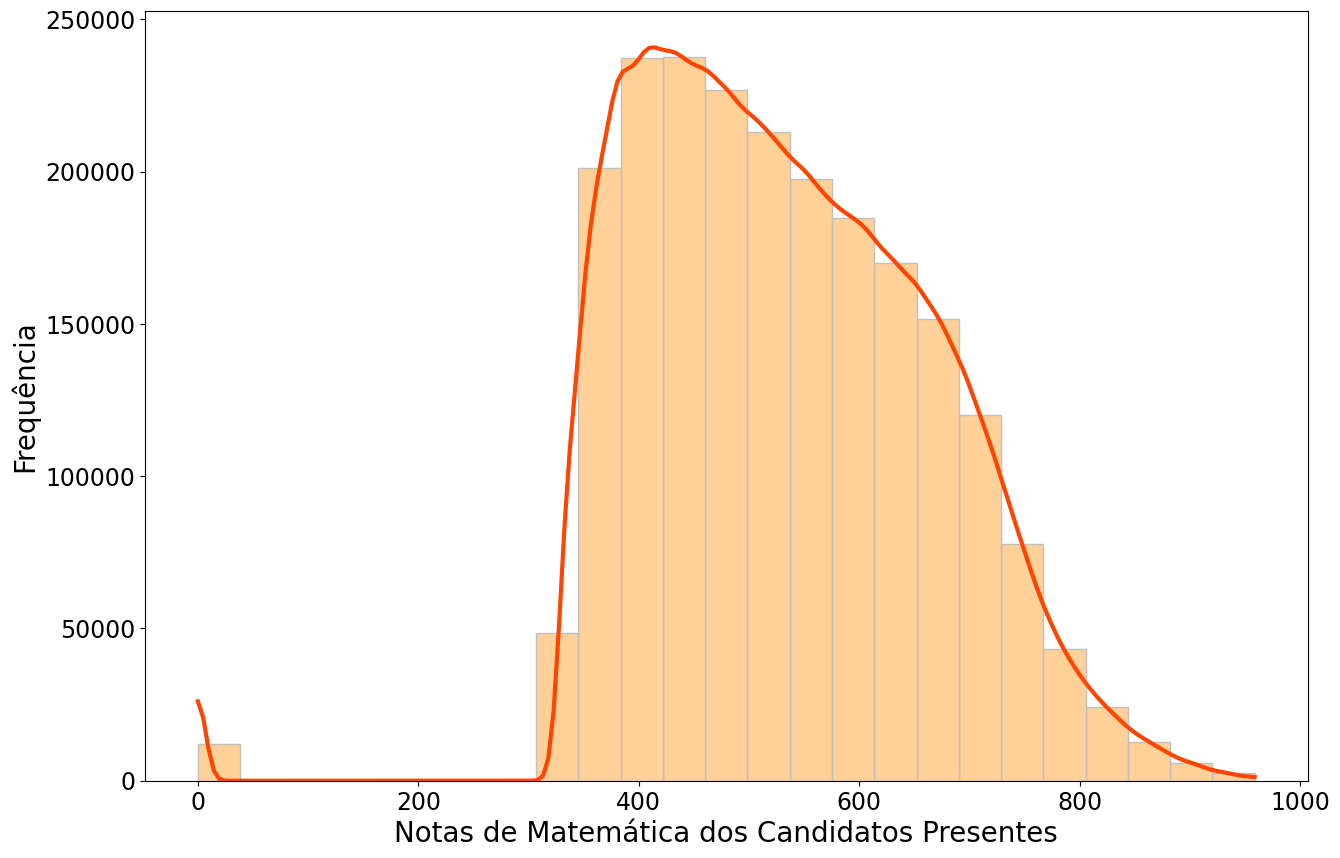

In [87]:
plt.figure(figsize=(15,10))
hist1 = sns.histplot(data=presentes_df_enem_2023['NOTA_MT'], kde=True, bins=25,
                     color = 'darkorange', alpha=0.4, edgecolor='silver',
                     line_kws={'linewidth': 3})
hist1.get_lines()[0].set_color('orangered')
plt.xlabel('Notas de Matemática dos Candidatos Presentes', fontsize=20)
plt.ylabel('Frequência', fontsize=20)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.show()

### Verificação estatística da distribuição das notas de matemática

O teste de Kolmogorov-Smirnov compara a  distribuição de frequência acumulada de um conjunto com uma distribuição teórica esperada, neste caso, a distribuição normal.

Esse teste pode ser usado quando são conhecidas a média e o desvio padrão e é indicado para quantidades grande de observações.

As hipóteses do teste de Kolmogorov-Smirnov neste caso são:

    H0: As notas de matemática seguem uma distribuição normal.
    H1: As notas de matemática não seguem uma distribuição normal.

Considerando o nível de significância de 5%.

Se p-valor for maior que 0,05, não rejeitaremos a H0, isto é, as notas de matemática seguem uma distribuição normal.

Ver mais em "Manual de análise de dados" (p. 227)

In [89]:
stat, p_value_ks = stats.kstest(presentes_df_enem_2023['NOTA_MT'], 'norm', args=(presentes_df_enem_2023['NOTA_MT'].mean(), presentes_df_enem_2023['NOTA_MT'].std()))

alpha = 0.05
if p_value_ks > alpha:
    print(f"p-valor é {p_value_ks}>{alpha} e, portanto, não há evidências para rejeitar a normalidade das notas de matemática.")
else:
    print(f"p-valor é {p_value_ks}<{alpha} e, portanto, as notas de matemática não seguem uma distribuição normal.")

p-valor é 0.0<0.05 e, portanto, as notas de matemática não seguem uma distribuição normal.


#### Transformação de Box-Cox e Logarítmica

Para utilizar um algoritmo de regressão, é necessário que a variável dependente seja aderente a distribuição normal.

Assim faremos a transformação de Box-Cox com o intuito de transformar essa variável aderente a distribuição normal. Caso essa distibuição não ocorra, faremos a transformação logaritmica.

Se, apesar de todas as transformações, a distribuição não se tornar aderente a normalidade, descartaremos a ppossibilidade de usar modelos de regressão.

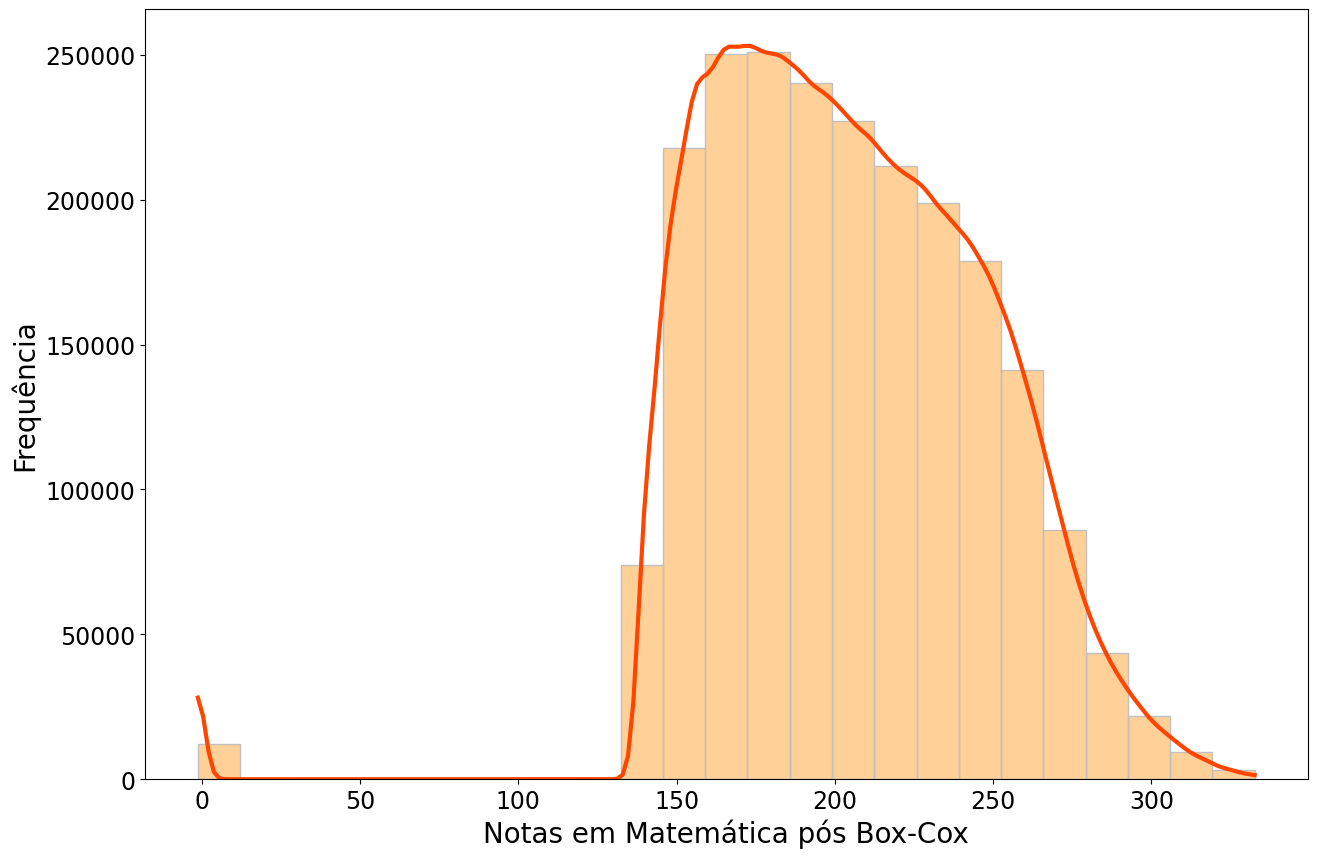

p-valor é 0.0<0.05 e, portanto, os dados não seguem uma distribuição normal.


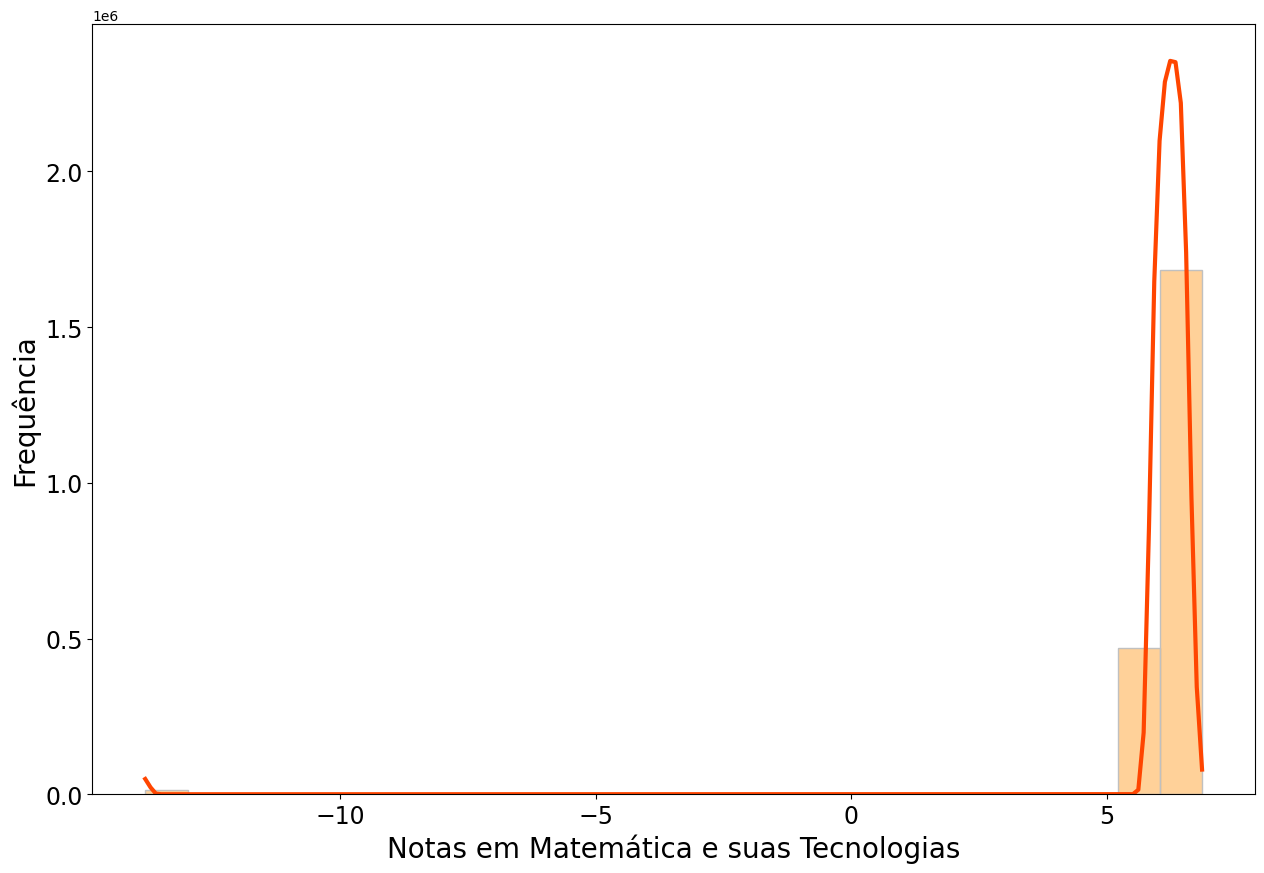

Visto que de nenhuma das tentativas resultou em distribuição de notas aderentes a curva normal, fica descartada a possibilidade de usar algoritmos de regressão.


In [90]:
if p_value_ks<0.05:

    # Transformação das notas zero em um número muito pequeno para conseguir usar o método
    epsilon = 1e-6  # Pequeno deslocamento
    nota_mt_corrigida = presentes_df_enem_2023['NOTA_MT'] + epsilon


    # 'yast' é uma variável que traz os valores transformados (Y*)
    # 'lmbda' é o lambda de Box-Cox
    yast_bc, lmbda_bc = boxcox(nota_mt_corrigida)

    #Gráfico da distribuição de frequência
    plt.figure(figsize=(15,10))
    hist1 = sns.histplot(data=yast_bc, kde=True, bins=25,
                        color = 'darkorange', alpha=0.4, edgecolor='silver',
                        line_kws={'linewidth': 3})
    hist1.get_lines()[0].set_color('orangered')
    plt.xlabel('Notas em Matemática pós Box-Cox', fontsize=20)
    plt.ylabel('Frequência', fontsize=20)
    plt.xticks(fontsize=17)
    plt.yticks(fontsize=17)
    plt.show()

    # Analisa de as notas de matemática, após Box_cox, são aderentes a distribuição normal
    stat_bc, p_value_bc = stats.kstest(yast_bc, 'norm', args=(yast_bc.mean(), yast_bc.std()))

    if p_value_bc > alpha:
        print(f"p-valor é {p_value_bc}>{alpha} e, portanto, a notas após transformação de box-cox segue uma distribuição normal.")
    else:
        print(f"p-valor é {p_value_bc}<{alpha} e, portanto, os dados não seguem uma distribuição normal.")
        
        #Aplicando a transformação logaritmica
        # Analisa de as notas de matemática, após Box_cox, são aderentes a distribuição normal
        nota_mt_corrigida_log=np.log(nota_mt_corrigida)
        stat_log, p_value_log = stats.kstest(nota_mt_corrigida_log, 'norm', args=(nota_mt_corrigida_log.mean(), nota_mt_corrigida_log.std()))


        #Grafico de distribuição de frequencia após transformção log 
        plt.figure(figsize=(15,10))
        hist1 = sns.histplot(data= np.log(nota_mt_corrigida), kde=True, bins=25,
                            color = 'darkorange', alpha=0.4, edgecolor='silver',
                            line_kws={'linewidth': 3})
        hist1.get_lines()[0].set_color('orangered')
        plt.xlabel('Notas em Matemática e suas Tecnologias', fontsize=20)
        plt.ylabel('Frequência', fontsize=20)
        plt.xticks(fontsize=17)
        plt.yticks(fontsize=17)
        plt.show()

        if p_value_log<alpha:
            print('Visto que de nenhuma das tentativas resultou em distribuição de notas aderentes a curva normal, fica descartada a possibilidade de usar algoritmos de regressão.')
        else:
            print('A distribuição das notas, após transformação logaritmica, é aderente a distribuição normal.')
        


Visto que de nenhuma das tentativas resultou em distribuição de notas aderentes a curva normal, fica descartada a possibilidade de usar algoritmos de regressão.

### Boxplot das notas

Colocar todos na mesma escala no eixo y para poder comparar

In [91]:
colunas_notas=['NOTA_CN', 'NOTA_CH', 'NOTA_LC', 'NOTA_MT', 'NOTA_REDACAO']
colunas_notas_redacao=[ 'NOTA_COMP1_REDACAO','NOTA_COMP2_REDACAO', 'NOTA_COMP3_REDACAO', 'NOTA_COMP4_REDACAO','NOTA_COMP5_REDACAO']

In [92]:
notas_presentes_df_enem_2023=presentes_df_enem_2023[colunas_notas]
notas_redacao_presentes_df_enem_2023=presentes_df_enem_2023[colunas_notas_redacao]

### Boxplot - Provas Objetivas - Presentes

Boxplot da nota dos candidatos que estiveram presentes no dia da prova de matemática

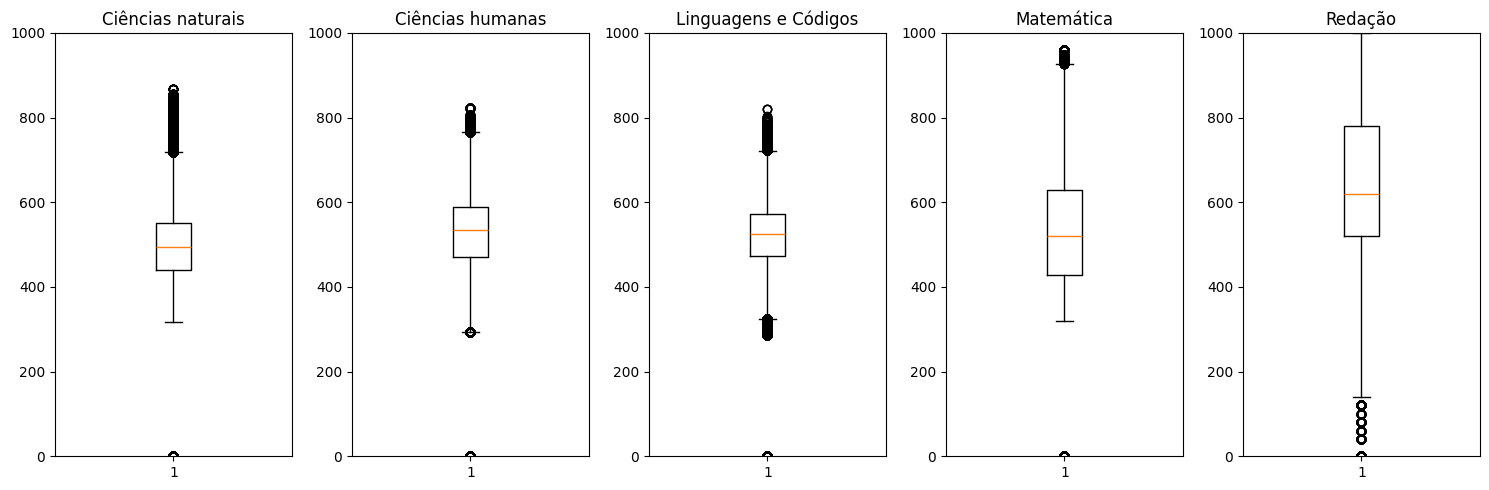

In [99]:

# Criar a figura e os subplots
fig, axes = plt.subplots(1, len(colunas_notas), figsize=(15, 5))
nomes_display={'NOTA_CN': 'Ciências naturais', 'NOTA_CH':'Ciências humanas', 'NOTA_LC': 'Linguagens e Códigos', 'NOTA_MT':'Matemática', 'NOTA_REDACAO':'Redação'}
# Gerar um boxplot para cada coluna
for i, coluna in enumerate(notas_presentes_df_enem_2023.columns):
    # Usando matplotlib
    axes[i].boxplot(notas_presentes_df_enem_2023[coluna])
    titulo = nomes_display.get(coluna, coluna)
    axes[i].set_title(titulo)
    axes[i].set_ylim(0, 1000)

plt.tight_layout()  # Ajusta o espaçamento entre os gráficos
plt.show()


### Boxplot - Redação - Presentes

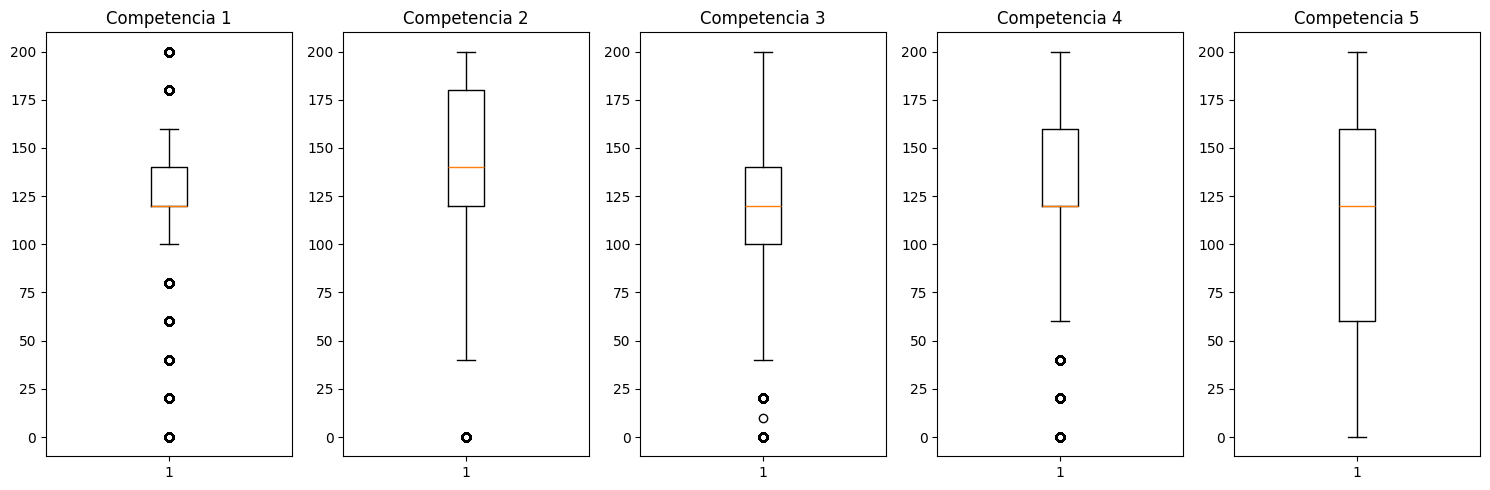

In [94]:
# Criar a figura e os subplots
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
nomes_display={'NOTA_COMP1_REDACAO': 'Competencia 1',
               'NOTA_COMP2_REDACAO': 'Competencia 2',
               'NOTA_COMP3_REDACAO': 'Competencia 3',
               'NOTA_COMP4_REDACAO': 'Competencia 4',
               'NOTA_COMP5_REDACAO': 'Competencia 5'}
    # Gerar um boxplot para cada coluna
for i, coluna in enumerate(notas_redacao_presentes_df_enem_2023.columns):
    # Usando matplotlib
    axes[i].boxplot(notas_redacao_presentes_df_enem_2023[coluna])
    titulo = nomes_display.get(coluna, coluna)
    axes[i].set_title(titulo)
    
    # Alternativamente, usando seaborn (descomente as linhas abaixo)
    # sns.boxplot(data=df, y=coluna, ax=axes[i])
    # axes[i].set_title(coluna)
    # axes[i].set_xlabel('')  # Remove o label do eixo x

plt.tight_layout()  # Ajusta o espaçamento entre os gráficos
plt.show()

### Boxplot - Provas objetivas - Top20

Boxplot da nota dos candidatos que estão entre os melhores em matemática

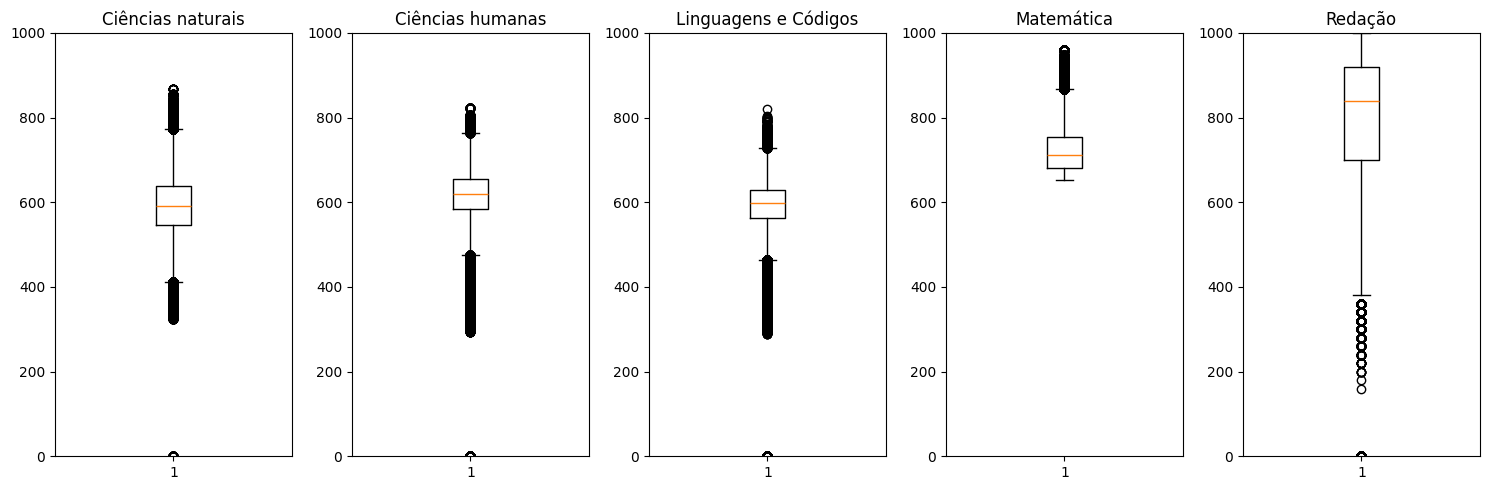

In [98]:
notas_top20_df_enem_2023=top_20[colunas_notas]
notas_redacao_top20_df_enem_2023=top_20[colunas_notas_redacao]

# Criar a figura e os subplots
fig, axes = plt.subplots(1, len(colunas_notas), figsize=(15, 5))
nomes_display={'NOTA_CN': 'Ciências naturais', 'NOTA_CH':'Ciências humanas', 'NOTA_LC': 'Linguagens e Códigos', 'NOTA_MT':'Matemática', 'NOTA_REDACAO':'Redação'}
# Gerar um boxplot para cada coluna
for i, coluna in enumerate(notas_top20_df_enem_2023.columns):
    # Usando matplotlib
    axes[i].boxplot(notas_top20_df_enem_2023[coluna])
    titulo = nomes_display.get(coluna, coluna)
    axes[i].set_title(titulo)
    axes[i].set_ylim(0, 1000)

plt.tight_layout()  # Ajusta o espaçamento entre os gráficos
plt.show()


### Correlação entre as notas provas objetivas

In [100]:
correlacao_notas_presentes=presentes_df_enem_2023[colunas_notas].corr()
correlacao_notas_presentes

NOTA_CN   NOTA_CH   NOTA_LC   NOTA_MT  NOTA_REDACAO
NOTA_CN       1.000000  0.615178  0.599665  0.720745      0.449901
NOTA_CH       0.615178  1.000000  0.765228  0.638280      0.492324
NOTA_LC       0.599665  0.765228  1.000000  0.629340      0.498577
NOTA_MT       0.720745  0.638280  0.629340  1.000000      0.515892
NOTA_REDACAO  0.449901  0.492324  0.498577  0.515892      1.000000

<Axes: >

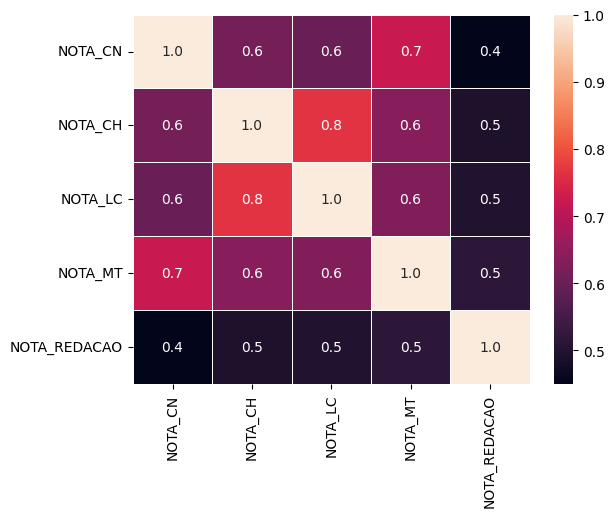

In [101]:
sns.heatmap(correlacao_notas_presentes, annot = True, fmt=".1f", linewidths=.6)


In [102]:
correlacao_notas_top20=top_20[colunas_notas].corr()
correlacao_notas_top20

NOTA_CN   NOTA_CH   NOTA_LC   NOTA_MT  NOTA_REDACAO
NOTA_CN       1.000000  0.535304  0.467989  0.603242      0.332069
NOTA_CH       0.535304  1.000000  0.713539  0.386739      0.358911
NOTA_LC       0.467989  0.713539  1.000000  0.351880      0.329111
NOTA_MT       0.603242  0.386739  0.351880  1.000000      0.279860
NOTA_REDACAO  0.332069  0.358911  0.329111  0.279860      1.000000

<Axes: >

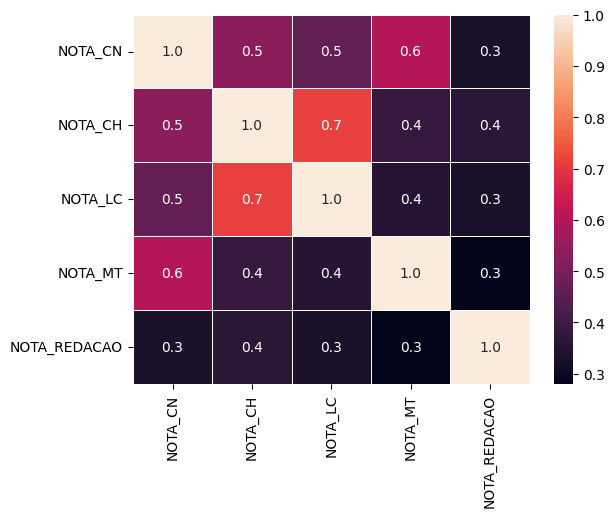

In [103]:
sns.heatmap(correlacao_notas_top20, annot = True, fmt=".1f", linewidths=.6)


### Boxplot Presentes - Matemática

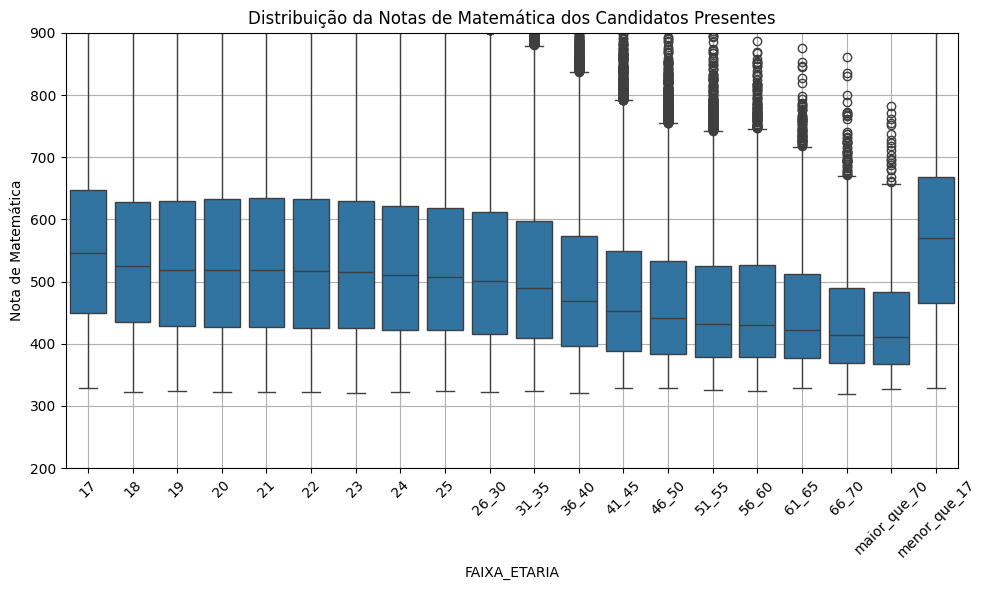

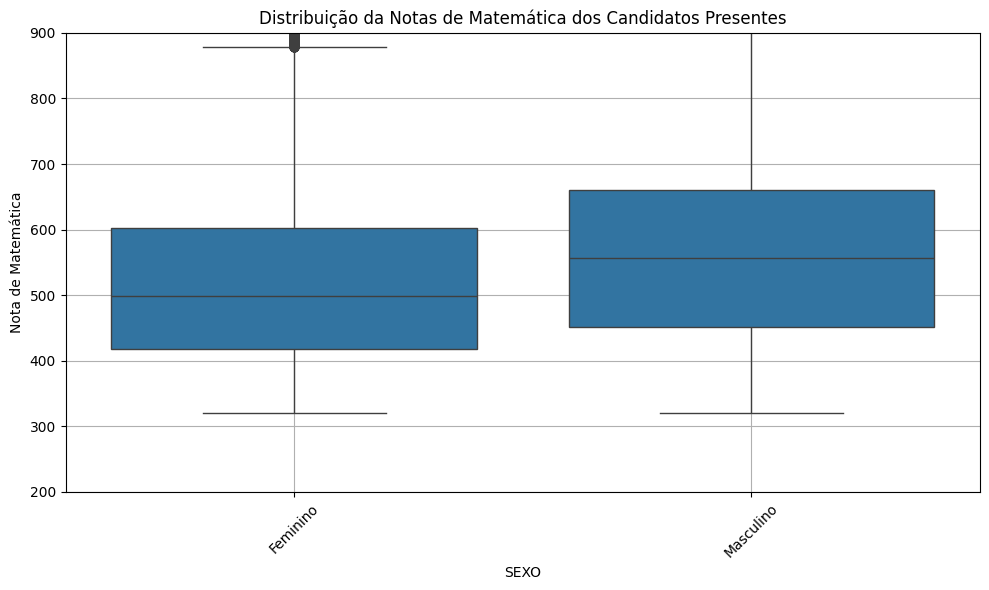

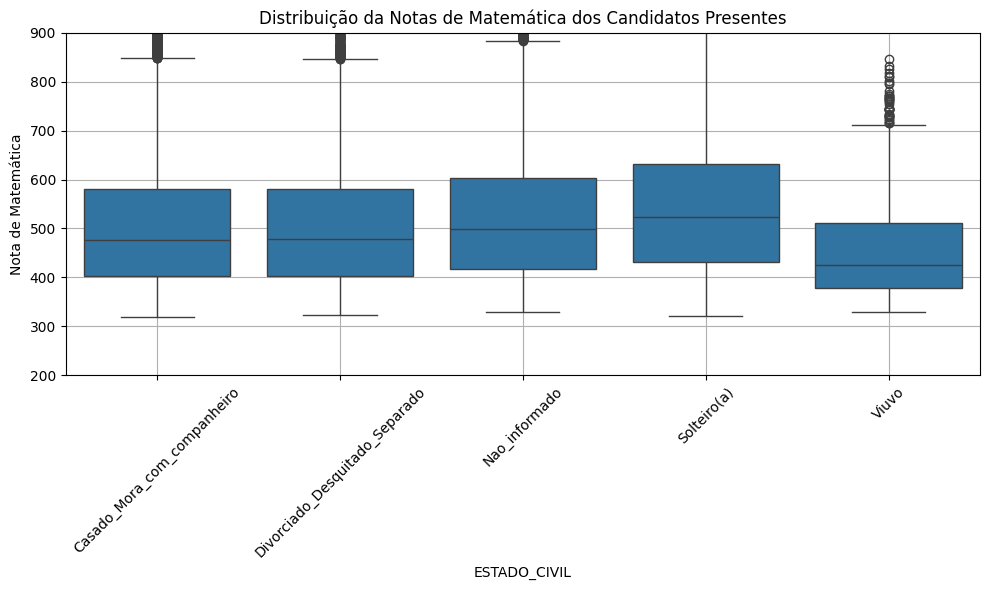

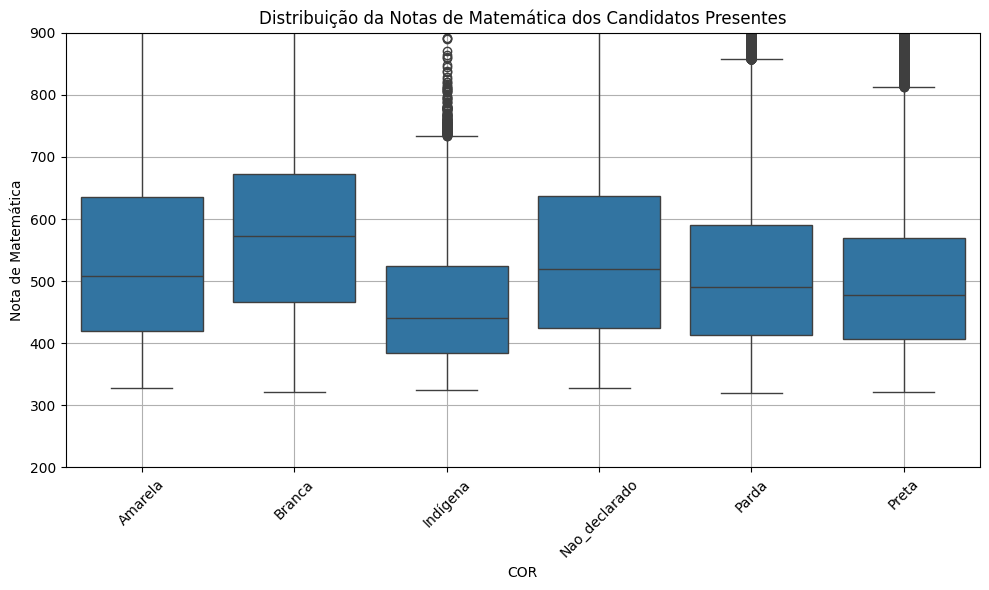

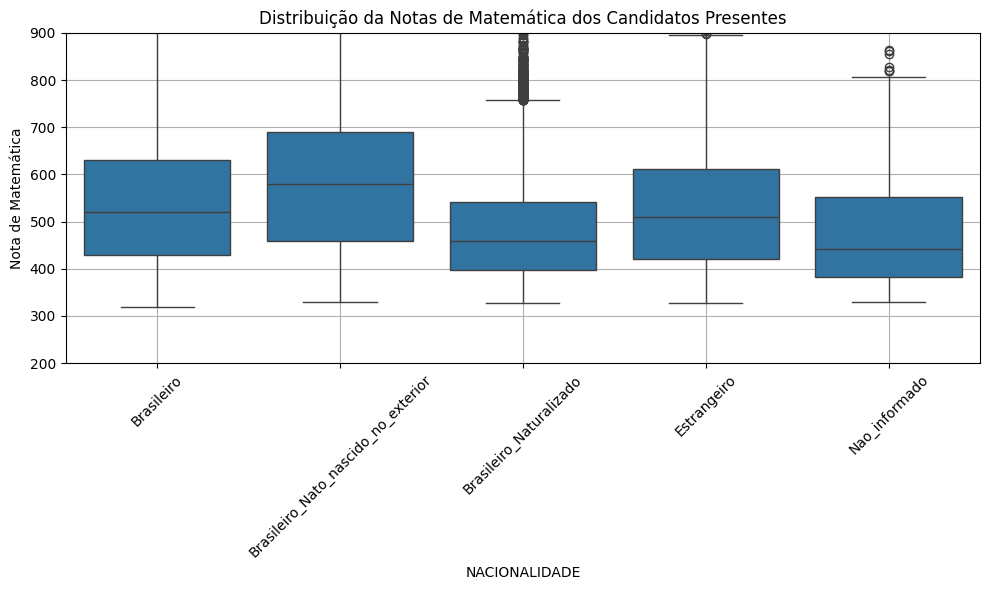

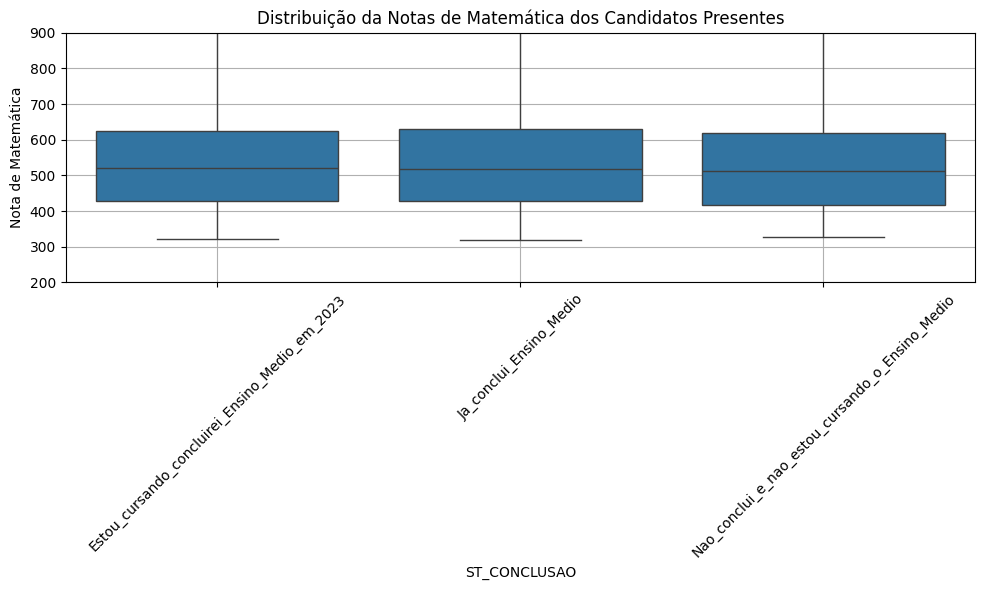

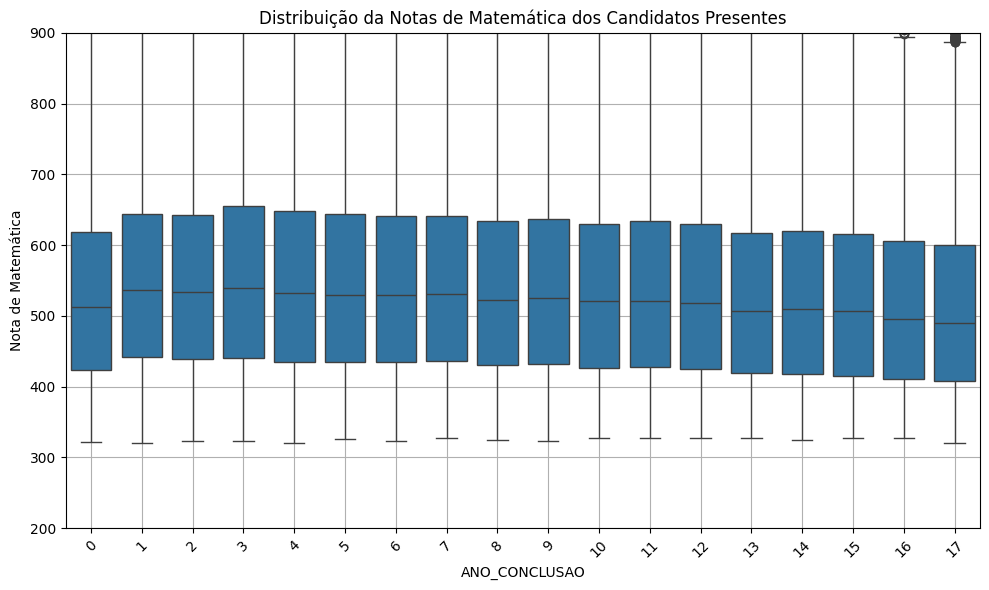

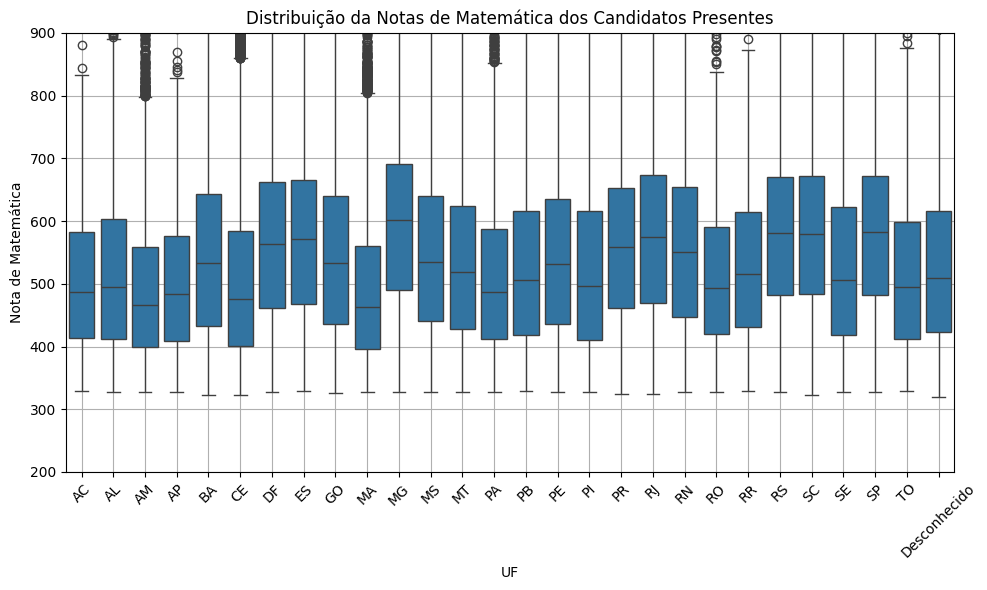

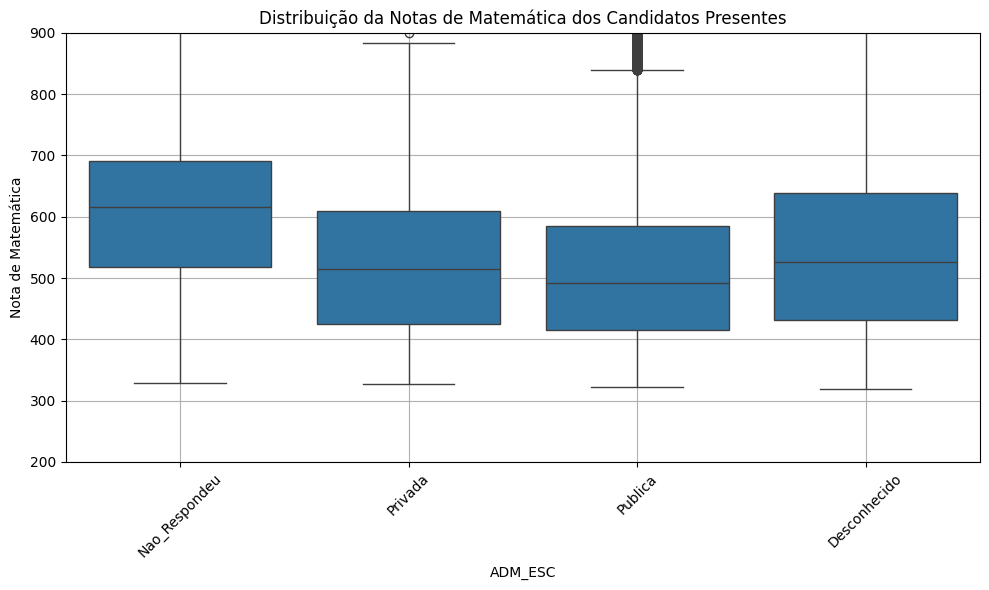

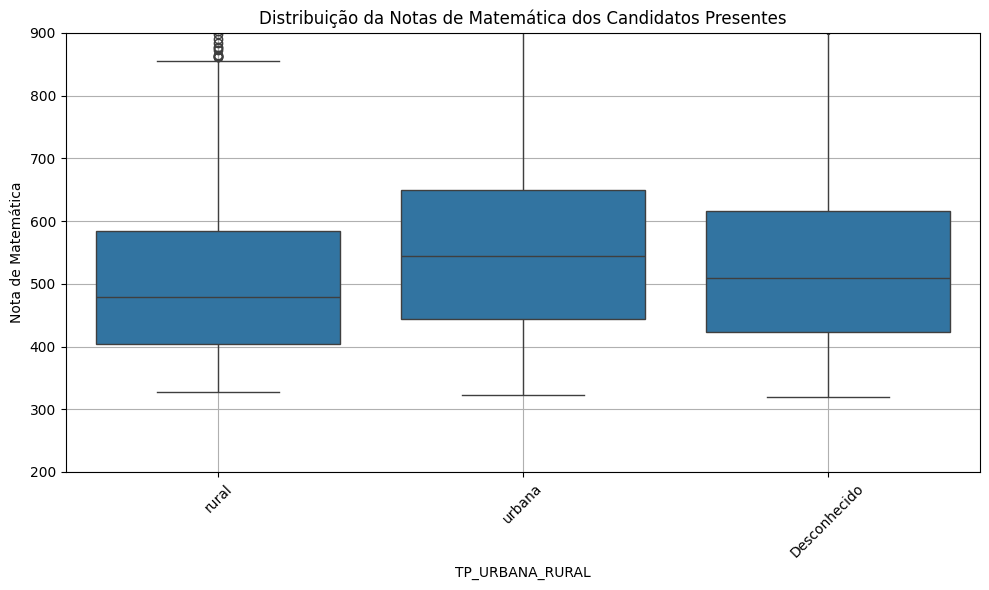

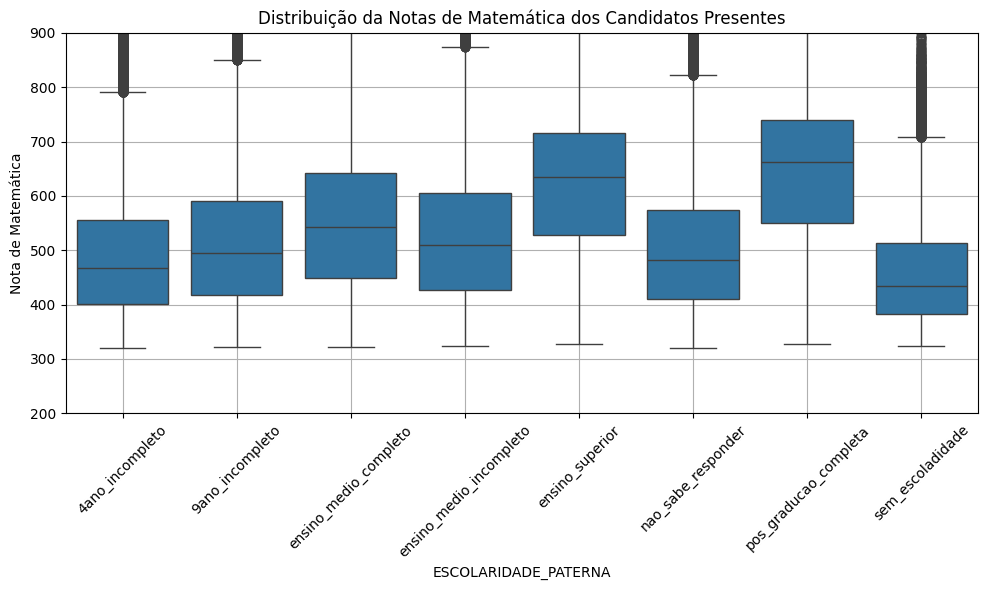

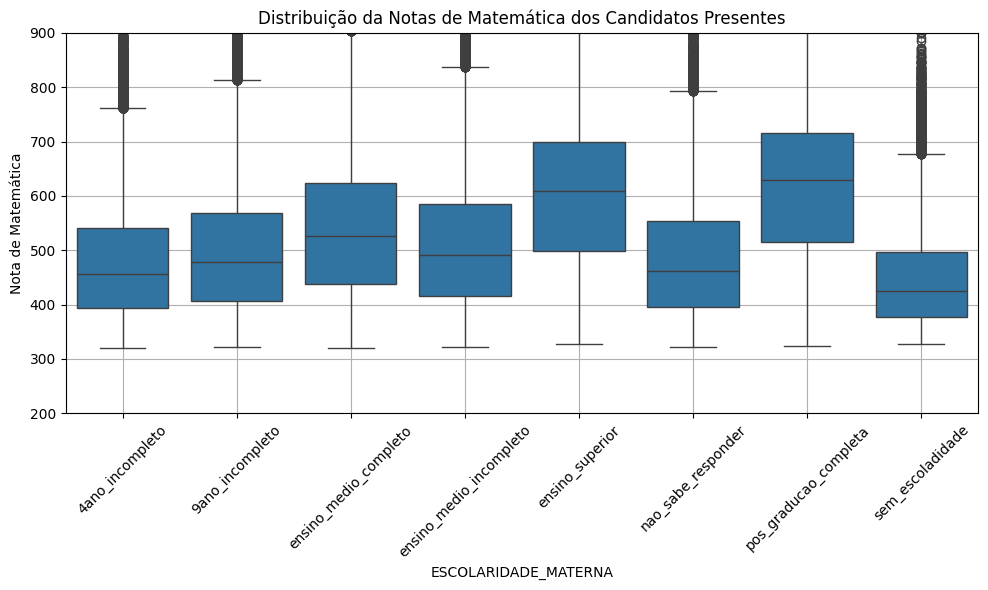

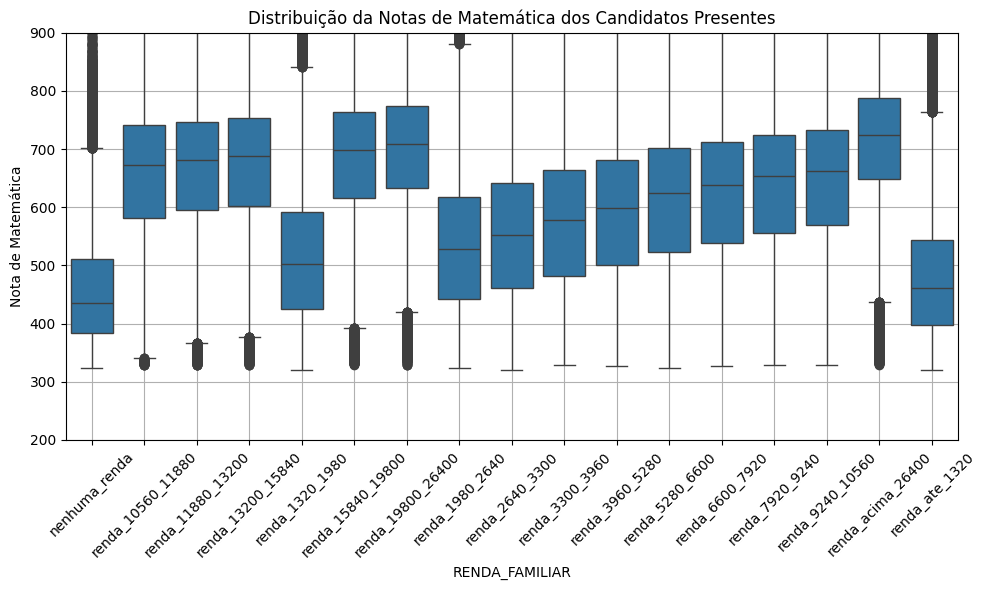

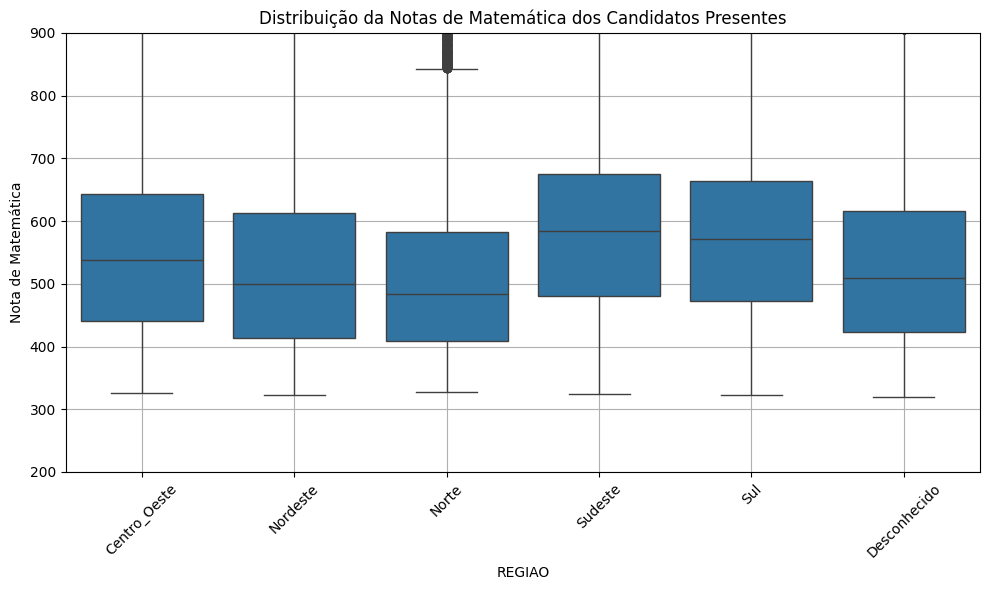

In [105]:
for cat in categoricas:    
    df_melt = presentes_df_enem_2023.melt(
        id_vars=cat,
        value_vars=['NOTA_MT'],
        var_name='Área',
        value_name='Nota'
    )

    # Um único gráfico com boxplots por REGIAO
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df_melt, x=cat, y='Nota')

    plt.title(f'Distribuição da Notas de Matemática dos Candidatos Presentes')
    plt.ylabel('Nota de Matemática')
    plt.ylim(200, 900)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

### Boxplot Presentes - Média

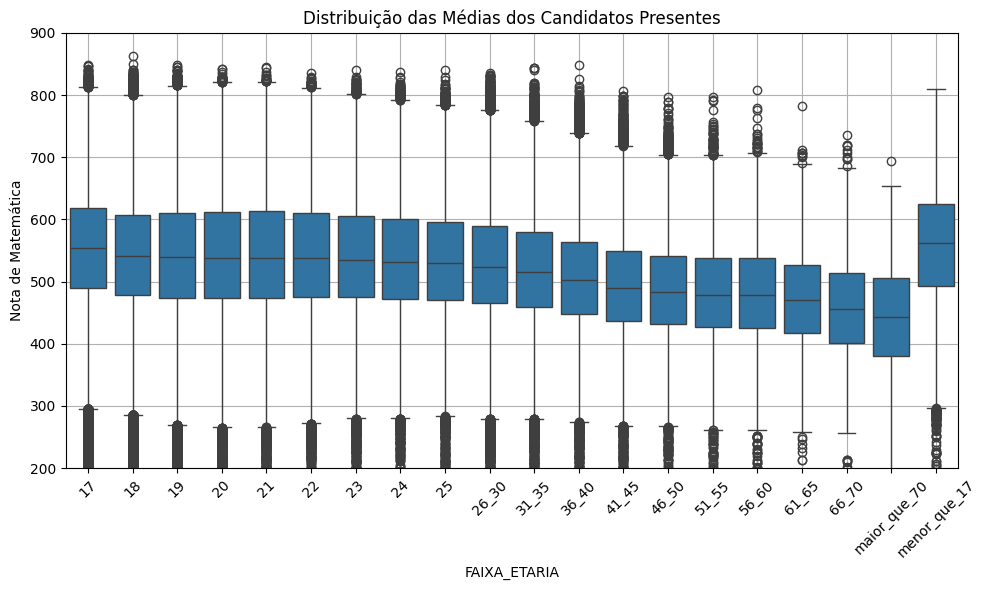

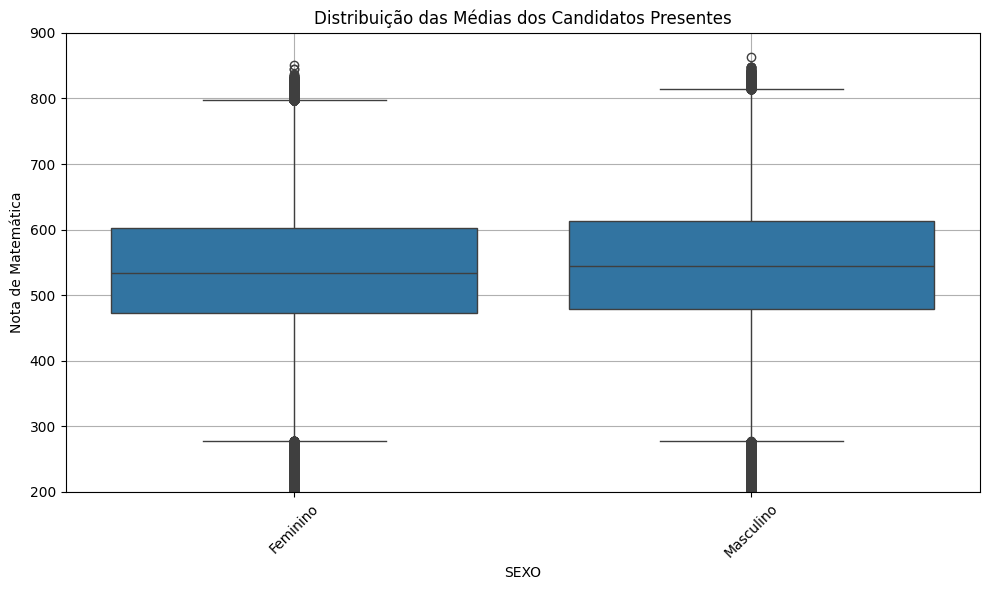

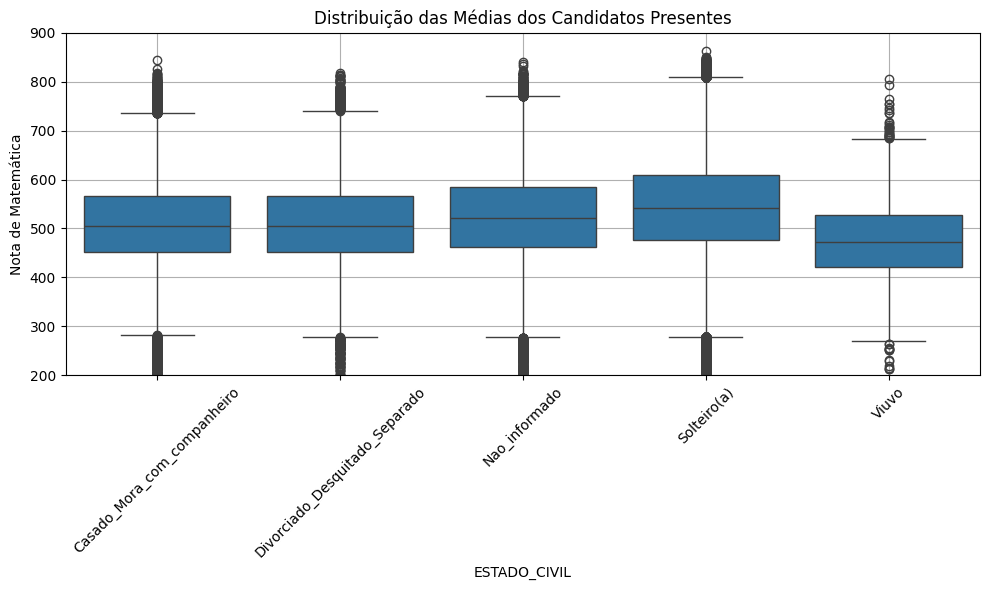

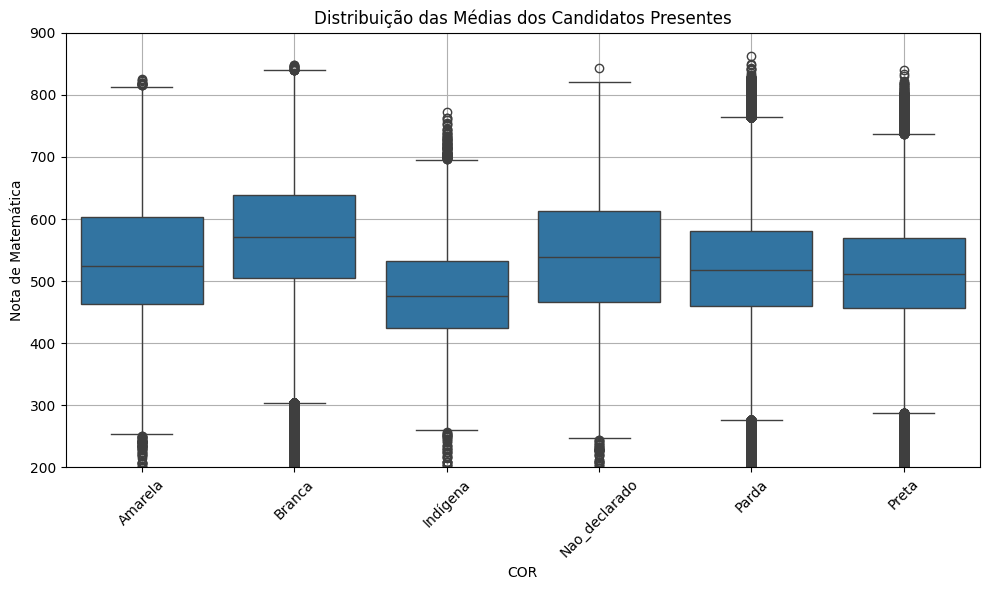

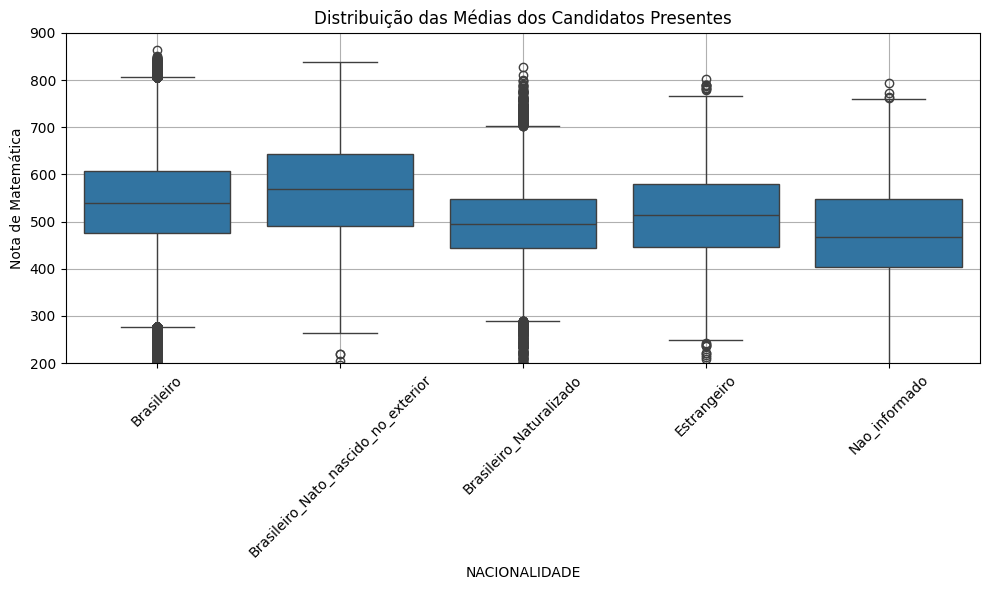

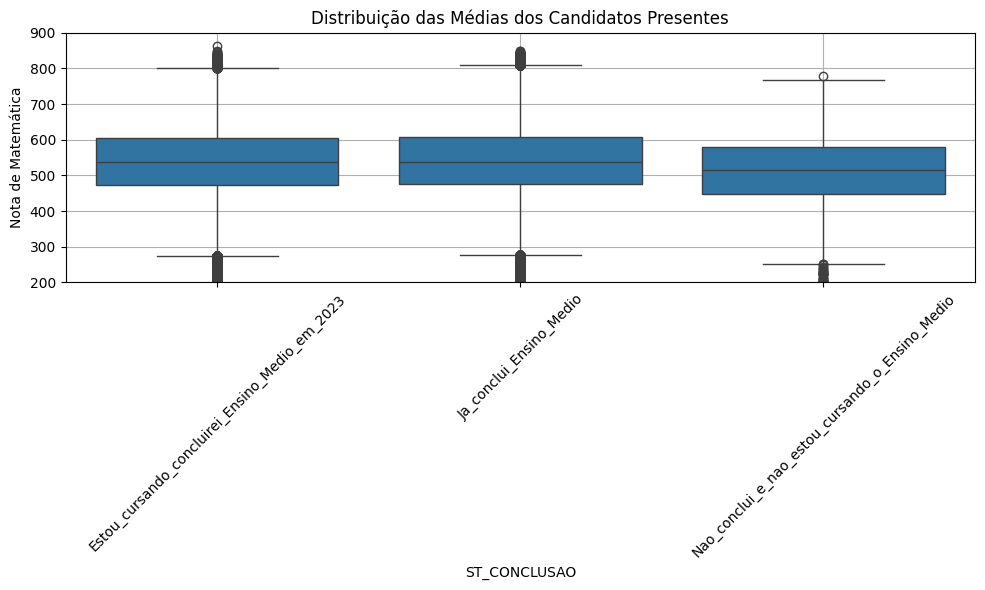

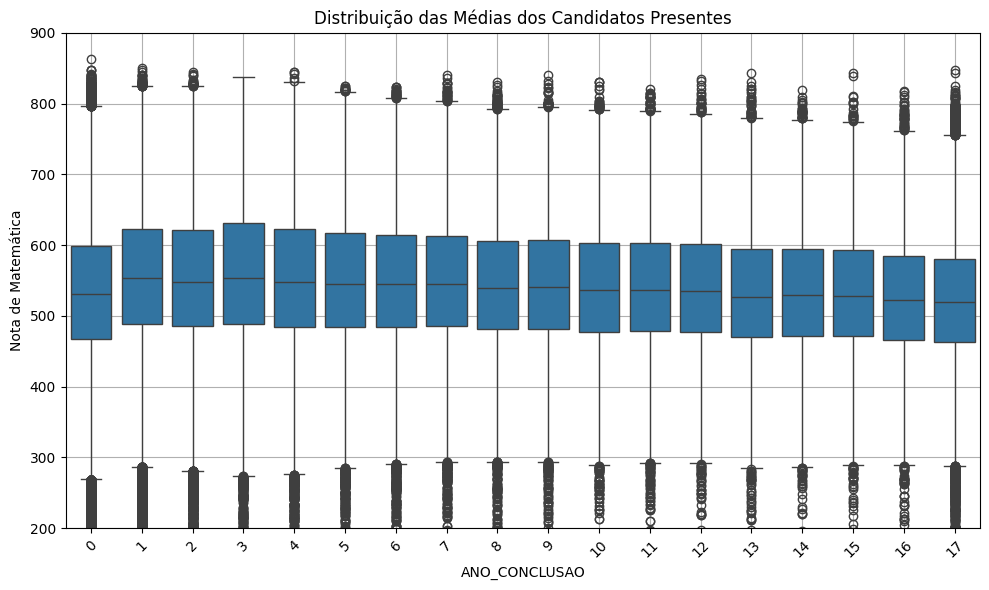

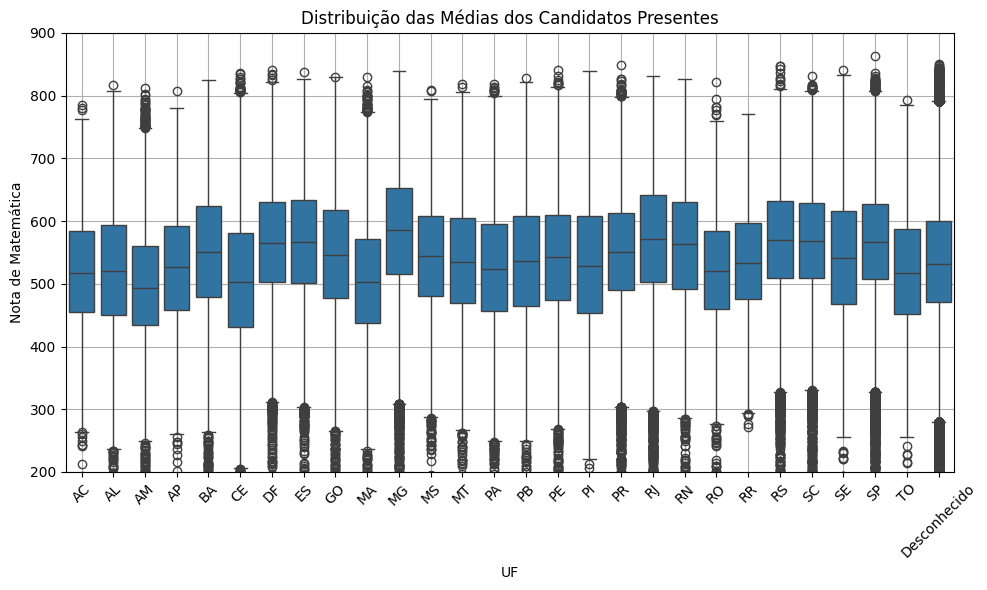

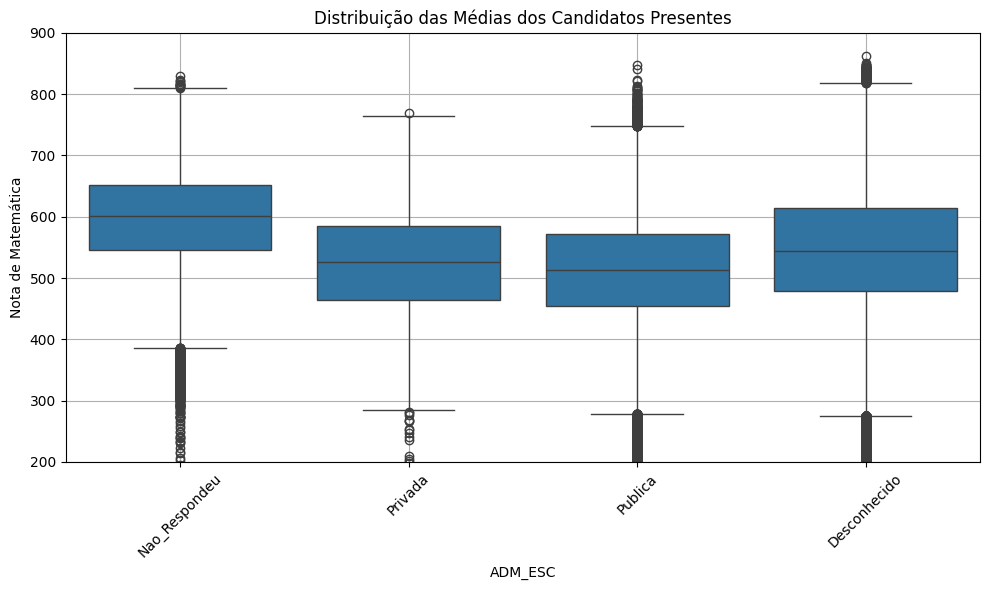

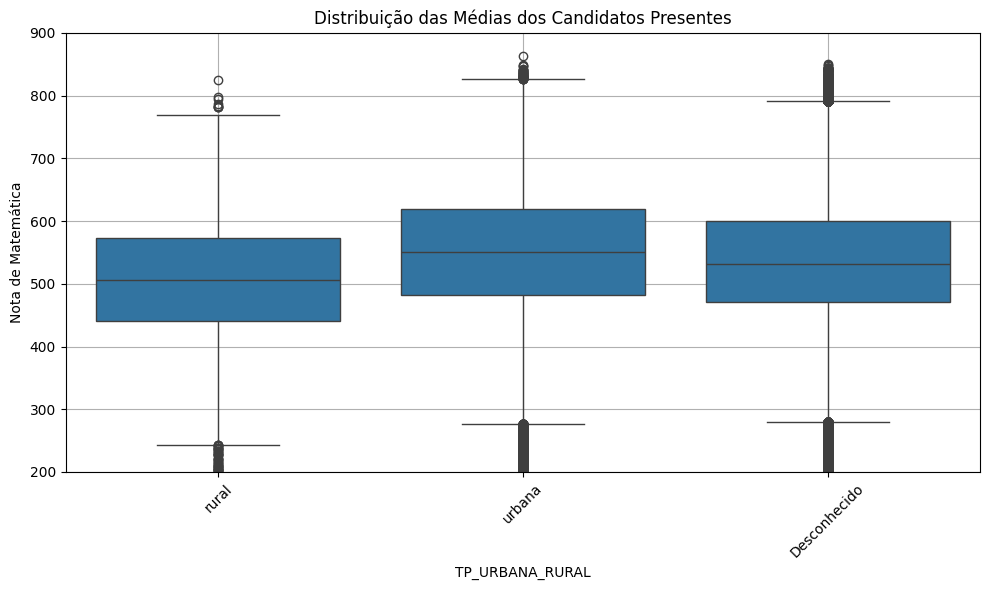

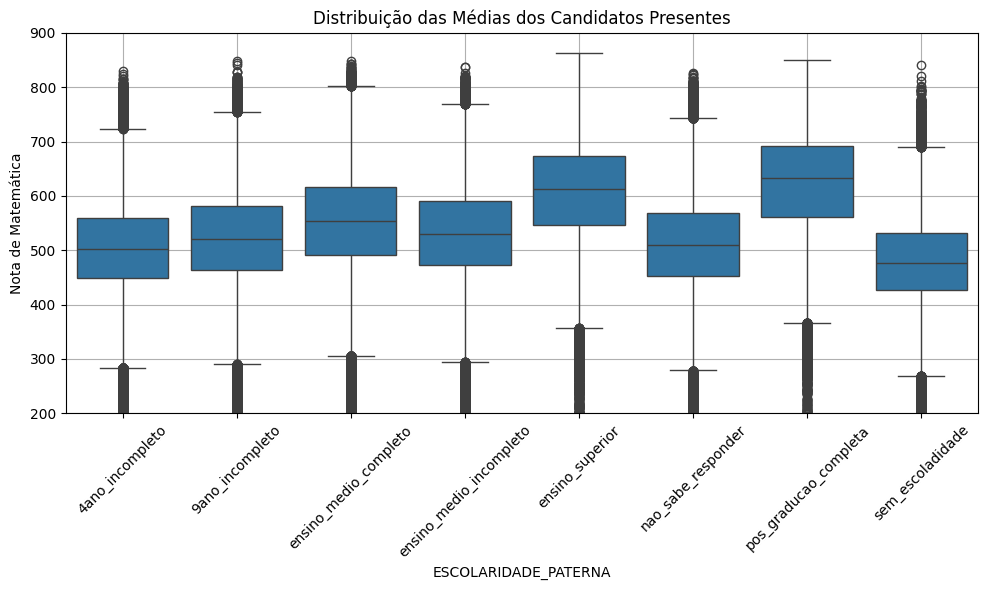

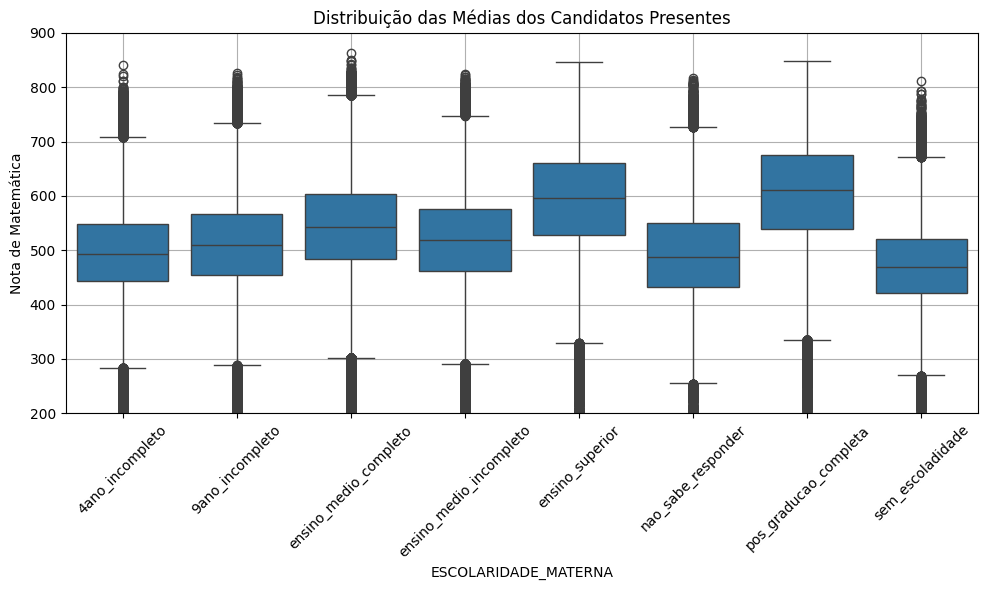

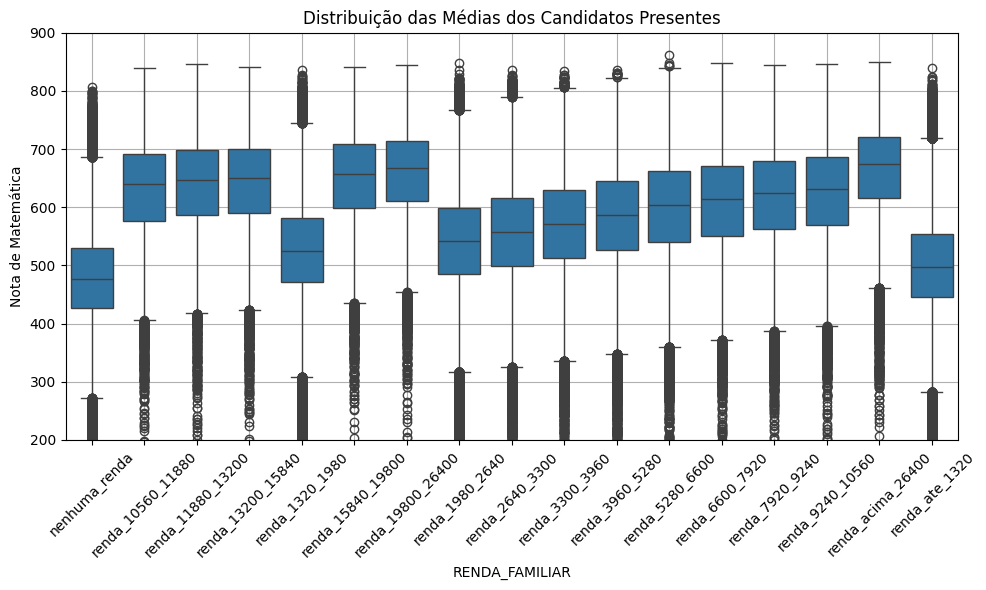

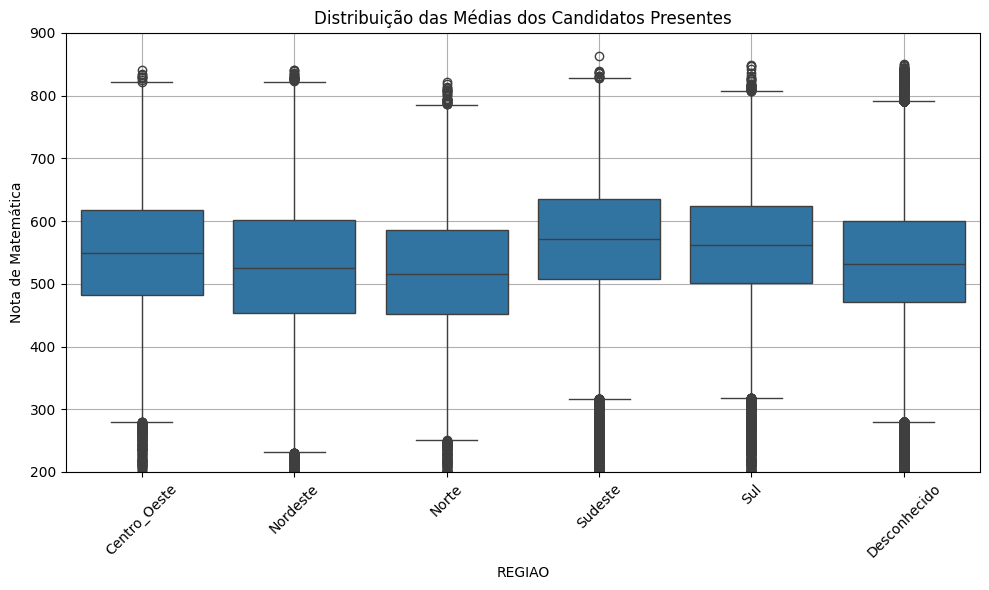

In [106]:
for cat in categoricas:    
    df_melt = presentes_df_enem_2023.melt(
        id_vars=cat,
        value_vars=['MEDIA'],
        var_name='Área',
        value_name='Nota'
    )

    # Um único gráfico com boxplots por REGIAO
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df_melt, x=cat, y='Nota')

    plt.title(f'Distribuição das Médias dos Candidatos Presentes')
    plt.ylabel('Nota de Matemática')
    plt.xticks(rotation=45)
    plt.ylim(200, 900)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

### Boxplot Top20 - Matemática

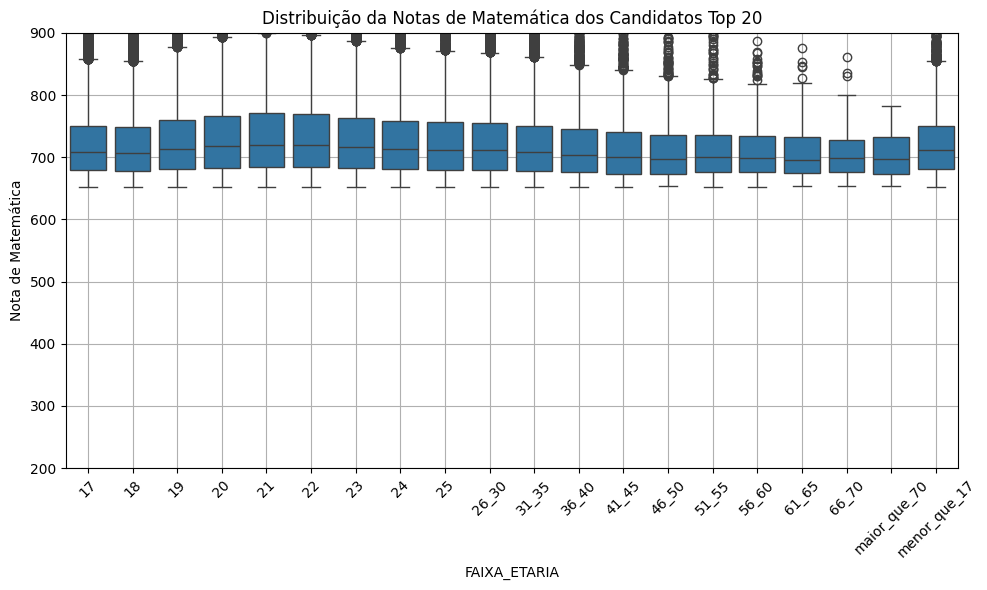

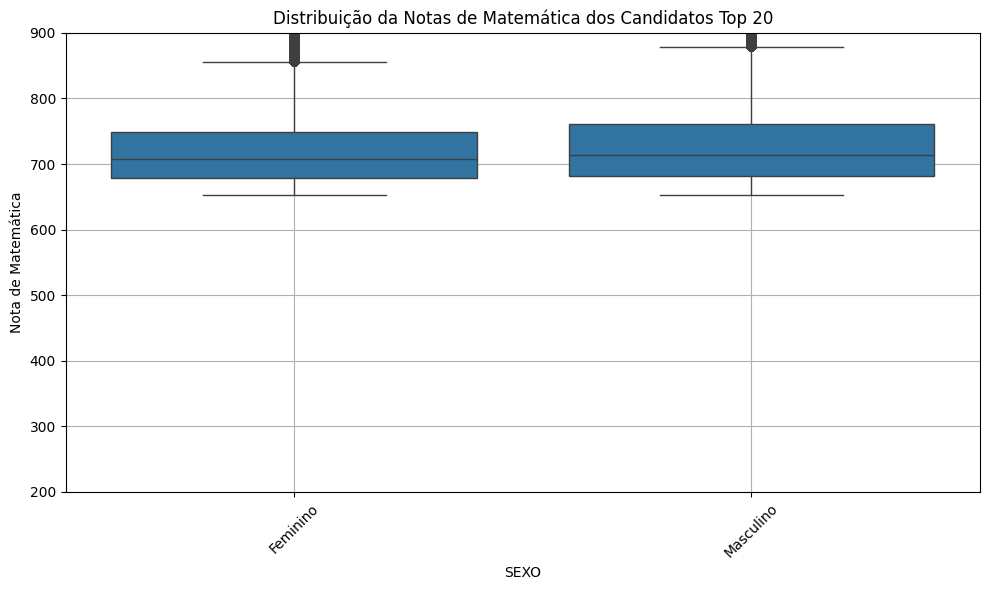

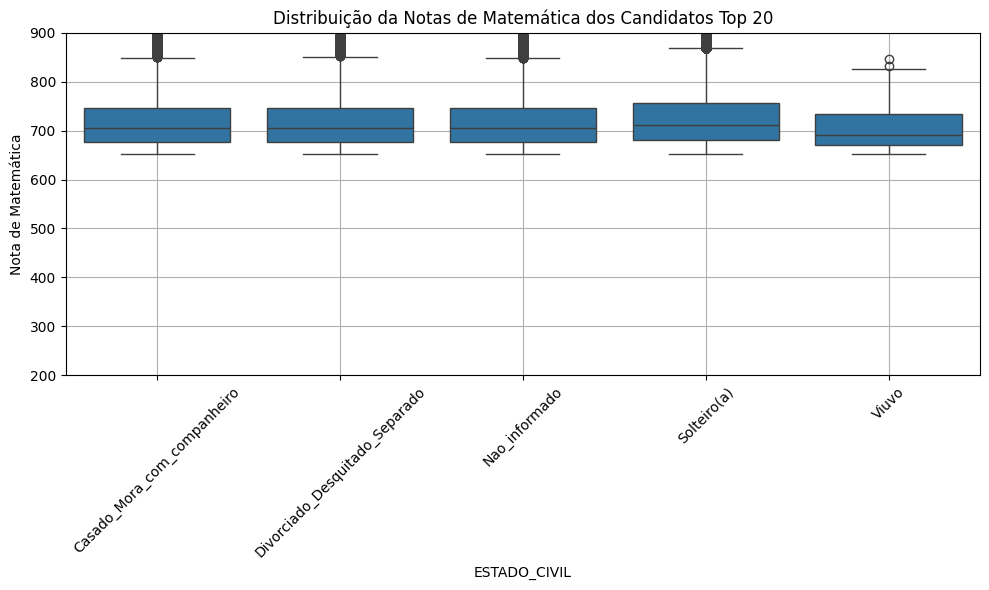

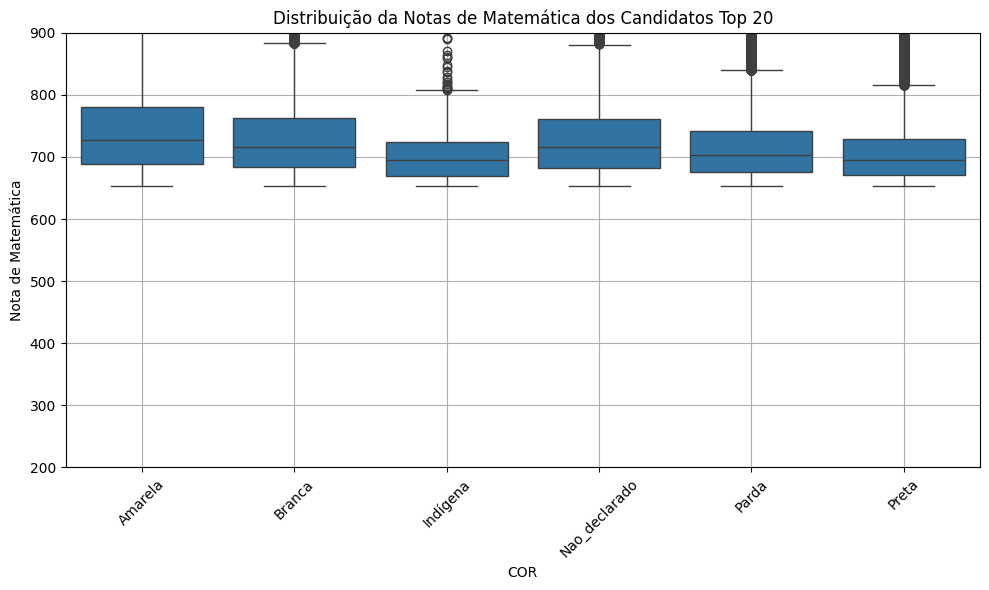

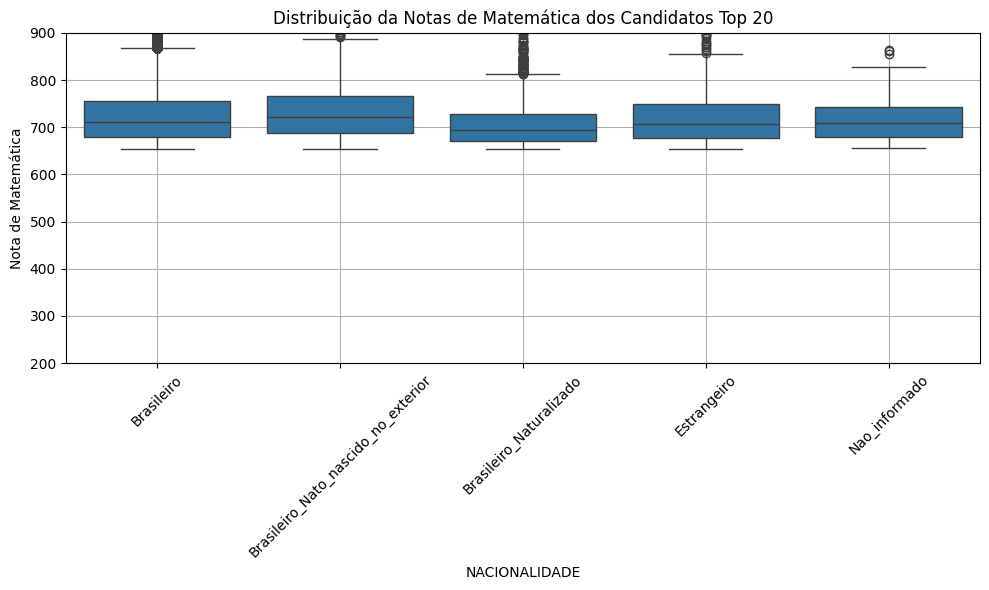

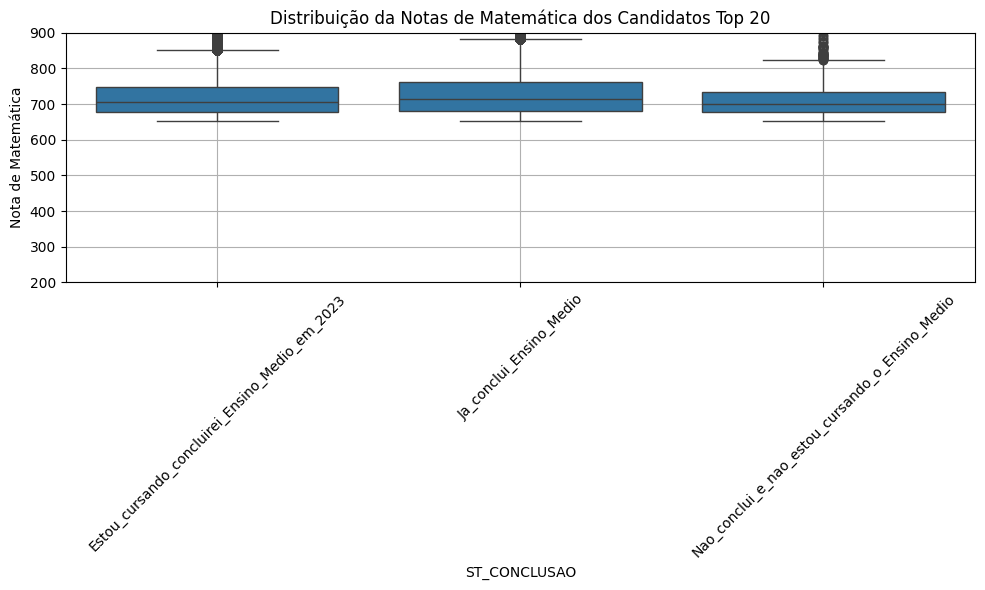

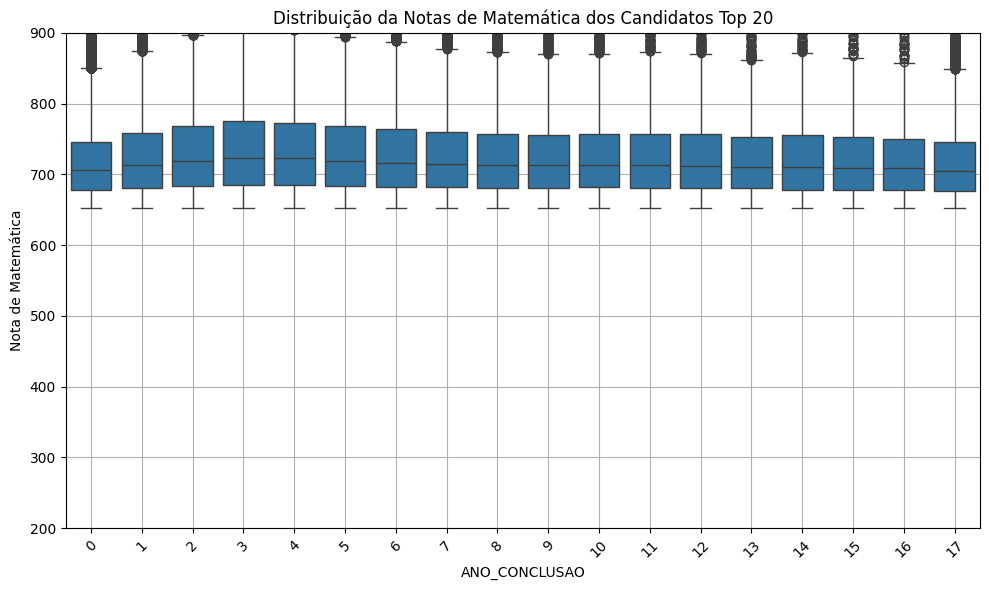

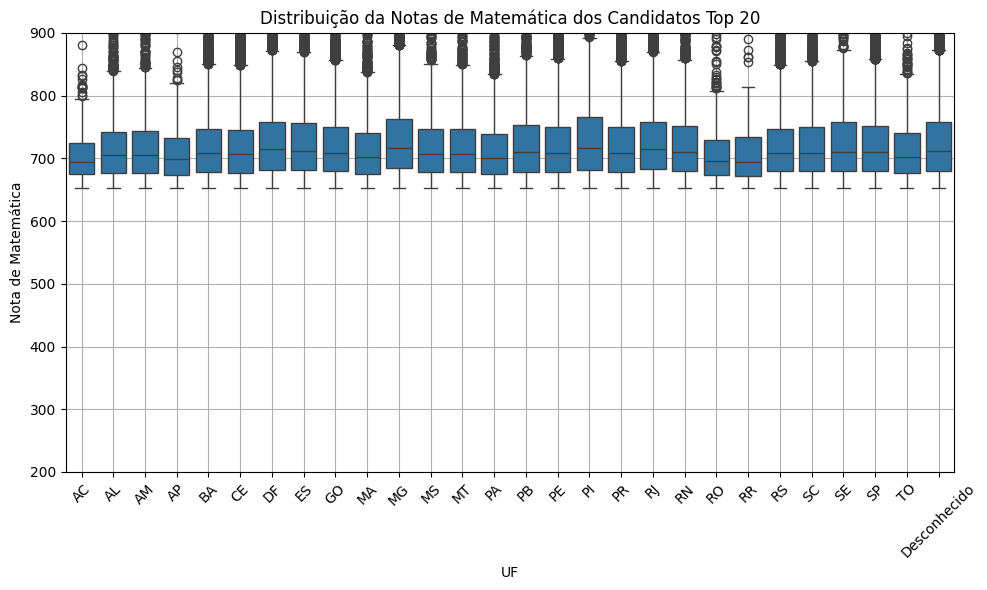

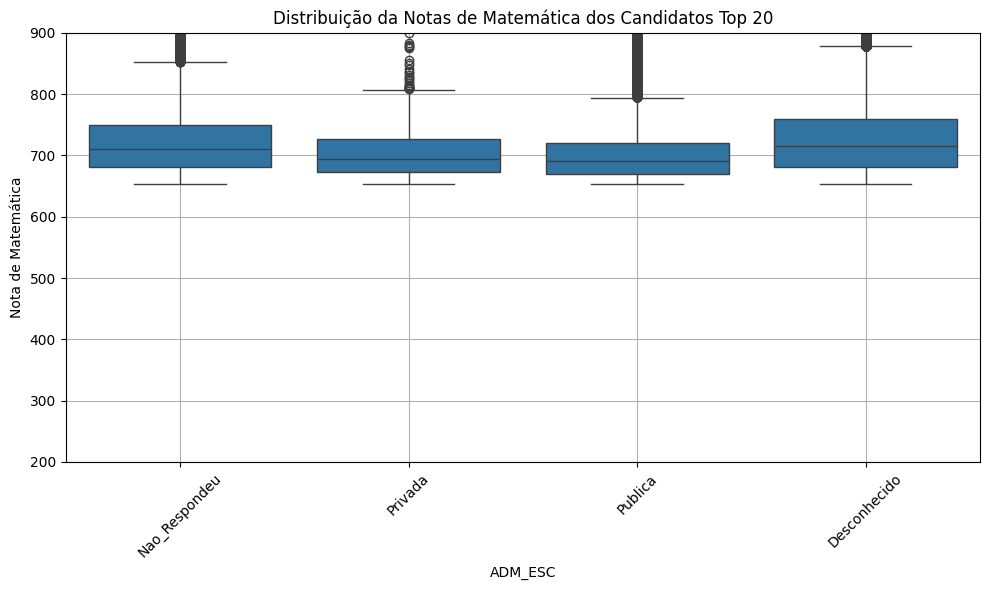

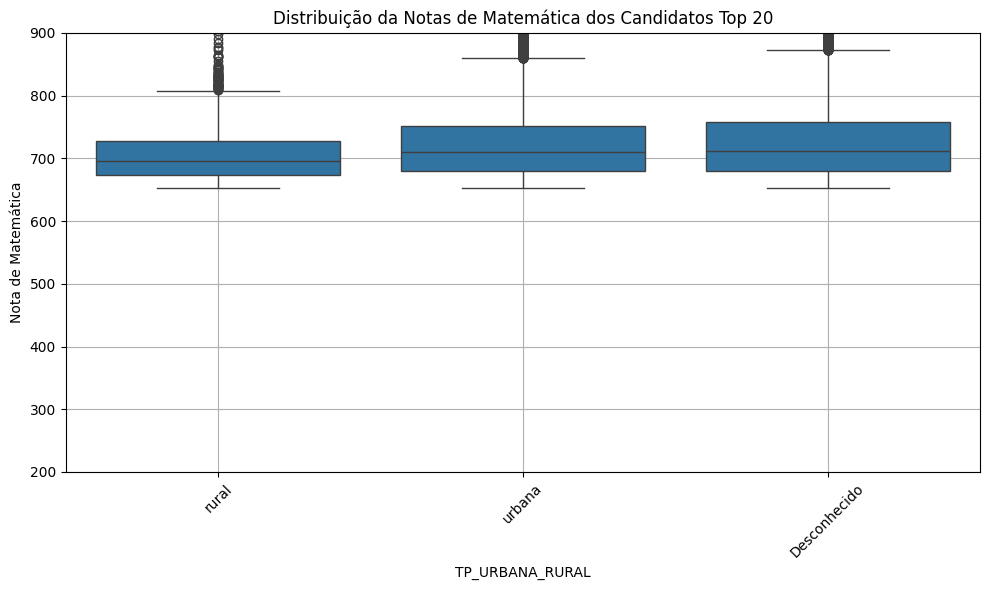

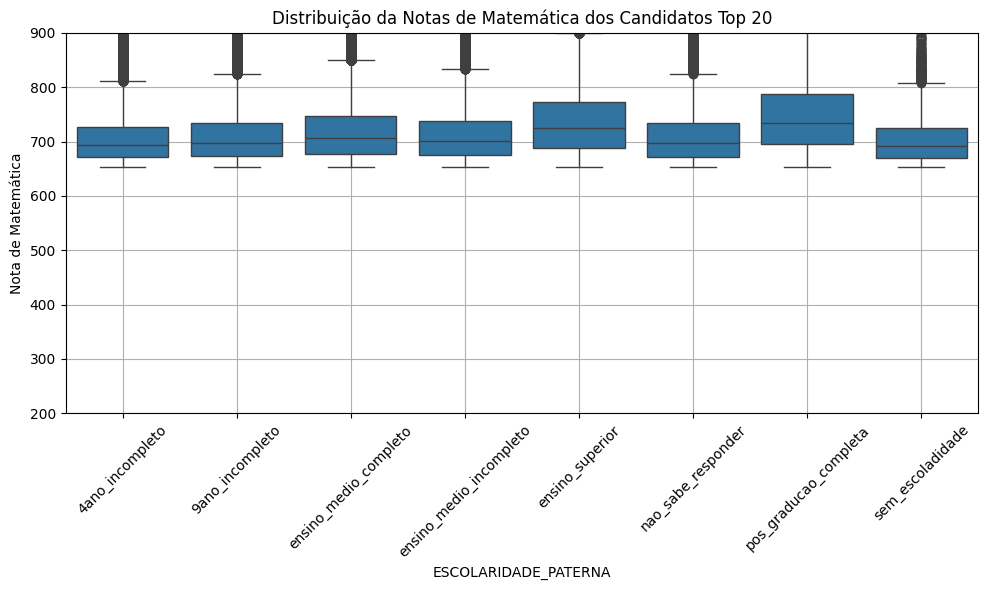

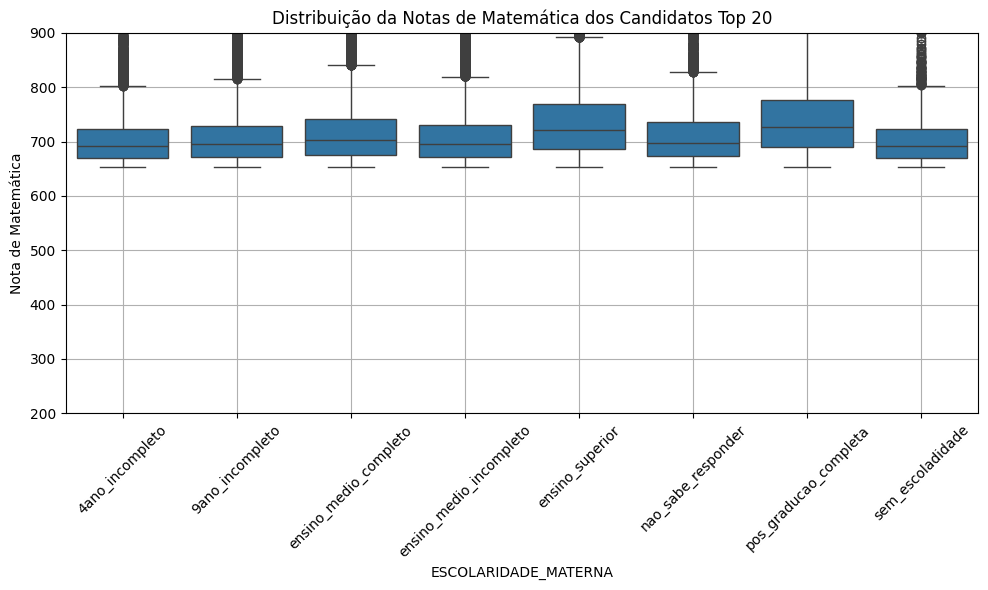

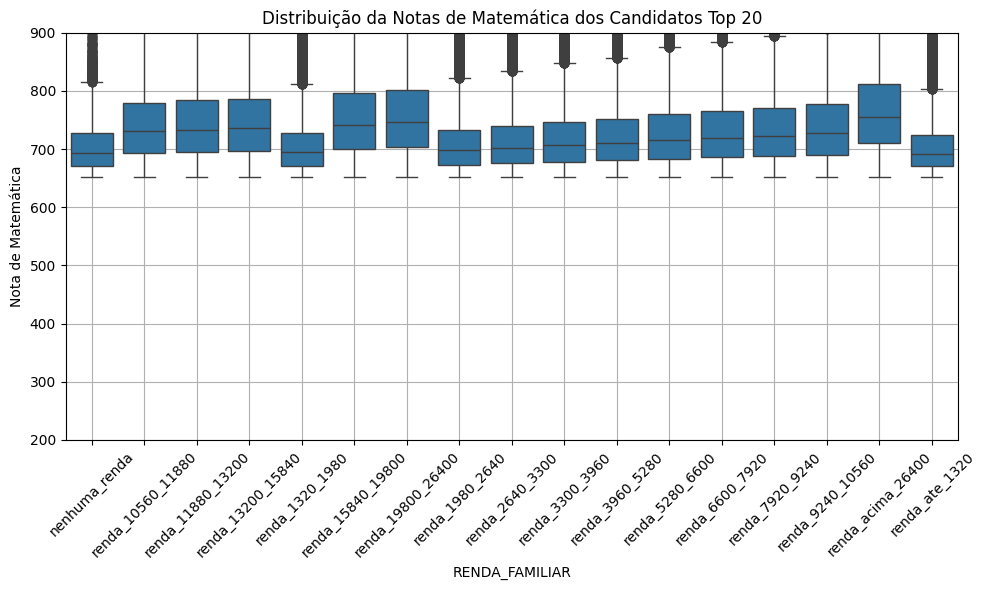

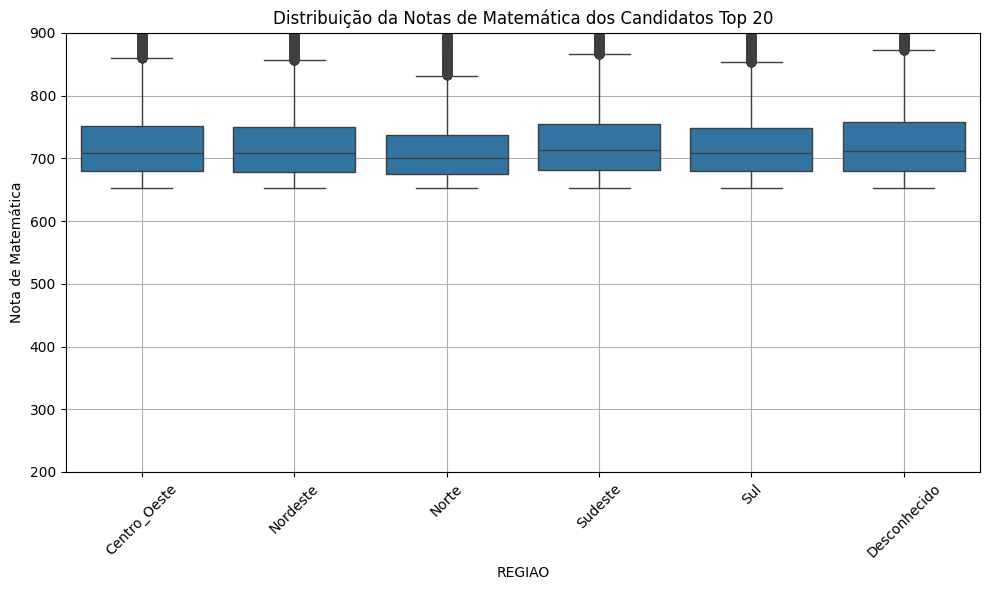

In [107]:
for cat in categoricas:    
    df_melt = top_20.melt(
        id_vars=cat,
        value_vars=['NOTA_MT'],
        var_name='Área',
        value_name='Nota'
    )

    # Um único gráfico com boxplots por REGIAO
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df_melt, x=cat, y='Nota')

    plt.title(f'Distribuição da Notas de Matemática dos Candidatos Top 20')
    plt.ylabel('Nota de Matemática')
    plt.ylim(200, 900)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

### Boxplot Top20 - Média

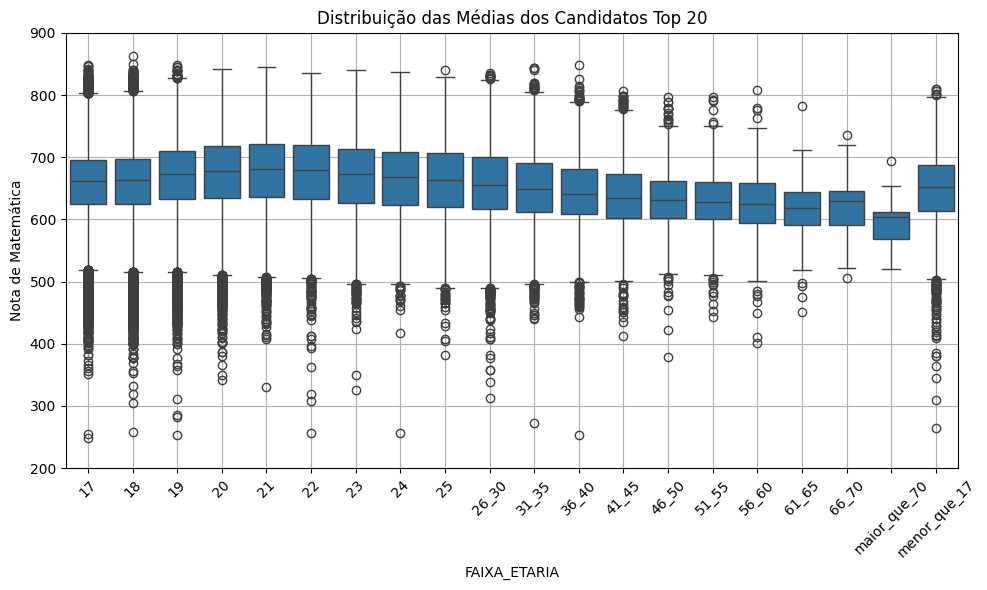

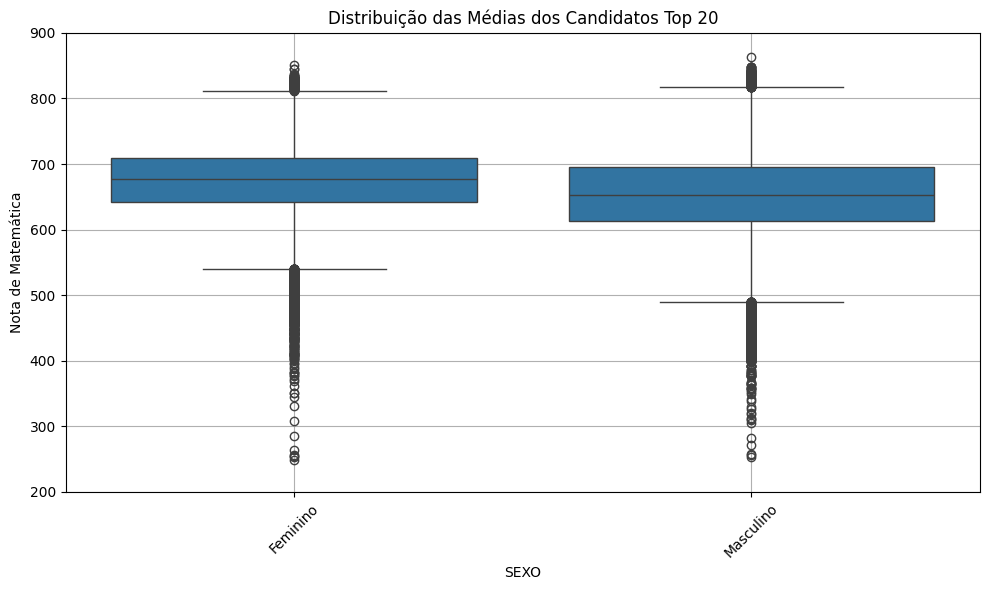

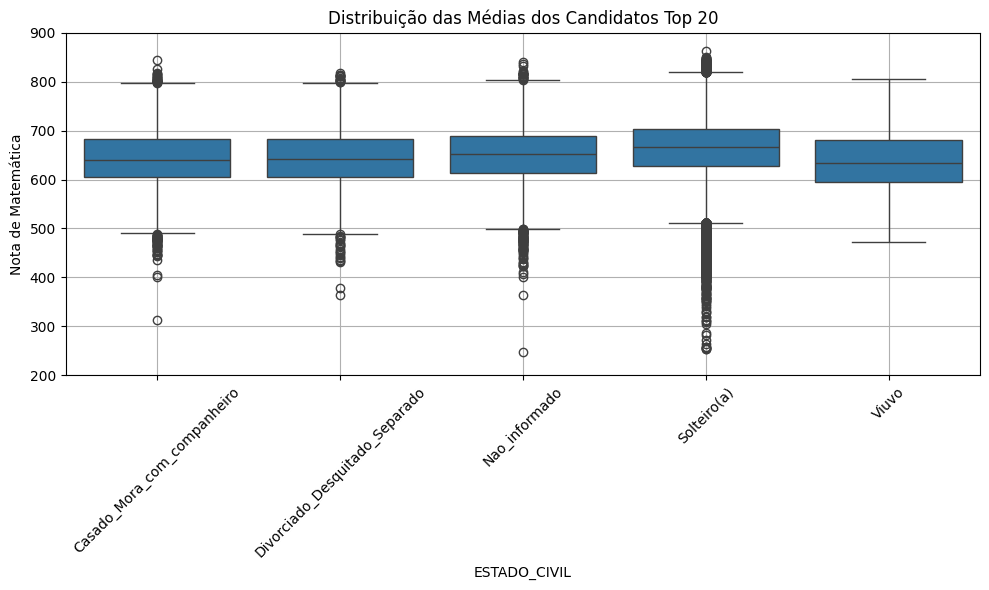

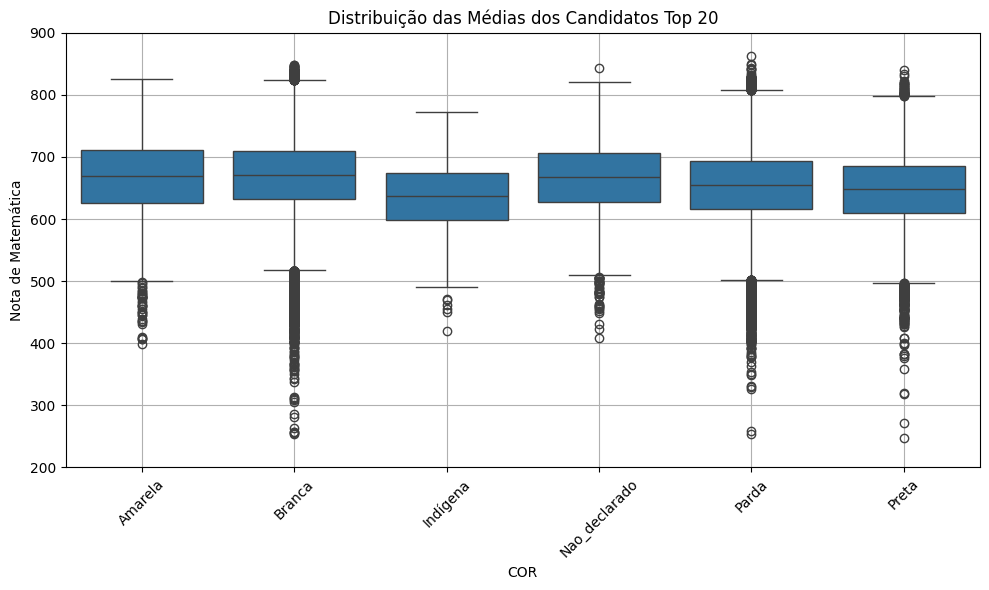

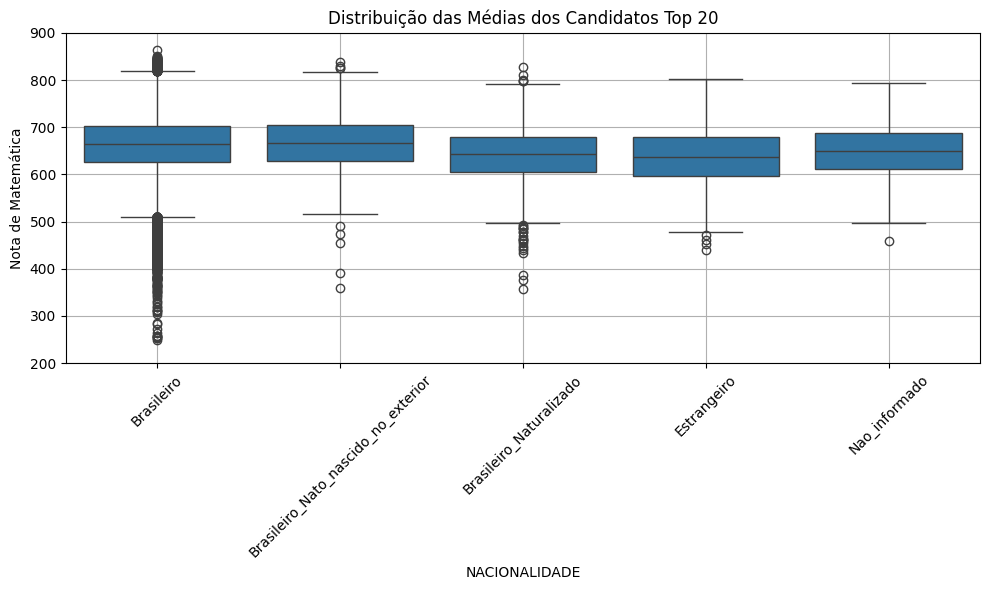

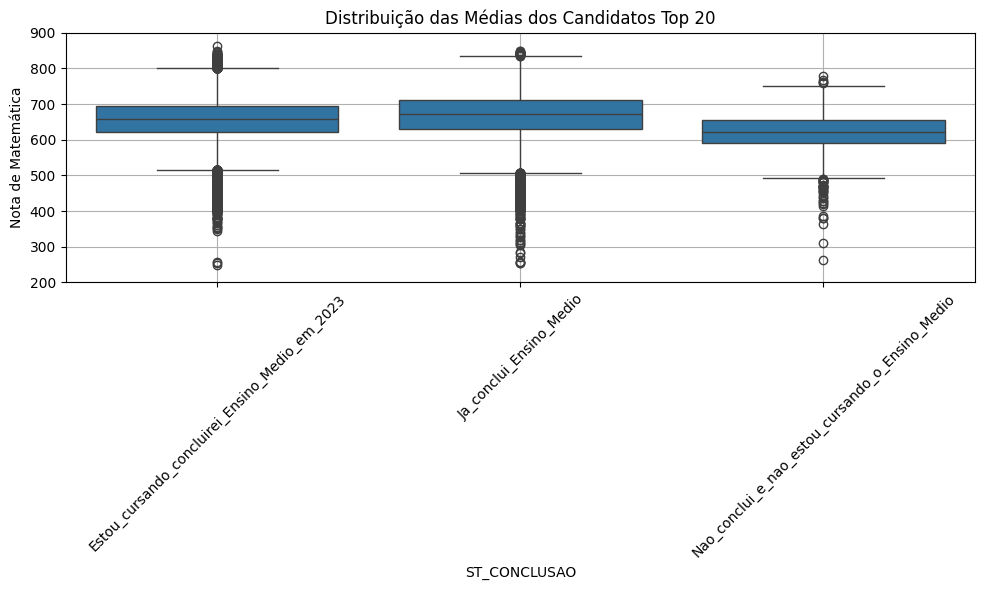

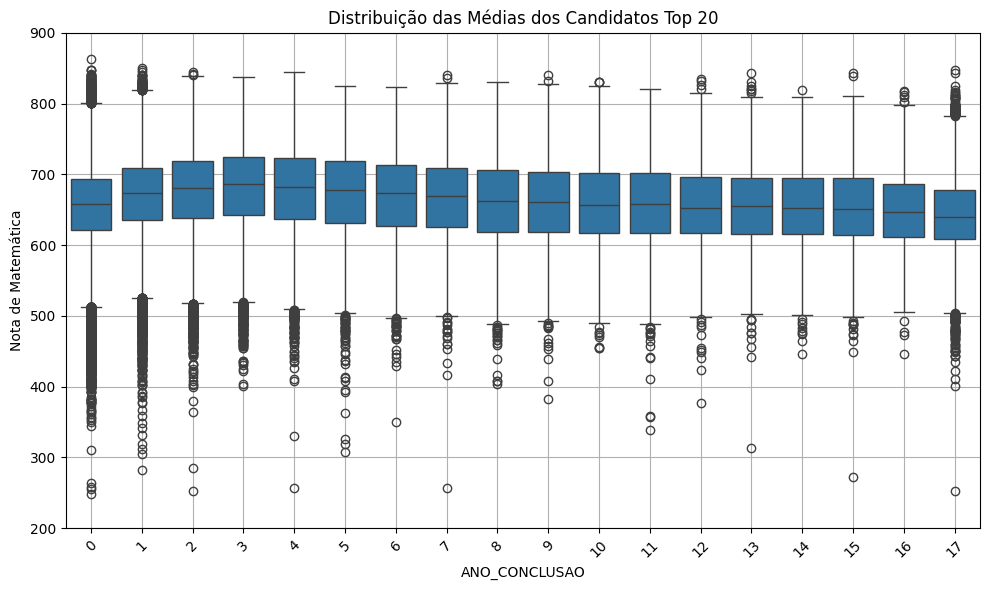

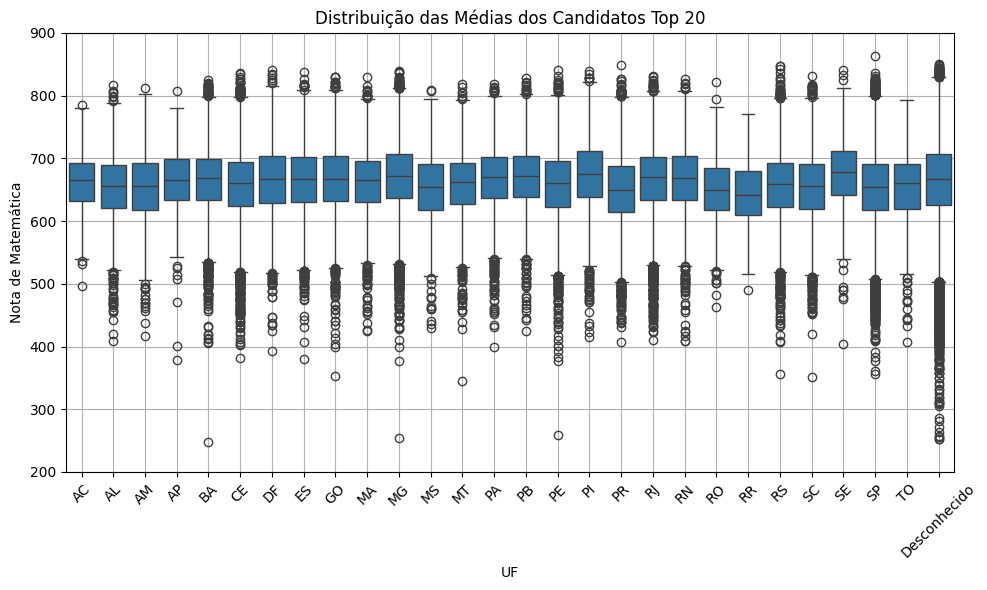

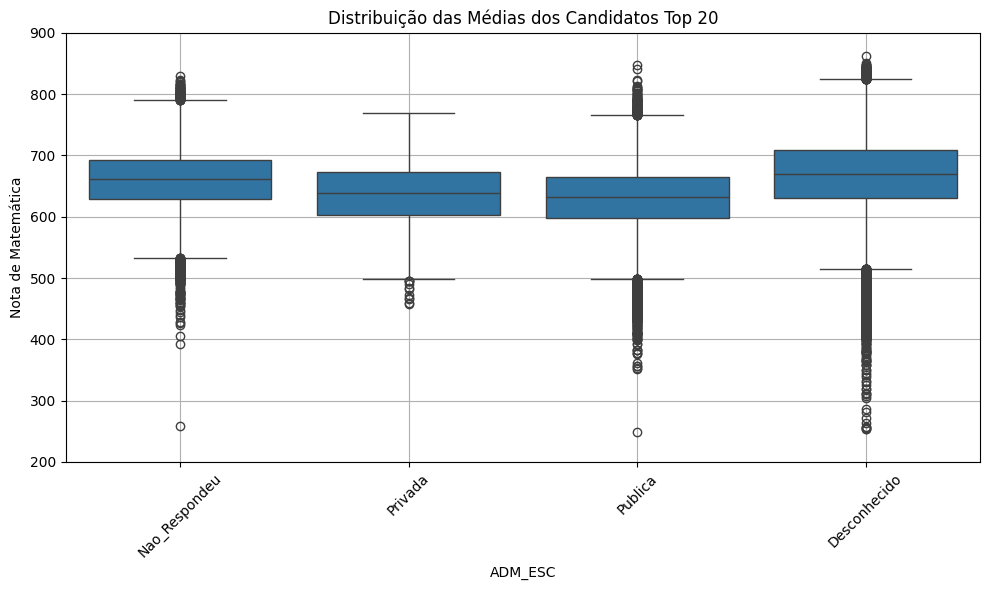

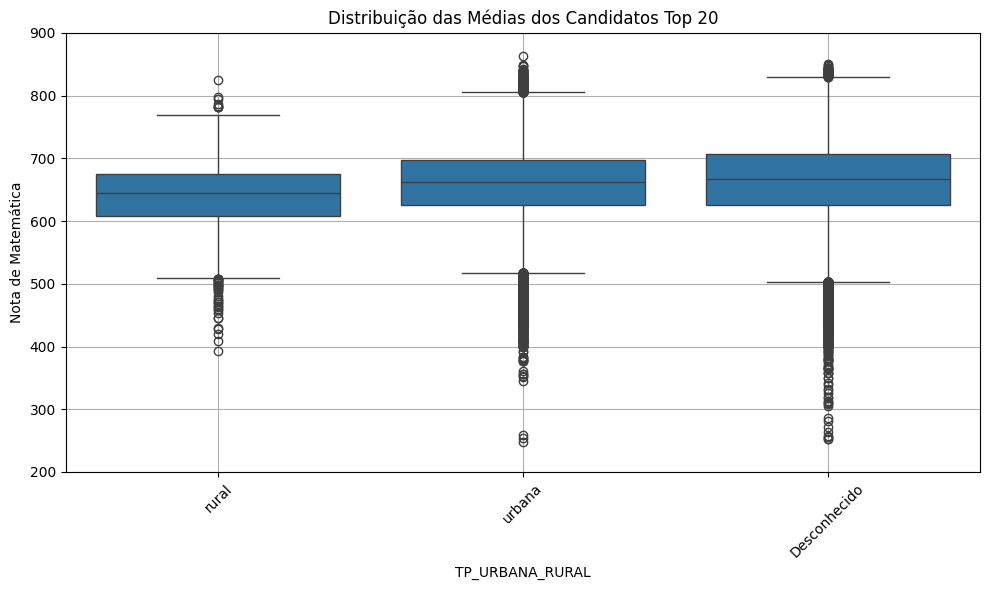

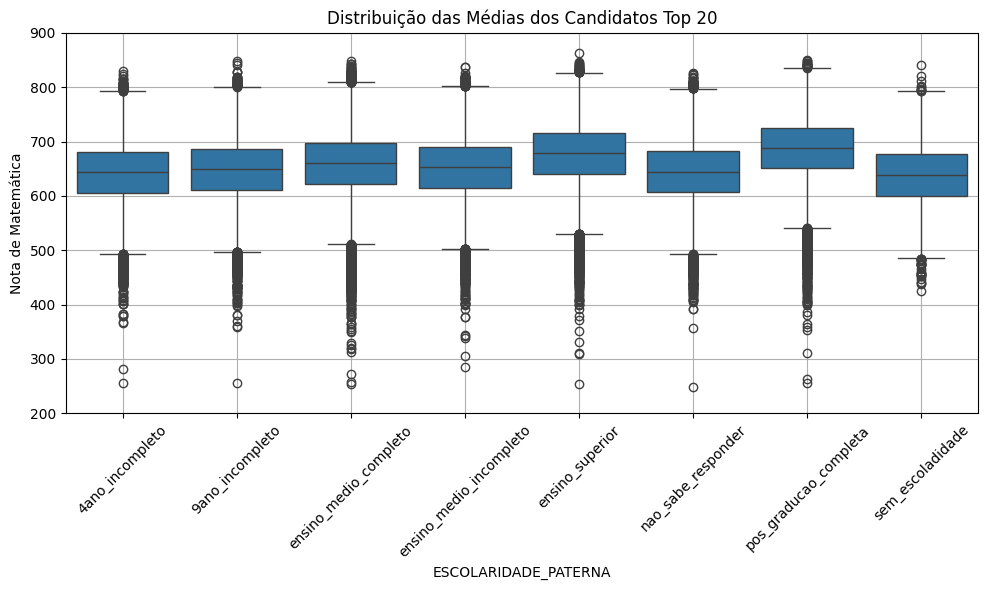

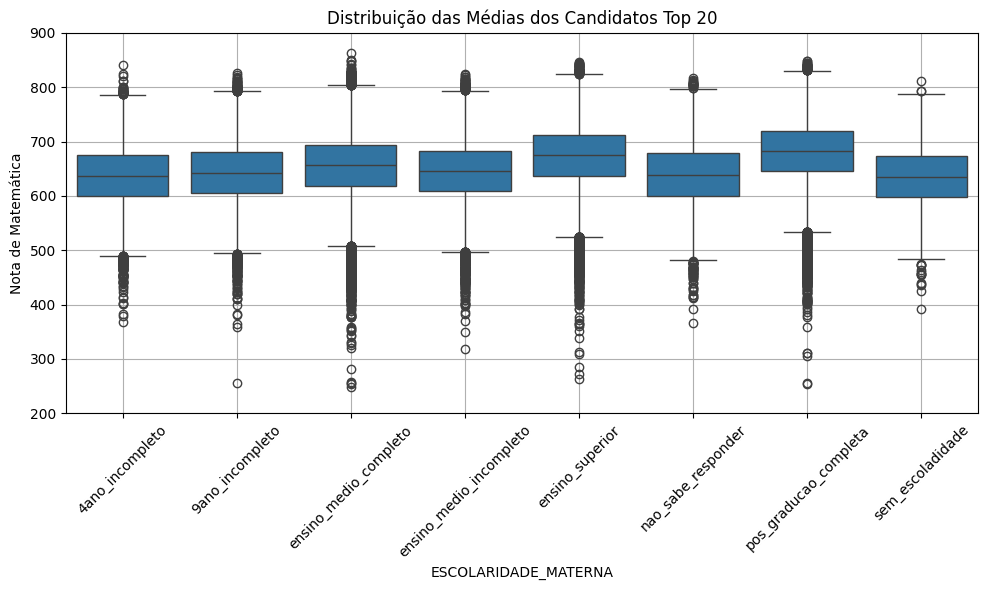

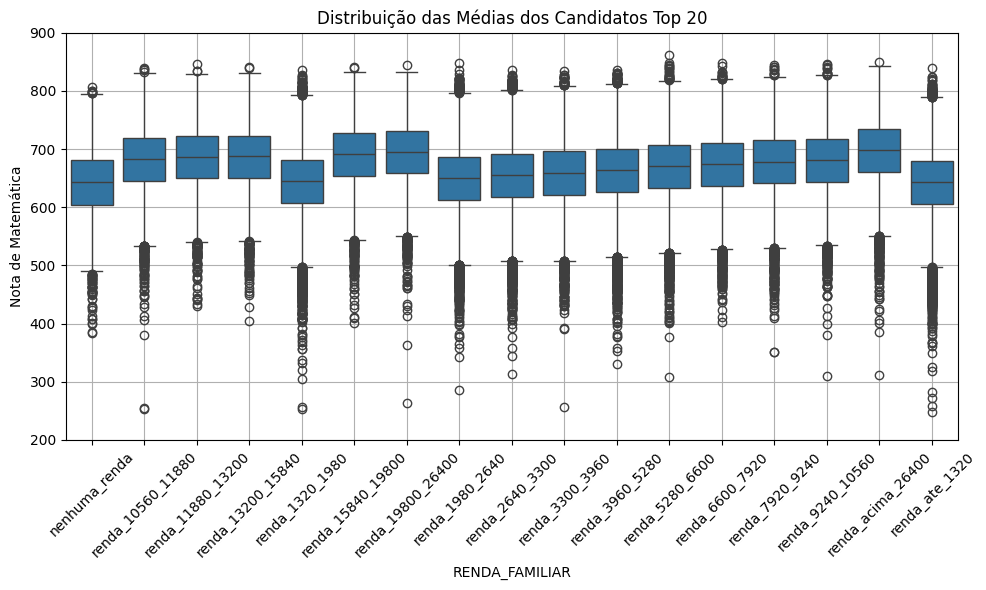

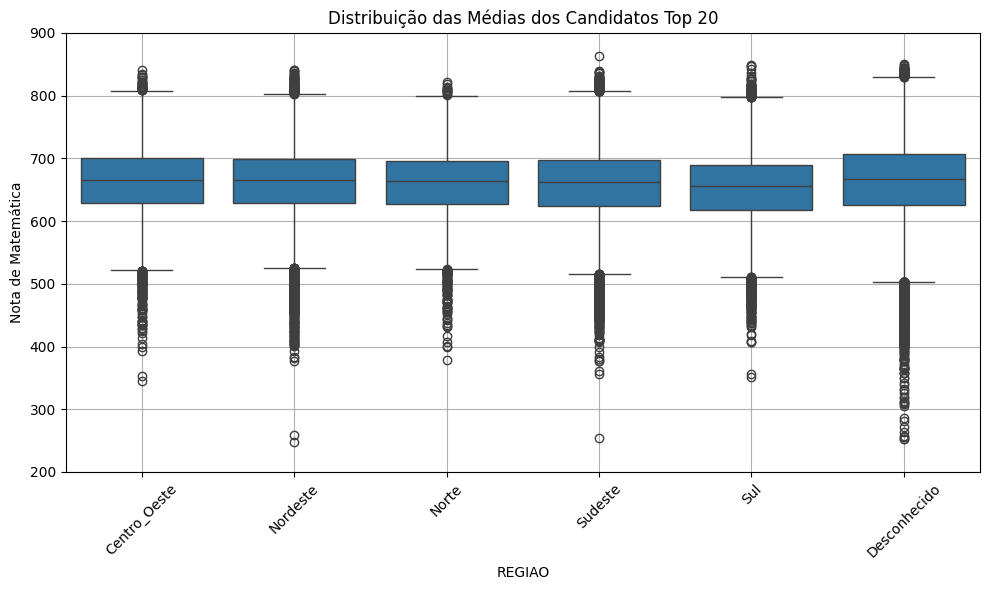

In [108]:
for cat in categoricas:    
    df_melt = top_20.melt(
        id_vars=cat,
        value_vars=['MEDIA'],
        var_name='Área',
        value_name='Nota'
    )

    # Um único gráfico com boxplots por REGIAO
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df_melt, x=cat, y='Nota')

    plt.title(f'Distribuição das Médias dos Candidatos Top 20')
    plt.ylabel('Nota de Matemática')
    plt.ylim(200, 900)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [109]:
# # Boxplot de comparação
# df1 = presentes_df_enem_2023[['REGIAO', 'NOTA_MT']].copy()
# df1['Grupo'] = 'Presentes'

# df2 = top_20[['REGIAO', 'NOTA_MT']].copy()
# df2['Grupo'] = 'Top 20'

# df_comparado = pd.concat([df1, df2], axis=0)
# df_comparado = df_comparado.rename(columns={'NOTA_MT': 'Nota'})

# plt.figure(figsize=(10, 6))
# sns.boxplot(data=df_comparado, x='REGIAO', y='Nota', hue='Grupo')

# plt.title('Comparação da Nota de Matemática por Região e Grupo')
# plt.ylim(0, 1000)
# plt.ylabel('Nota de Matemática')
# plt.xlabel('Região')
# plt.legend(title='Grupo')
# plt.grid(True)
# plt.tight_layout()
# plt.show()

In [110]:
df_enem_2023.columns

Index(['INSCRICAO', 'FAIXA_ETARIA', 'SEXO', 'ESTADO_CIVIL', 'COR',
       'NACIONALIDADE', 'ST_CONCLUSAO', 'ANO_CONCLUSAO', 'MUNICIPIO', 'UF',
       'ADM_ESC', 'TP_URBANA_RURAL', 'PRESENCA_CH_LC', 'PRESENCA_MT_CN',
       'NOTA_CN', 'NOTA_CH', 'NOTA_LC', 'NOTA_MT', 'NOTA_COMP1_REDACAO',
       'NOTA_COMP2_REDACAO', 'NOTA_COMP3_REDACAO', 'NOTA_COMP4_REDACAO',
       'NOTA_COMP5_REDACAO', 'NOTA_REDACAO', 'ESCOLARIDADE_PATERNA',
       'ESCOLARIDADE_MATERNA', 'RENDA_FAMILIAR', 'POSSUI_DIARISTA',
       'QTD_BANHEIROS', 'QTD_CARROS', 'QTD_GELADEIRA', 'QTD_TV_COLORIDA',
       'QTD_COMPUTADOR', 'ACESSO_INTERNET', 'REGIAO', 'MEDIA', 'IS_TOP20'],
      dtype='object')

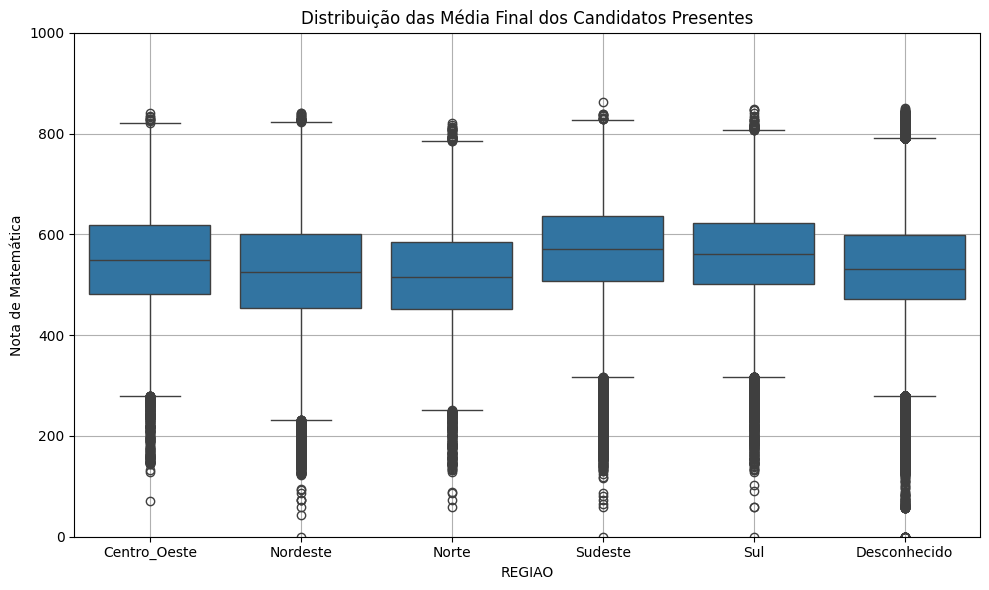

In [117]:
df_melt = presentes_df_enem_2023.melt(
    id_vars='REGIAO',
    value_vars=['MEDIA'],
    var_name='Área',
    value_name='Nota'
)

# Um único gráfico com boxplots por REGIAO
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_melt, x='REGIAO', y='Nota')

plt.title('Distribuição das Média Final dos Candidatos Presentes')
plt.ylabel('Nota de Matemática')
plt.ylim(0, 1000)
plt.grid(True)
plt.tight_layout()
plt.show()

In [118]:
presentes_df_enem_2023[['NOTA_MT','NOTA_COMP1_REDACAO','NOTA_COMP2_REDACAO', 'NOTA_COMP3_REDACAO', 'NOTA_COMP4_REDACAO','NOTA_COMP5_REDACAO']]

NOTA_MT  NOTA_COMP1_REDACAO  NOTA_COMP2_REDACAO  NOTA_COMP3_REDACAO  \
2          363.2               140.0               200.0               100.0   
3          466.7               140.0               200.0               160.0   
4          338.3               120.0               120.0               120.0   
9          680.2               120.0               120.0               120.0   
10         736.3               140.0               200.0               160.0   
...          ...                 ...                 ...                 ...   
3933945    578.1               120.0               160.0                80.0   
3933946    496.8               120.0               120.0               100.0   
3933948    530.5               120.0               160.0                80.0   
3933950    547.3               120.0               120.0               120.0   
3933953    569.0               120.0               120.0               100.0   

         NOTA_COMP4_REDACAO  NOTA_COMP5_REDACAO  
2                     120.0               140.0  
3                     180.0               200.0  
4                     120.0                80.0  
9                     120.0               120.0  
10                    160.0               200.0  
...                     ...                 ...  
3933945               120.0               120.0  
3933946               100.0                60.0  
3933948               120.0               120.0  
3933950               100.0                80.0  
3933953               120.0               140.0  

[2166843 rows x 6 columns]

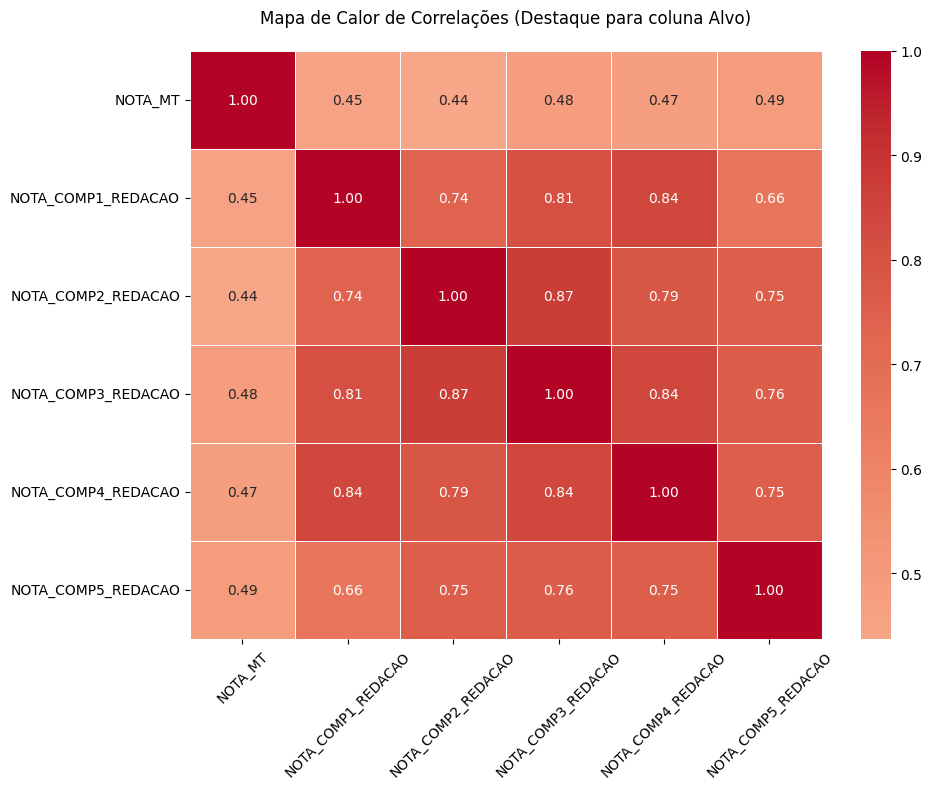

In [119]:
# Calcular matriz de correlação entre as competencias de redação
corr = presentes_df_enem_2023[['NOTA_MT','NOTA_COMP1_REDACAO','NOTA_COMP2_REDACAO', 'NOTA_COMP3_REDACAO', 'NOTA_COMP4_REDACAO','NOTA_COMP5_REDACAO']].corr()

# Criar heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, fmt=".2f",
            annot_kws={"size": 10}, linewidths=.5)

# Destacar a coluna 'Alvo' com um retângulo
#ax = plt.gca()
#target_index = corr.columns.get_loc('Alvo')
#ax.add_patch(plt.Rectangle((0, target_index), len(corr), 1, 
                          #fill=False, edgecolor='yellow', lw=3, clip_on=False))
#ax.add_patch(plt.Rectangle((target_index, 0), 1, len(corr), 
                          #fill=False, edgecolor='yellow', lw=3, clip_on=False))

plt.title('Mapa de Calor de Correlações (Destaque para coluna Alvo)', pad=20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [120]:
#Correlação entre a nota de matemática e as notas nas habilidades específicas em redação
corr['NOTA_MT']

NOTA_MT               1.000000
NOTA_COMP1_REDACAO    0.450048
NOTA_COMP2_REDACAO    0.437059
NOTA_COMP3_REDACAO    0.482334
NOTA_COMP4_REDACAO    0.471255
NOTA_COMP5_REDACAO    0.490308
Name: NOTA_MT, dtype: float64

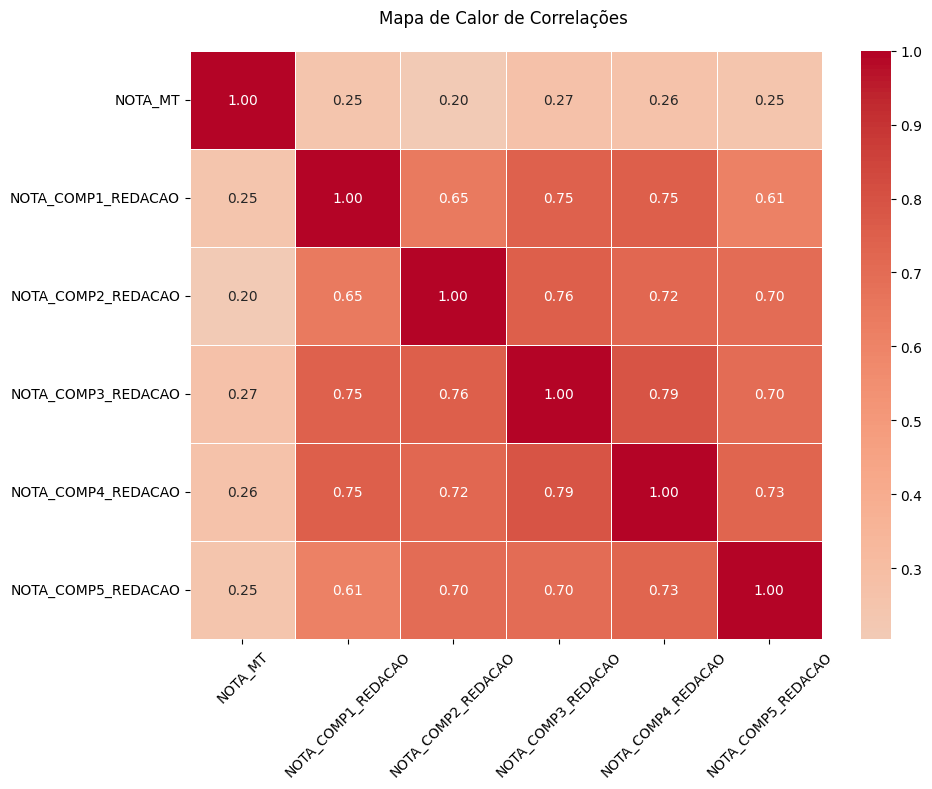

In [122]:
# Calcular matriz de correlação notas de redação entre top20
corr_top20 = top_20[['NOTA_MT','NOTA_COMP1_REDACAO','NOTA_COMP2_REDACAO', 'NOTA_COMP3_REDACAO', 'NOTA_COMP4_REDACAO','NOTA_COMP5_REDACAO']].corr()

# Criar heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_top20, annot=True, cmap='coolwarm', center=0, fmt=".2f",
            annot_kws={"size": 10}, linewidths=.5)

# Destacar a coluna 'Alvo' com um retângulo
#ax = plt.gca()
#target_index = corr.columns.get_loc('Alvo')
#ax.add_patch(plt.Rectangle((0, target_index), len(corr), 1, 
                          #fill=False, edgecolor='yellow', lw=3, clip_on=False))
#ax.add_patch(plt.Rectangle((target_index, 0), 1, len(corr), 
                          #fill=False, edgecolor='yellow', lw=3, clip_on=False))

plt.title('Mapa de Calor de Correlações ', pad=20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [116]:
#Correlação entre a nota de matemática dos top20 e as notas nas habilidades específicas em redação
corr_top20['NOTA_MT']

NOTA_MT               1.000000
NOTA_COMP1_REDACAO    0.246916
NOTA_COMP2_REDACAO    0.203759
NOTA_COMP3_REDACAO    0.270027
NOTA_COMP4_REDACAO    0.264434
NOTA_COMP5_REDACAO    0.247962
Name: NOTA_MT, dtype: float64

### Correlação entre variáveis socieconômicas

In [123]:
colunas_corr=['ESCOLARIDADE_PATERNA',
       'ESCOLARIDADE_MATERNA', 'POSSUI_DIARISTA',
       'QTD_BANHEIROS', 'QTD_CARROS', 'QTD_GELADEIRA', 'QTD_TV_COLORIDA',
       'QTD_COMPUTADOR', 'ACESSO_INTERNET']

O teste qui-quadrado verificar se há associação estatística entre as variáveis, isto é, se a distribuição de uma variável depende da outra. Se o p-valor for menor que 0,05, então há associação entre as variáveis.

O coeficiente de V de Crammer, mede a força da associação entre duas variáveis categóricas (valores entre 0 e 1), onde 0 indica nenhuma associação e 1 indica associação perfeita.

In [124]:
dict_corr={'variavel':[],'p-valor':[],'Qui2':[],'V Cramer':[]}
for cat in colunas_corr:
    tabela_contingencia = pd.crosstab(presentes_df_enem_2023['RENDA_FAMILIAR'], presentes_df_enem_2023[cat])
    chi2, p, dof, expected = stats.chi2_contingency(tabela_contingencia)
    phi2 = chi2 / tabela_contingencia.sum().sum()
    n_linhas, n_colunas = tabela_contingencia.shape
    cramer= (phi2/min(n_linhas,n_colunas))
    dict_corr['variavel'].append(cat)
    dict_corr['p-valor'].append(p)
    dict_corr['Qui2'].append(chi2)
    dict_corr['V Cramer'].append(cramer)
pd.DataFrame(dict_corr).sort_values(by='V Cramer',ascending=False).reset_index()

index              variavel  p-valor          Qui2  V Cramer
0      7        QTD_COMPUTADOR      0.0  1.199049e+06  0.110672
1      3         QTD_BANHEIROS      0.0  1.175771e+06  0.108524
2      4            QTD_CARROS      0.0  1.065620e+06  0.098357
3      6       QTD_TV_COLORIDA      0.0  8.414290e+05  0.077664
4      2       POSSUI_DIARISTA      0.0  5.327135e+05  0.061462
5      8       ACESSO_INTERNET      0.0  2.220915e+05  0.051248
6      0  ESCOLARIDADE_PATERNA      0.0  8.236814e+05  0.047516
7      1  ESCOLARIDADE_MATERNA      0.0  6.583685e+05  0.037980
8      5         QTD_GELADEIRA      0.0  2.589942e+05  0.023905

Dentre as características socieconômicas, todas as consideradas no trabalho estão associadas com a renda familiar e, portanto, reduziremos essas variáveis a apenas a que diz respeito a renda familiar e escolaridade paterna e materna.

In [125]:
presentes_df_enem_2023.columns

Index(['INSCRICAO', 'FAIXA_ETARIA', 'SEXO', 'ESTADO_CIVIL', 'COR',
       'NACIONALIDADE', 'ST_CONCLUSAO', 'ANO_CONCLUSAO', 'MUNICIPIO', 'UF',
       'ADM_ESC', 'TP_URBANA_RURAL', 'PRESENCA_CH_LC', 'PRESENCA_MT_CN',
       'NOTA_CN', 'NOTA_CH', 'NOTA_LC', 'NOTA_MT', 'NOTA_COMP1_REDACAO',
       'NOTA_COMP2_REDACAO', 'NOTA_COMP3_REDACAO', 'NOTA_COMP4_REDACAO',
       'NOTA_COMP5_REDACAO', 'NOTA_REDACAO', 'ESCOLARIDADE_PATERNA',
       'ESCOLARIDADE_MATERNA', 'RENDA_FAMILIAR', 'POSSUI_DIARISTA',
       'QTD_BANHEIROS', 'QTD_CARROS', 'QTD_GELADEIRA', 'QTD_TV_COLORIDA',
       'QTD_COMPUTADOR', 'ACESSO_INTERNET', 'REGIAO', 'MEDIA', 'IS_TOP20'],
      dtype='object')

In [126]:
presentes_df_enem_2023=presentes_df_enem_2023.drop(columns= ['POSSUI_DIARISTA',
                                                            'QTD_BANHEIROS',
                                                            'QTD_CARROS', 
                                                            'QTD_GELADEIRA', 
                                                            'QTD_TV_COLORIDA',       
                                                            'QTD_COMPUTADOR', 'ACESSO_INTERNET'])

In [127]:
presentes_df_enem_2023.columns

Index(['INSCRICAO', 'FAIXA_ETARIA', 'SEXO', 'ESTADO_CIVIL', 'COR',
       'NACIONALIDADE', 'ST_CONCLUSAO', 'ANO_CONCLUSAO', 'MUNICIPIO', 'UF',
       'ADM_ESC', 'TP_URBANA_RURAL', 'PRESENCA_CH_LC', 'PRESENCA_MT_CN',
       'NOTA_CN', 'NOTA_CH', 'NOTA_LC', 'NOTA_MT', 'NOTA_COMP1_REDACAO',
       'NOTA_COMP2_REDACAO', 'NOTA_COMP3_REDACAO', 'NOTA_COMP4_REDACAO',
       'NOTA_COMP5_REDACAO', 'NOTA_REDACAO', 'ESCOLARIDADE_PATERNA',
       'ESCOLARIDADE_MATERNA', 'RENDA_FAMILIAR', 'REGIAO', 'MEDIA',
       'IS_TOP20'],
      dtype='object')

# Dumização das variáveis

Alguns algoritmos de machine learning precisam que os dados categóricos sejam dummizados. Para isso, criaremos o dataframe presentes_df_enem_2023_dummies que são os dados, dos alunos que estiveram presentes na prova de matemática, com as variáveis categóricas dumizadas.

In [141]:
colunas_dummies=['FAIXA_ETARIA', 
                'SEXO', 
                'COR', 
                'NACIONALIDADE',
                'REGIAO',       
                'ADM_ESC', 
                'TP_URBANA_RURAL', 
                'ESCOLARIDADE_PATERNA',       
                'ESCOLARIDADE_MATERNA', 
                'RENDA_FAMILIAR']


In [142]:
dados_analise=presentes_df_enem_2023[['INSCRICAO','FAIXA_ETARIA', 
                'SEXO', 
                'COR', 
                'NACIONALIDADE',
                'REGIAO',       
                'ADM_ESC', 
                'TP_URBANA_RURAL', 
                'ESCOLARIDADE_PATERNA',       
                'ESCOLARIDADE_MATERNA', 
                'RENDA_FAMILIAR', 'IS_TOP20']]

In [143]:
dados_analise.head()

INSCRICAO FAIXA_ETARIA       SEXO     COR NACIONALIDADE        REGIAO  \
2   210061103945           21   Feminino  Branca    Brasileiro  Desconhecido   
3   210060214087           17   Feminino   Parda    Brasileiro      Nordeste   
4   210059980948           18   Feminino   Parda    Brasileiro      Nordeste   
9   210060801601        26_30  Masculino  Branca    Brasileiro  Desconhecido   
10  210059085130           23  Masculino   Parda    Brasileiro  Desconhecido   

         ADM_ESC TP_URBANA_RURAL     ESCOLARIDADE_PATERNA  \
2   Desconhecido    Desconhecido       nao_sabe_responder   
3        Publica          urbana  ensino_medio_incompleto   
4        Publica          urbana          4ano_incompleto   
9   Desconhecido    Desconhecido       nao_sabe_responder   
10  Desconhecido    Desconhecido          ensino_superior   

       ESCOLARIDADE_MATERNA   RENDA_FAMILIAR  IS_TOP20  
2     ensino_medio_completo  renda_1320_1980         0  
3   ensino_medio_incompleto  renda_1320_1980         0  
4           4ano_incompleto   renda_ate_1320         0  
9     ensino_medio_completo  renda_3300_3960         1  
10          9ano_incompleto   renda_ate_1320         1

In [144]:
presentes_df_enem_2023_dummies = pd.get_dummies(dados_analise, columns=colunas_dummies, drop_first=True)

In [145]:
presentes_df_enem_2023_dummies.columns

Index(['INSCRICAO', 'IS_TOP20', 'FAIXA_ETARIA_18', 'FAIXA_ETARIA_19',
       'FAIXA_ETARIA_20', 'FAIXA_ETARIA_21', 'FAIXA_ETARIA_22',
       'FAIXA_ETARIA_23', 'FAIXA_ETARIA_24', 'FAIXA_ETARIA_25',
       'FAIXA_ETARIA_26_30', 'FAIXA_ETARIA_31_35', 'FAIXA_ETARIA_36_40',
       'FAIXA_ETARIA_41_45', 'FAIXA_ETARIA_46_50', 'FAIXA_ETARIA_51_55',
       'FAIXA_ETARIA_56_60', 'FAIXA_ETARIA_61_65', 'FAIXA_ETARIA_66_70',
       'FAIXA_ETARIA_maior_que_70', 'FAIXA_ETARIA_menor_que_17',
       'SEXO_Masculino', 'COR_Branca', 'COR_Indígena', 'COR_Nao_declarado',
       'COR_Parda', 'COR_Preta',
       'NACIONALIDADE_Brasileiro_Nato_nascido_no_exterior',
       'NACIONALIDADE_Brasileiro_Naturalizado', 'NACIONALIDADE_Estrangeiro',
       'NACIONALIDADE_Nao_informado', 'REGIAO_Nordeste', 'REGIAO_Norte',
       'REGIAO_Sudeste', 'REGIAO_Sul', 'REGIAO_Desconhecido',
       'ADM_ESC_Privada', 'ADM_ESC_Publica', 'ADM_ESC_Desconhecido',
       'TP_URBANA_RURAL_urbana', 'TP_URBANA_RURAL_Desconhecido',
   

# Ensemble Models

Algoritmos de Ensemble, combinam vários modelos de machibe learning para tornar um modelos com maior precisão e robustez.

Os pricipais modelos de ensemble são:
* Bagging: Cria modelos diferentes para cada amostra, com reposição, de dados. A previsão final é baseada na média das previsões, para modelos de regressão, ou por maioria de votos, para modelos de classificação.
* Boosting: É criado um modelo e, a partir dos erros do modelo criado, é criado um novo modelo melhorado. Esse processo ocorre várias vezes e em cada modelo ocorre a tentativa de corrigir os erros do modelo anterior.
* Stacking: Treina múltiplos modelos diferentes e depois usa um modelo final para combinar a revisão de todos os modelos.

Os algoritmos de emsemble que serão usados são:
* Random Forest.
* Light GBM.
* XG Boosting.

Com o intuito de comparar os modelos, será criado um dicionário para armazenar a acurácia, a acurácia balanceada, o AUC e o GINI de cada modelo treinado.

In [146]:
#Dicionário para armazenar métricas de eficácia dos modelos
dict_modelos={'Modelo': [], 'Acuracia': [], 'Acuracia Balanceada': [],  'AUC': [], 'GINI': []}

## Dados de Treino e Teste

Os dados serão separados em duas partes:
* 80% de dados de treino
* 20% dos dados de teste

Os dados de treino são usados para identificar padrões no comportamento dos dados.
Os dados de teste são usados para validar os padrões que foram encontrados nos dados de treino.

O conjunto de dados, é desbalanceado, no que diz a respeito do total de candidatos que tiraram nota de matemática acima do percentil 80. Para manter a proporção entre esses candidatos ao separar os dados de treino e de teste, será usada a técnica de estratificação dos dados. Isso garante que nos dados de treino e de teste se mantenham a mesma proporção de candidatos que tiraram boas notas de matemática, que os dados totais.

In [147]:
presentes_df_enem_2023_dummies.columns

Index(['INSCRICAO', 'IS_TOP20', 'FAIXA_ETARIA_18', 'FAIXA_ETARIA_19',
       'FAIXA_ETARIA_20', 'FAIXA_ETARIA_21', 'FAIXA_ETARIA_22',
       'FAIXA_ETARIA_23', 'FAIXA_ETARIA_24', 'FAIXA_ETARIA_25',
       'FAIXA_ETARIA_26_30', 'FAIXA_ETARIA_31_35', 'FAIXA_ETARIA_36_40',
       'FAIXA_ETARIA_41_45', 'FAIXA_ETARIA_46_50', 'FAIXA_ETARIA_51_55',
       'FAIXA_ETARIA_56_60', 'FAIXA_ETARIA_61_65', 'FAIXA_ETARIA_66_70',
       'FAIXA_ETARIA_maior_que_70', 'FAIXA_ETARIA_menor_que_17',
       'SEXO_Masculino', 'COR_Branca', 'COR_Indígena', 'COR_Nao_declarado',
       'COR_Parda', 'COR_Preta',
       'NACIONALIDADE_Brasileiro_Nato_nascido_no_exterior',
       'NACIONALIDADE_Brasileiro_Naturalizado', 'NACIONALIDADE_Estrangeiro',
       'NACIONALIDADE_Nao_informado', 'REGIAO_Nordeste', 'REGIAO_Norte',
       'REGIAO_Sudeste', 'REGIAO_Sul', 'REGIAO_Desconhecido',
       'ADM_ESC_Privada', 'ADM_ESC_Publica', 'ADM_ESC_Desconhecido',
       'TP_URBANA_RURAL_urbana', 'TP_URBANA_RURAL_Desconhecido',
   

Criação do dataframe X com as features explicativas

In [148]:
presentes_df_enem_2023.columns

Index(['INSCRICAO', 'FAIXA_ETARIA', 'SEXO', 'ESTADO_CIVIL', 'COR',
       'NACIONALIDADE', 'ST_CONCLUSAO', 'ANO_CONCLUSAO', 'MUNICIPIO', 'UF',
       'ADM_ESC', 'TP_URBANA_RURAL', 'PRESENCA_CH_LC', 'PRESENCA_MT_CN',
       'NOTA_CN', 'NOTA_CH', 'NOTA_LC', 'NOTA_MT', 'NOTA_COMP1_REDACAO',
       'NOTA_COMP2_REDACAO', 'NOTA_COMP3_REDACAO', 'NOTA_COMP4_REDACAO',
       'NOTA_COMP5_REDACAO', 'NOTA_REDACAO', 'ESCOLARIDADE_PATERNA',
       'ESCOLARIDADE_MATERNA', 'RENDA_FAMILIAR', 'REGIAO', 'MEDIA',
       'IS_TOP20'],
      dtype='object')

In [ ]:
# Criação das dataframe com as features explicativas
X=presentes_df_enem_2023[[ 'FAIXA_ETARIA', 'SEXO', 'ESTADO_CIVIL', 'COR',
       'NACIONALIDADE', 'ST_CONCLUSAO', 'ANO_CONCLUSAO', 'UF',
       'ADM_ESC', 'TP_URBANA_RURAL' , 'ESCOLARIDADE_PATERNA',
       'ESCOLARIDADE_MATERNA', 'RENDA_FAMILIAR', 'REGIAO']]

In [150]:
# X=presentes_df_enem_2023.drop(columns = ['INSCRICAO', 'POSSUI_DIARISTA', 'QTD_BANHEIROS', 'QTD_CARROS',
#        'QTD_GELADEIRA', 'QTD_TV_COLORIDA', 'QTD_COMPUTADOR', 'ACESSO_INTERNET','PRESENCA_CH_LC', 'PRESENCA_MT_CN',
#        'NOTA_CN', 'NOTA_CH', 'NOTA_LC', 'NOTA_MT', 'NOTA_COMP1_REDACAO',
#        'NOTA_COMP2_REDACAO', 'NOTA_COMP3_REDACAO', 'NOTA_COMP4_REDACAO',
#        'NOTA_COMP5_REDACAO', 'NOTA_REDACAO','MEDIA',
#        'IS_TOP20'])

In [ ]:
# Criação do dataframe com as features explicativas dumizadas
X_dum = presentes_df_enem_2023_dummies.drop(columns = ['INSCRICAO','IS_TOP20'])

In [ ]:
# Criação do dataframe com apenas a variável target 'IS_TOP20'
y=presentes_df_enem_2023['IS_TOP20']

In [ ]:
# Separação dos dados de treino e teste na proporção de 80% são para treinar os modelos e 20% são para testar o modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Separação dos dados de treino e teste, dos dados dumizados, na proporção de 80% são para treinar os modelos e 20% são para testar o modelo
X_train_dum, X_test_dum, y_train_dum, y_test_dum = train_test_split(X_dum, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Contagem dos dados de treino em cada categoria
y_train.value_counts()

IS_TOP20
0    1386081
1     347393
Name: count, dtype: int64

In [ ]:
# Confirmação dos tipos de dados no conjunto de treino
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1733474 entries, 1859272 to 682257
Data columns (total 14 columns):
 #   Column                Dtype   
---  ------                -----   
 0   FAIXA_ETARIA          category
 1   SEXO                  category
 2   ESTADO_CIVIL          category
 3   COR                   category
 4   NACIONALIDADE         category
 5   ST_CONCLUSAO          category
 6   ANO_CONCLUSAO         category
 7   UF                    category
 8   ADM_ESC               category
 9   TP_URBANA_RURAL       category
 10  ESCOLARIDADE_PATERNA  category
 11  ESCOLARIDADE_MATERNA  category
 12  RENDA_FAMILIAR        category
 13  REGIAO                category
dtypes: category(14)
memory usage: 36.4 MB


## Random Forest

Seráo separadoas vários subconjuntos aleatórios de dados e, um subconjunto aleatódio de variáveis e, para cada subconjunto será treinado um modelo de árvore de decisão.
Para cada modelo, cada observação receberá uma classificação como positiva ou negativa.
As observações que receberaão a maioria dos votos como positiva, serão classificadas como positivas, caso contrário, serão classificadas como negativa.

In [157]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1733474 entries, 1859272 to 682257
Data columns (total 14 columns):
 #   Column                Dtype   
---  ------                -----   
 0   FAIXA_ETARIA          category
 1   SEXO                  category
 2   ESTADO_CIVIL          category
 3   COR                   category
 4   NACIONALIDADE         category
 5   ST_CONCLUSAO          category
 6   ANO_CONCLUSAO         category
 7   UF                    category
 8   ADM_ESC               category
 9   TP_URBANA_RURAL       category
 10  ESCOLARIDADE_PATERNA  category
 11  ESCOLARIDADE_MATERNA  category
 12  RENDA_FAMILIAR        category
 13  REGIAO                category
dtypes: category(14)
memory usage: 36.4 MB


In [ ]:
# Criação do modelo 'modelo_rf' de Random Forest base, treinando 50 árvores de decisão
modelo_rf = RandomForestClassifier(n_estimators=50, random_state=42)
modelo_rf.fit(X_train_dum, y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [ ]:
# Valores previstos usando o modelo base de random forest (modelo_rf)
y_pred_modelo_rf = modelo_rf.predict(X_test_dum)
y_pred_modelo_rf

array([0, 0, 0, ..., 0, 0, 1])

In [160]:
# Valores reais da target
y_test

2606162    0
163202     1
3585226    0
438470     1
455929     0
          ..
693679     0
2517230    0
2044393    0
2060051    1
1513404    0
Name: IS_TOP20, Length: 433369, dtype: int32

In [161]:
# Probabilidade de ocorrer o evento estar entre os top20 dos dados de treino e de teste
p_test = modelo_rf.predict_proba(X_test_dum)[:, 1]
p_train = modelo_rf.predict_proba(X_train_dum)[:, 1]

In [162]:
p_test

array([0.08284533, 0.460198  , 0.14770503, ..., 0.14114002, 0.39987423,
       0.85862794])

Observe que é considerado que o evento 'estar entre os top20' ocorre, se a probabilidade disso ocorrer for maior que 50%

### Avaliando o 1º modelo (modelo base de random forest)

A curva ROC é a curva obtida a partir do seguinte processo:
Calcula-se as probabilidades do evento ocorrer (p_test) e verifica se os valores reais (y_test) estão corretos para vários thresholds. Para cada threshold, calcula-se TPR e FPR, e coloca os dados obtidos no gráfico. Esse gráfico é chamado curva ROC, e a área sob o gráfico é chamado AUC.

In [163]:
# Calculando acurácia e matriz de confusão
cm_rf = confusion_matrix(y_test, y_pred_modelo_rf)
ac_rf = accuracy_score(y_test, y_pred_modelo_rf)
bac_rf = balanced_accuracy_score(y_test, y_pred_modelo_rf)
auc_score_rf = roc_auc_score(y_test, p_test)

In [164]:
dict_modelos={'Modelo': [], 'Acuracia': [], 'Acuracia Balanceada': [],  'AUC': [], 'GINI': []}

In [165]:
dict_modelos['Modelo'].append('1ª Random Forest')
dict_modelos['Acuracia'].append(ac_rf)
dict_modelos['Acuracia Balanceada'].append(bac_rf)
dict_modelos['AUC'].append(auc_score_rf)
dict_modelos['GINI'].append(2*auc_score_rf-1)

In [166]:
dict_modelos

{'Modelo': ['1ª Random Forest'],
 'Acuracia': [0.8216808308854578],
 'Acuracia Balanceada': [0.6485131695146982],
 'AUC': [0.7916212863503502],
 'GINI': [0.5832425727007005]}

In [167]:
pd.DataFrame(dict_modelos)

Modelo  Acuracia  Acuracia Balanceada       AUC      GINI
0  1ª Random Forest  0.821681             0.648513  0.791621  0.583243

#### Curva ROC do modelo base

In [168]:
# Calcula o AUC dos dados de treino e de teste para comparar o modelo
auc_train = roc_auc_score(y_train, p_train)
auc_test = roc_auc_score(y_test, p_test)

In [169]:
# Calcula a taxa dos verdadeiros positivos, e a taxa de falsos positivos dos dados de treino e de teste para 
# comparar o modelo

fpr_train, tpr_train, _ = roc_curve(y_train, p_train)
fpr_test, tpr_test, _ = roc_curve(y_test, p_test)


In [170]:
# Gerar a Curva ROC    
fpr_train_rf, tpr_train_rf, _ = roc_curve(y_train, p_train)
fpr_test_rf, tpr_test_rf, _ = roc_curve(y_test, p_test)

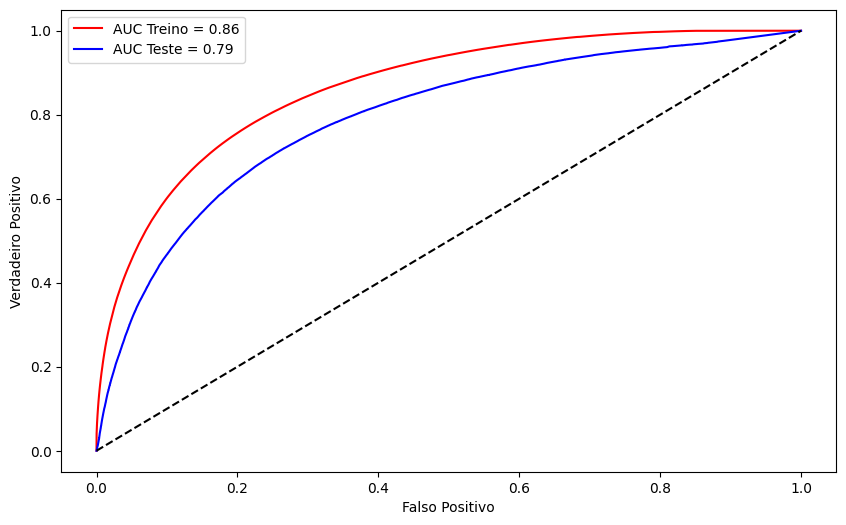

In [171]:
plt.figure(figsize=(10, 6))
plt.plot(fpr_train, tpr_train, color='red', label=f'AUC Treino = {auc_train:.2f}')
plt.plot(fpr_test, tpr_test, color='blue', label=f'AUC Teste = {auc_test:.2f}')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positivo')
#plt.title('Curva ROC')
plt.legend()
plt.show()

### Otimizador RandomizedSearchCV

### Carregar melhor random forest

In [172]:
#Melhor modelo com todos os dados
#with open('G:\\Meu Drive\\ciencia de dados\\Pos\\TCC\\TCC\\random_forest_final.pkl', 'rb') as file:
#    final_clf = pickle.load(file)

### Treino modelo RandomizedSearchCV

In [173]:
# #%% Definir o espaço de hiperparâmetros para Random Forest
# param_dist = {
#     'n_estimators': [50, 100, 200, 300],  # Número de árvores
#     'max_depth': range(2, 30, 1),      # Profundidade máxima das árvores
#     'min_samples_split': [2, 5, 10],      # Número mínimo de amostras para dividir um nó
#     'min_samples_leaf': [1, 2, 4],        # Número mínimo de amostras em uma folha
#     'max_features': ['sqrt', 'log2', None],  # Número de features consideradas para divisão (a raiz da amostra ou log da amostra)
#     'bootstrap': [True, False],           # Usar bootstrap ou não
#     'criterion': ['gini', 'entropy'],     # Critério de divisão
#     'ccp_alpha': np.linspace(0, 0.05, 20)  # Parâmetro de poda de complexidade de custo
# }

In [174]:
# kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [175]:
# #%% Configurar o RandomizedSearchCV
# n_iter = 50  # Número de combinações de hiperparâmetros a serem testadas
# kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # 5-Fold estratificado
# random_search = RandomizedSearchCV(
#     estimator=RandomForestClassifier(random_state=42),
#     param_distributions=param_dist,
#     n_iter=n_iter, #Quantidade de Interações
#     cv=kf, #Estratégia de validação cruzada definido anterioremente
#     scoring='roc_auc',
#     n_jobs=-1,  # Usar todos os núcleos do processador
#     verbose=1,  # Mostrar progresso
#     random_state=42
# )

In [176]:
# random_search.fit(X_train_dum, y_train)


In [177]:
# print(f"\nMelhores hiperparâmetros: {random_search.best_params_}")
# print(f"\nAUC média na validação cruzada: {random_search.best_score_:.4f}")

In [178]:
#%% Treinar o modelo final com os melhores hiperparâmetros
# final_clf = random_search.best_estimator_ #treina a arvores com os melhores parametros

### Avaliando modelo com RandomizedSearch

In [179]:
# Probabilidades da classe positiva
# y_probs_rf_best = final_clf.predict_proba(X_test_dum)[:, 1]

In [180]:
# Previsões binárias (threshold = 0.5)
# y_pred_rf_best = (y_probs_rf_best >= 0.5).astype(int)

In [181]:
# # Determinando medidas de desempenho do modelo
# acuracia_rf_best = accuracy_score(y_test, y_pred_rf_best)
# precisao_rf_best = precision_score(y_test, y_pred_rf_best)
# acuracia_balanceada_rf_best = balanced_accuracy_score(y_test, y_pred_rf_best)
# auc_rf_best = roc_auc_score(y_test, y_probs_rf_best)
# gini_rf_best = 2 * auc_rf_best - 1

In [182]:
# # Adicionando medidas de desempenho no dict_modelos
# dict_modelos['Modelo'].append('Random Forest Best')
# dict_modelos['Acuracia'].append(acuracia_rf_best)
# dict_modelos['Acuracia Balanceada'].append(acuracia_balanceada_rf_best)
# dict_modelos['AUC'].append(auc_rf_best)
# dict_modelos['GINI'].append(gini_rf_best)

In [183]:
# dict_modelos

### Curva ROC Random Forest com otimizador RandomizedSearchCV

In [184]:
# search_fpr_rf, search_tpr_rf, search_thresholds_rf = roc_curve(y_test, y_probs_rf_best)

In [185]:
# search_fpr_rf, search_tpr_rf, search_thresholds_rf = roc_curve(y_test, y_probs_rf_best)

# # Plotar a Curva ROC
# plt.figure(figsize=(8, 6))
# plt.plot(search_fpr_rf, search_tpr_rf, color='blue', label=f'Curva ROC (AUC = {auc_rf_best:.2f})')
# plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Linha de referência (modelo aleatório)
# plt.xlabel("Taxa de Falsos Positivos (FPR)")
# plt.ylabel("Taxa de Verdadeiros Positivos (TPR)")
# plt.title(f"Curva ROC - Random Forest")
# plt.legend(loc="lower right")
# plt.grid()
# plt.show()

### Salvando melhor modelo

In [186]:
# import pickle

In [ ]:
# Salva o melhor modelo
with open('G:\\Meu Drive\\ciencia de dados\\Pos\\TCC\\TCC\\random_forest_final.pkl', 'wb') as file:
    pickle.dump(final_clf, file)


In [ ]:
#Importância das variáveis baseada na diminuição da impureza do nó.
explainer_rf = shap.TreeExplainer(modelo_rf)
shap_values_rf = explainer_rf.shap_values(X_test_dum)
shap.summary_plot(shap_values_rf, X_test_dum, feature_names=X_test_dum.columns, plot_type="bar")

### Otimizador Bayes Search

Para entender a otimização BayesSearch, é necessário ter noções de inferencia bayesinana e de processos gaussianos.

A inferência bayesiana é um método estatístico que atualiza as probabilidades sobre um evento ou parâmetro à medida que novos dados são observadas. 
$$P(A|B)=\frac{P(B|A)\cdot P(A)}{P(B)}$$

onde, 


* $P(A|B)$ $\rightarrow$ Probabilidade posterior (crença atualizada após ver os dados).   
* $P(B|A)$ $\rightarrow$ Verossimilhança (probabilidade dos dados dado o modelo).   
* $P(A)$ $\rightarrow$ Probabilidade prior (crença inicial).
* $P(B)$ $\rightarrow$ Probabilidade marginal dos dados (normalização).


Por exemplo, para calcular qual é a probabilodade de uma pessoa ter uma doença após testar positivo, sabendo que 1% da população tem a doença, a chance de testar positivo caso a pessoa tenha a doença seja de 95% e a probabilidade total de testar positivo, mesmo os falso positivos.

* $P(B|A)=0.95$. Chance de positivo se estiver doente
* $P(A)=0.01$. Prevalença da doença na população
* $P(B)=0.95\cdot 0.01+ 0.05 \cdot 0.99$. Probabilidade total de testar positivo (incluindo falsos positivos) Probabilidade de testar positivo estando positivo ou probabilidade de testar positivo não estando positivo.




Processos Gaussianos fornecem previsões com incerteza,  são um método não paramétrico e probabilístico usado em aprendizado de máquina e estatística para modelar funções desconhecidas.

Por exemplo, para prever a temperatura ao longo de um dia, suponha que você tem algumas medições em certos horários (dados observados). Um Processo Gaussiano fornece não apenas uma previsão pontual, mas uma distribuição de probabilidade para a temperatura em qualquer horário futuro, considerando incerteza.



A combinação de inferência bayesiana com processos gaussianos gera a técnica de otimizaçã de hiperparâmetros chamada de BayesSearch.

Essa técnica combina inferência bayesiana e processos gaussianos para encontrar os melhores parâmetros de forma eficiente.

Comparada com Grid Search ou Random Search, essa técnica requer menos avaliações, pois prioriza regiões promissoras.

In [ ]:
from skopt import BayesSearchCV

In [ ]:
# Espaço de busca para os hiperparâmetros
param_space = {
    'n_estimators': (50, 200),  # Número de árvores
    'max_depth': (3, 20),       # Profundidade máxima
    'max_features': (['sqrt', 'log2']),  # Número de features consideradas
    'min_samples_split': (2, 10),  # Mínimo de amostras para dividir um nó
    'min_samples_leaf': (1, 5),    # Mínimo de amostras em uma folha
    'bootstrap': ([True, False]),  # Usar amostragem bootstrap?
    'criterion':(['gini', 'entropy']),  # Critério de divisão
}

In [ ]:
# Definir a busca Bayesiana
busca_bayes = BayesSearchCV(
    estimator=modelo_rf,
    search_spaces=param_space,
    n_iter=50,  # Número de iterações (combinações testadas)
    cv=5,       # Número de folds na validação cruzada
    scoring='roc_auc',  # Métrica de avaliação (pode ser 'accuracy', 'f1', etc.)
    n_jobs=-1,  # Usar todos os núcleos do CPU
    random_state=42,
    verbose=1   # Mostrar progresso
)

In [ ]:
busca_bayes.fit(X_train_dum, y_train)


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

BayesSearchCV(cv=5,
              estimator=RandomForestClassifier(n_estimators=50,
                                               random_state=42),
              n_jobs=-1, random_state=42, scoring='roc_auc',
              search_spaces={'bootstrap': [True, False],
                             'criterion': ['gini', 'entropy'],
                             'max_depth': (3, 20),
                             'max_features': ['sqrt', 'log2'],
                             'min_samples_leaf': (1, 5),
                             'min_samples_split': (2, 10),
                             'n_estimators': (50, 200)},
              verbose=1)

In [ ]:
# Melhores hiperparâmetros encontrados
print("Melhores hiperparâmetros:", busca_bayes.best_params_)

Melhores hiperparâmetros: OrderedDict({'bootstrap': True, 'criterion': 'entropy', 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 142})


In [ ]:
# Melhor score (AUC-ROC no caso)
print("Melhor AUC-ROC:", busca_bayes.best_score_)

Melhor AUC-ROC: 0.6291666666666667


In [ ]:
# Fazer previsões no teste com o melhor modelo
y_pred_proba_bayes = busca_bayes.predict_proba(X_test_dum)[:, 1]
auc_test_bayes = roc_auc_score(y_test, y_pred_proba_bayes)
print(f"AUC-ROC no teste: {auc_test_bayes:.4f}")

AUC-ROC no teste: 0.6732


In [ ]:
modelo_rf_bayes= busca_bayes.best_estimator_

In [ ]:
# Probabilidades da classe positiva
y_probs_rf_bayes = modelo_rf_bayes.predict_proba(X_test_dum)[:, 1]

In [ ]:
# Previsões binárias (threshold = 0.5)
y_pred_rf_bayes = (y_probs_rf_bayes >= 0.5).astype(int)

In [ ]:
# Determinando medidas de desempenho do modelo
acuracia_rf_bayes = accuracy_score(y_test, y_pred_rf_bayes)
precisao_rf_bayes = precision_score(y_test, y_pred_rf_bayes)
acuracia_balanceada_rf_bayes = balanced_accuracy_score(y_test, y_pred_rf_bayes)
auc_rf_bayes = roc_auc_score(y_test, y_probs_rf_bayes)
gini_rf_bayes = 2 * auc_rf_best - 1

c:\Users\prisc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
# Adicionando medidas de desempenho no dict_modelos
dict_modelos['Modelo'].append('Random Forest Bayes')
dict_modelos['Acuracia'].append(acuracia_rf_bayes)
dict_modelos['Acuracia Balanceada'].append(acuracia_balanceada_rf_bayes)
dict_modelos['AUC'].append(auc_rf_bayes)
dict_modelos['GINI'].append(gini_rf_bayes)

In [ ]:
pd.DataFrame(dict_modelos)

Modelo  Acuracia  Acuracia Balanceada       AUC      GINI
0     1ª Random Forest  0.784314             0.487805  0.636585  0.273171
1   Random Forest Best  0.803922             0.500000  0.620732  0.241463
2  Random Forest Bayes  0.803922             0.500000  0.673171  0.241463

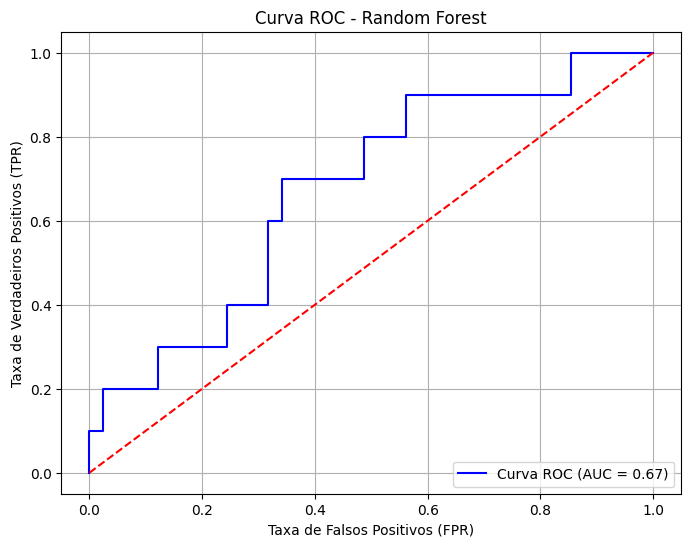

In [ ]:
bayes_fpr_rf, bayes_tpr_rf, bayes_thresholds_rf = roc_curve(y_test, y_probs_rf_bayes)

# Plotar a Curva ROC
plt.figure(figsize=(8, 6))
plt.plot(bayes_fpr_rf, bayes_tpr_rf, color='blue', label=f'Curva ROC (AUC = {auc_rf_bayes:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Linha de referência (modelo aleatório)
plt.xlabel("Taxa de Falsos Positivos (FPR)")
plt.ylabel("Taxa de Verdadeiros Positivos (TPR)")
plt.title(f"Curva ROC - Random Forest")
plt.legend(loc="lower right")
plt.grid()
plt.show()

### Agrupamento das Variáveis One-Hot

In [ ]:
colunas_renda = [col for col in presentes_df_enem_2023_dummies.columns if "RENDA".lower() in col.lower()]
colunas_faixa = [col for col in presentes_df_enem_2023_dummies.columns if "ETARIA".lower() in col.lower()]
colunas_regiao = [col for col in presentes_df_enem_2023_dummies.columns if "REGIAO".lower() in col.lower()]
colunas_paterna = [col for col in presentes_df_enem_2023_dummies.columns if "PATERNA".lower() in col.lower()]
colunas_materna = [col for col in presentes_df_enem_2023_dummies.columns if "MATERNA".lower() in col.lower()]




In [ ]:
colunas_dummies=['FAIXA_ETARIA', 
                'SEXO', 
                'COR', 
                'NACIONALIDADE',
                'REGIAO',       
                'ADM_ESC', 
                'TP_URBANA_RURAL', 
                'ESCOLARIDADE_PATERNA',       
                'ESCOLARIDADE_MATERNA', 
                'RENDA_FAMILIAR']

In [ ]:
presentes_df_enem_2023_dummies.columns

Index(['INSCRICAO', 'IS_TOP20', 'FAIXA_ETARIA_18', 'FAIXA_ETARIA_19',
       'FAIXA_ETARIA_20', 'FAIXA_ETARIA_21', 'FAIXA_ETARIA_22',
       'FAIXA_ETARIA_23', 'FAIXA_ETARIA_24', 'FAIXA_ETARIA_25',
       'FAIXA_ETARIA_26_30', 'FAIXA_ETARIA_31_35', 'FAIXA_ETARIA_36_40',
       'FAIXA_ETARIA_41_45', 'FAIXA_ETARIA_46_50', 'FAIXA_ETARIA_56_60',
       'SEXO_Masculino', 'COR_Branca', 'COR_Indígena', 'COR_Nao_declarado',
       'COR_Parda', 'COR_Preta',
       'NACIONALIDADE_Brasileiro_Nato_nascido_no_exterior',
       'NACIONALIDADE_Brasileiro_Naturalizado', 'NACIONALIDADE_Nao_informado',
       'REGIAO_Nordeste', 'REGIAO_Norte', 'REGIAO_Sudeste', 'REGIAO_Sul',
       'REGIAO_Desconhecido', 'ADM_ESC_Privada', 'ADM_ESC_Publica',
       'ADM_ESC_Desconhecido', 'TP_URBANA_RURAL_Desconhecido',
       'ESCOLARIDADE_PATERNA_9ano_incompleto',
       'ESCOLARIDADE_PATERNA_ensino_medio_completo',
       'ESCOLARIDADE_PATERNA_ensino_medio_incompleto',
       'ESCOLARIDADE_PATERNA_ensino_superior',
 

In [ ]:
# Cria um dict para agergar as colunas one-hot para a variável original
var_original = {
    'FAIXA_ETARIA': colunas_faixa, 
    'SEXO': ['SEXO_Masculino'], 
    'COR':['COR_Branca', 'COR_Indígena', 'COR_Nao_declarado', 'COR_Parda', 'COR_Preta'], 
    'NACIONALIDADE': ['NACIONALIDADE_Brasileiro_Nato_nascido_no_exterior', 'NACIONALIDADE_Brasileiro_Naturalizado', 'NACIONALIDADE_Nao_informado'] ,
    'REGIAO': colunas_regiao,       
    'ADM_ESC': ['ADM_ESC_Privada', 'ADM_ESC_Publica', 'ADM_ESC_Desconhecido'], 
    'TP_URBANA_RURAL': ['TP_URBANA_RURAL_Desconhecido'], 
    'ESCOLARIDADE_PATERNA': colunas_paterna,       
    'ESCOLARIDADE_MATERNA':colunas_materna, 
    'RENDA_FAMILIAR': colunas_renda   
}


### Shap Agregado

In [ ]:
explainer_rf_bayes = shap.TreeExplainer(modelo_rf_bayes)

In [ ]:
shap_values_rf_bayes = explainer_rf_bayes.shap_values(X_test_dum)
shap_values_rf_bayes


array([[[ 7.60991847e-03, -7.60991847e-03],
        [ 1.23404288e-03, -1.23404288e-03],
        [-2.39908207e-04,  2.39908207e-04],
        ...,
        [ 0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00],
        [-2.17508809e-02,  2.17508809e-02]],

       [[ 4.88876521e-03, -4.88876521e-03],
        [ 1.53442466e-03, -1.53442466e-03],
        [-6.68207518e-04,  6.68207518e-04],
        ...,
        [ 0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00],
        [ 2.63082511e-02, -2.63082511e-02]],

       [[ 5.95686535e-03, -5.95686535e-03],
        [ 7.93702276e-04, -7.93702276e-04],
        [-9.00194181e-05,  9.00194181e-05],
        ...,
        [ 0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00],
        [-1.58228971e-02,  1.58228971e-02]],

       ...,

       [[ 6.74361837e-03, -6.74361837e-03],
        [-3.47328725e-03,  3.47328725e-03],
        [-2.44252596e-04,  2.44252596e-04],
        ...,
     

In [ ]:
# Calcula a contribuição agregada por variável original
shap_agregado = {}
for var, cols in var_original.items():
    idx = [X_test_dum.columns.get_loc(c) for c in cols] #Enconta o index de cada 
    shap_agregado[var] = np.sum(np.abs(shap_values_rf_bayes).mean(0)[idx])


In [ ]:
shap_agregado

{'FAIXA_ETARIA': 0.03711418285717093,
 'SEXO': 0.02903946464406332,
 'COR': 0.04277361282395137,
 'NACIONALIDADE': 0.00013645826603973202,
 'REGIAO': 0.007661409795141615,
 'ADM_ESC': 0.005565297311128269,
 'TP_URBANA_RURAL': 0.004421299232165228,
 'ESCOLARIDADE_PATERNA': 0.028496096261772054,
 'ESCOLARIDADE_MATERNA': 0.02721437731269822,
 'RENDA_FAMILIAR': 0.056305838898315204}

In [ ]:
dict(sorted(shap_agregado.items(), key=lambda item: item[1], reverse=True))

{'RENDA_FAMILIAR': 0.056305838898315204,
 'COR': 0.04277361282395137,
 'FAIXA_ETARIA': 0.03711418285717093,
 'SEXO': 0.02903946464406332,
 'ESCOLARIDADE_PATERNA': 0.028496096261772054,
 'ESCOLARIDADE_MATERNA': 0.02721437731269822,
 'REGIAO': 0.007661409795141615,
 'ADM_ESC': 0.005565297311128269,
 'TP_URBANA_RURAL': 0.004421299232165228,
 'NACIONALIDADE': 0.00013645826603973202}

### Feature Importances Agregado

Importância das variáveis baseada na diminuição da impureza do nó.


In [ ]:
features = list(X_train_dum)
feature_importances = modelo_rf_bayes.feature_importances_
importances = pd.DataFrame(index=features)
importances['importance'] = feature_importances
importances['rank'] = importances['importance'].rank(ascending=False).values
importances.sort_values('rank').head(10)

importance  rank
RENDA_FAMILIAR_renda_ate_1320                   0.127243   1.0
COR_Branca                                      0.091324   2.0
SEXO_Masculino                                  0.079730   3.0
FAIXA_ETARIA_18                                 0.065752   4.0
ESCOLARIDADE_PATERNA_ensino_superior            0.053327   5.0
RENDA_FAMILIAR_renda_1980_2640                  0.035684   6.0
ESCOLARIDADE_MATERNA_ensino_medio_completo      0.033579   7.0
ESCOLARIDADE_PATERNA_ensino_medio_completo      0.029264   8.0
ESCOLARIDADE_MATERNA_ensino_medio_incompleto    0.029123   9.0
FAIXA_ETARIA_21                                 0.027407  10.0

In [ ]:
# Calcula a contribuição agregada por variável original
feature_importances_agregado = {}
for var, cols in var_original.items():
    idx = [X_test_dum.columns.get_loc(c) for c in cols] #Enconta o index de cada
    feature_importances_agregado[var] = np.sum(feature_importances[idx])


In [ ]:
feature_importances_agregado

{'FAIXA_ETARIA': 0.1938678183193855,
 'SEXO': 0.07973001464204583,
 'COR': 0.1371154050689308,
 'NACIONALIDADE': 0.0007568234938472815,
 'REGIAO': 0.04394489370926244,
 'ADM_ESC': 0.043126682286045485,
 'TP_URBANA_RURAL': 0.017864157394873428,
 'ESCOLARIDADE_PATERNA': 0.13446484218957608,
 'ESCOLARIDADE_MATERNA': 0.1289848415995914,
 'RENDA_FAMILIAR': 0.2201445212964419}

In [ ]:
dict(sorted(feature_importances_agregado.items(), key=lambda item: item[1], reverse=True))

{'RENDA_FAMILIAR': 0.2201445212964419,
 'FAIXA_ETARIA': 0.1938678183193855,
 'COR': 0.1371154050689308,
 'ESCOLARIDADE_PATERNA': 0.13446484218957608,
 'ESCOLARIDADE_MATERNA': 0.1289848415995914,
 'SEXO': 0.07973001464204583,
 'REGIAO': 0.04394489370926244,
 'ADM_ESC': 0.043126682286045485,
 'TP_URBANA_RURAL': 0.017864157394873428,
 'NACIONALIDADE': 0.0007568234938472815}

## LightGBM


In [ ]:
import lightgbm as lgbm
from skopt import BayesSearchCV

### Otimizador BayesSearch

In [ ]:
# Criando um classificador base
lgbm_clf = lgbm.LGBMClassifier(boosting_type='gbdt', 
                               objective='binary', 
                               random_state=42)

In [ ]:
# Criando o espaço de busca para o otimizador
param_grid = {
    'num_leaves': (20, 21),  # Número de folhas na árvore de decisão
    'max_depth': (3, 15),  # Profundidade máxima da árvore
    'learning_rate': (0.01, 0.3, 'log-uniform'),  # Taxa de aprendizado
    'n_estimators': (1, 3),  # Número de árvores
    'subsample': (0.5, 1.0),  # Proporção de amostras usadas em cada árvore
    'colsample_bytree': (0.5, 1.0),  # Fração de colunas a serem usadas por árvore
    'reg_alpha': (1e-5, 1.0, 'log-uniform'),  # Regularização L1
    'reg_lambda': (1e-5, 1.0, 'log-uniform'),  # Regularização L2
}

In [ ]:
# Criando o otimizador Bayesiano
bayes_search = BayesSearchCV(
    estimator=lgbm_clf,  # Modelo a ser otimizado
    search_spaces=param_grid,  # Espaço de busca definido acima
    scoring='roc_auc',  # Critério de seleção: Área sob a curva ROC (AUC)
    n_iter=10,  # Número de avaliações do modelo
    cv=3,  # Validação cruzada com 5 folds
    random_state=42,
    n_jobs=-1,  # Paralelização total dos cálculos
    verbose=0
)


In [ ]:
X_train.columns

Index(['FAIXA_ETARIA', 'SEXO', 'ESTADO_CIVIL', 'COR', 'NACIONALIDADE',
       'ST_CONCLUSAO', 'ANO_CONCLUSAO', 'MUNICIPIO', 'UF', 'ADM_ESC',
       'TP_URBANA_RURAL', 'ESCOLARIDADE_PATERNA', 'ESCOLARIDADE_MATERNA',
       'RENDA_FAMILIAR', 'POSSUI_DIARISTA', 'QTD_BANHEIROS', 'QTD_CARROS',
       'QTD_GELADEIRA', 'QTD_TV_COLORIDA', 'QTD_COMPUTADOR', 'ACESSO_INTERNET',
       'REGIAO'],
      dtype='object')

### Treinando o modelo

Será treinado o modelo com os melhores parâmetros escolhido pelo otimizador Bayesiano, excluindo variáveis relacionados com a faixa de renda salarial ('POSSUI_DIARISTA', 'QTD_BANHEIROS', 'QTD_CARROS',
       'QTD_GELADEIRA', 'QTD_TV_COLORIDA', 'QTD_COMPUTADOR', 'ACESSO_INTERNET')

In [ ]:
# Treinando o modelo
bayes_search.fit(X_train_red), y_train)

[LightGBM] [Info] Number of positive: 42, number of negative: 160
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007186 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 101
[LightGBM] [Info] Number of data points in the train set: 202, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.207921 -> initscore=-1.337504
[LightGBM] [Info] Start training from score -1.337504
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


BayesSearchCV(cv=3,
              estimator=LGBMClassifier(objective='binary', random_state=42),
              n_iter=10, n_jobs=-1, random_state=42, scoring='roc_auc',
              search_spaces={'colsample_bytree': (0.5, 1.0),
                             'learning_rate': (0.01, 0.3, 'log-uniform'),
                             'max_depth': (3, 15), 'n_estimators': (1, 3),
                             'num_leaves': (20, 21),
                             'reg_alpha': (1e-05, 1.0, 'log-uniform'),
                             'reg_lambda': (1e-05, 1.0, 'log-uniform'),
                             'subsample': (0.5, 1.0)})

In [ ]:
# Melhores estimadores usando o otimizador Bayes
best_model_bayes = bayes_search.best_estimator_
best_model_bayes


LGBMClassifier(colsample_bytree=0.9186941777766422,
               learning_rate=0.2017268796559709, max_depth=7, n_estimators=3,
               num_leaves=21, objective='binary', random_state=42,
               reg_alpha=2.0491073175135938e-05,
               reg_lambda=4.915216946847741e-05, subsample=0.676793698814209)

### Avaliando o modelo com melhores parâmetros

In [ ]:
# Probabilidades da classe positiva
y_probs_lgbm = best_model_bayes.predict_proba(X_test.drop(columns=['POSSUI_DIARISTA', 'QTD_BANHEIROS', 'QTD_CARROS','QTD_GELADEIRA', 'QTD_TV_COLORIDA', 'QTD_COMPUTADOR', 'ACESSO_INTERNET']))[:, 1]

In [ ]:
# Previsões binárias (threshold = 0.5)
y_pred_lgbm = (y_probs_lgbm >= 0.5).astype(int)

In [ ]:
# Determinando medidas de desempenho do modelo
acuracia_lgbm = accuracy_score(y_test, y_pred_lgbm)
precisao_lgbm = precision_score(y_test, y_pred_lgbm)
acuracia_balanceada_lgbm = balanced_accuracy_score(y_test, y_pred_lgbm)
auc_lgbm = roc_auc_score(y_test, y_probs_lgbm)
gini_lgbm = 2 * auc_lgbm - 1


c:\Users\prisc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
# Adicionando medidas de desempenho no dict_modelos
dict_modelos['Modelo'].append('LightGBM')
dict_modelos['Acuracia'].append(acuracia_lgbm)
dict_modelos['Acuracia Balanceada'].append(acuracia_balanceada_lgbm)
dict_modelos['AUC'].append(auc_lgbm)
dict_modelos['GINI'].append(gini_lgbm)

In [ ]:
dict_modelos

{'Modelo': ['1ª Random Forest',
  'Random Forest Best',
  'Random Forest Bayes',
  'LightGBM',
  'LightGBM'],
 'Acuracia': [0.7843137254901961,
  0.803921568627451,
  0.803921568627451,
  0.803921568627451,
  0.803921568627451],
 'Acuracia Balanceada': [0.4878048780487805, 0.5, 0.5, 0.5, 0.5],
 'AUC': [0.6365853658536585,
  0.6207317073170732,
  0.6731707317073171,
  0.5695121951219512,
  0.6585365853658537],
 'GINI': [0.2731707317073171,
  0.24146341463414633,
  0.24146341463414633,
  0.13902439024390234,
  0.3170731707317074]}

### Curva Roc LightGBM

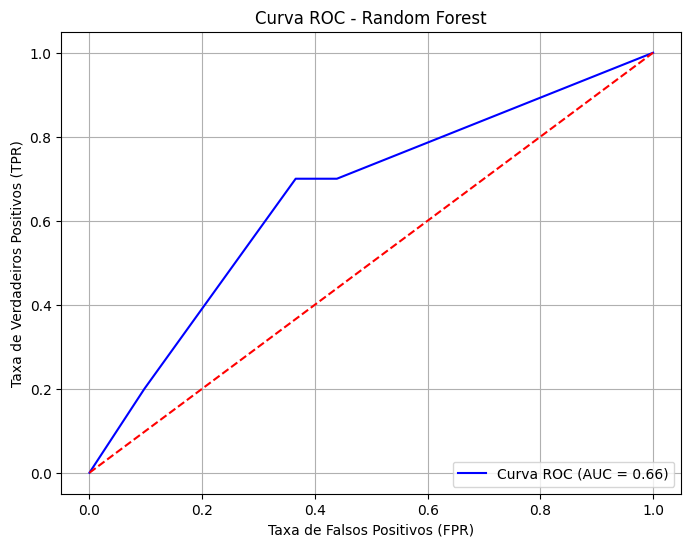

In [ ]:
bayes_fpr_lgbm, bayes_tpr_lgbm, bayes_thresholds_lgbm = roc_curve(y_test, y_probs_lgbm)

# Plotar a Curva ROC
plt.figure(figsize=(8, 6))
plt.plot(bayes_fpr_lgbm, bayes_tpr_lgbm, color='blue', label=f'Curva ROC (AUC = {auc_lgbm:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Linha de referência (modelo aleatório)
plt.xlabel("Taxa de Falsos Positivos (FPR)")
plt.ylabel("Taxa de Verdadeiros Positivos (TPR)")
plt.title(f"Curva ROC - Random Forest")
plt.legend(loc="lower right")
plt.grid()
plt.show()

### Importância das variáveis

In [ ]:
importance_lgbm = best_model_bayes.feature_importances_
importance_lgbm


array([0, 3, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0])

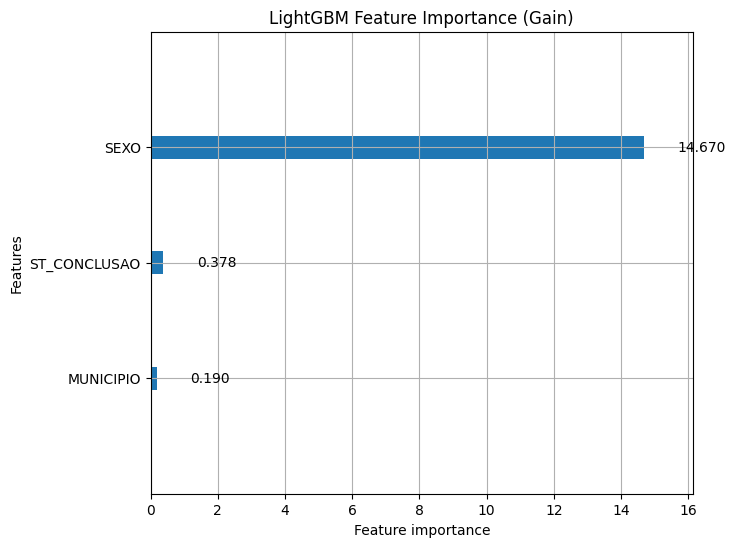

In [ ]:
lgbm.plot_importance(best_model_bayes, importance_type="gain", figsize=(7,6), title="LightGBM Feature Importance (Gain)")
plt.show()

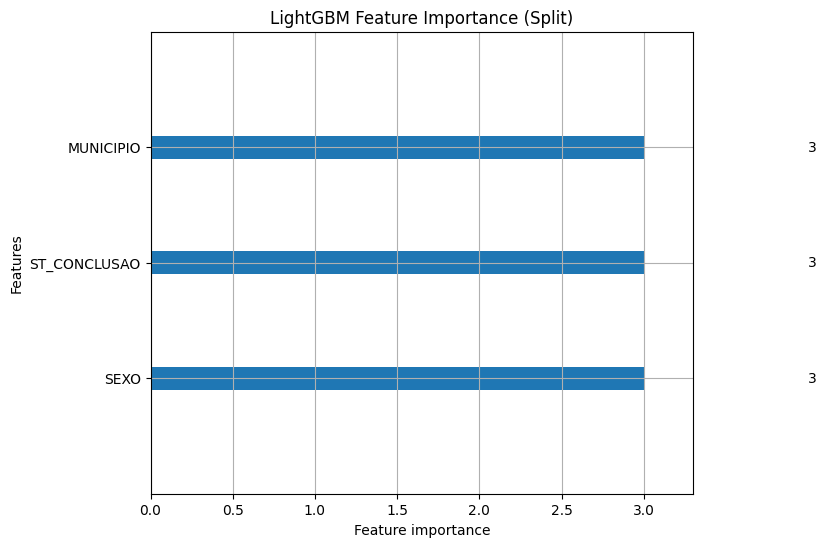

In [ ]:
lgbm.plot_importance(best_model_bayes, importance_type="split", figsize=(7,6), title="LightGBM Feature Importance (Split)")
plt.show()

### SHAP

In [ ]:
import shap

In [ ]:
explainer_lgbm = shap.TreeExplainer(best_model_bayes)

In [ ]:
shap_values_lgbm = explainer_lgbm(X_test.drop(columns=['POSSUI_DIARISTA', 'QTD_BANHEIROS', 'QTD_CARROS',
       'QTD_GELADEIRA', 'QTD_TV_COLORIDA', 'QTD_COMPUTADOR', 'ACESSO_INTERNET']))

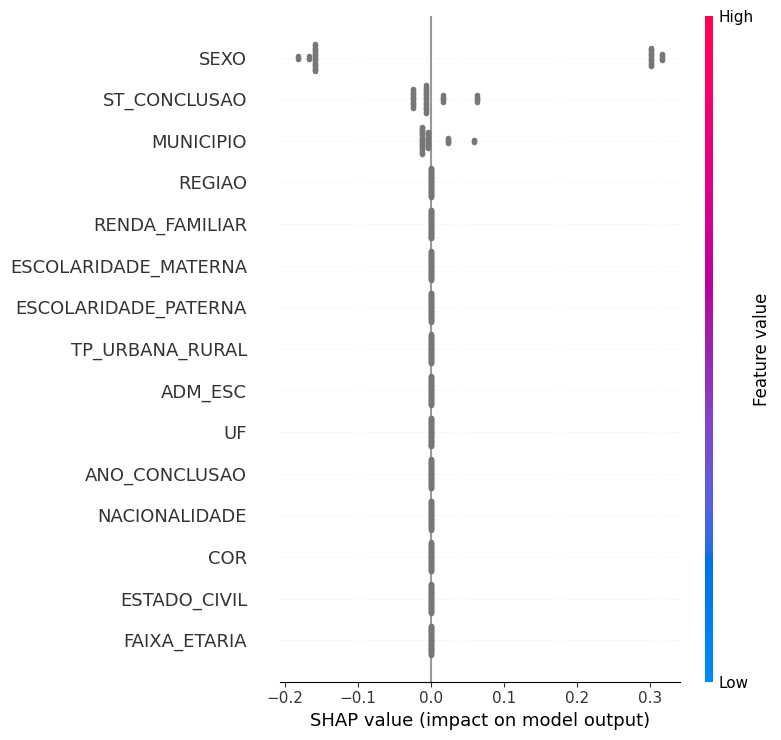

In [ ]:
shap.summary_plot(shap_values_lgbm, X_test.drop(columns=['POSSUI_DIARISTA', 'QTD_BANHEIROS', 'QTD_CARROS', 'QTD_GELADEIRA', 'QTD_TV_COLORIDA', 'QTD_COMPUTADOR', 'ACESSO_INTERNET']))


In [ ]:
print("Mínimo SHAP:", np.min(shap_values_lgbm.values))
print("Máximo SHAP:", np.max(shap_values_lgbm.values))

Mínimo SHAP: -0.1826234247775795
Máximo SHAP: 0.31615607899849796


## XGBoosting

In [ ]:
import xgboost as xgb
from xgboost import plot_importance


### Treinando o modelo

In [ ]:
colunas=X.columns.to_list()
colunas

['FAIXA_ETARIA',
 'SEXO',
 'ESTADO_CIVIL',
 'COR',
 'NACIONALIDADE',
 'ST_CONCLUSAO',
 'ANO_CONCLUSAO',
 'MUNICIPIO',
 'UF',
 'ADM_ESC',
 'TP_URBANA_RURAL',
 'ESCOLARIDADE_PATERNA',
 'ESCOLARIDADE_MATERNA',
 'RENDA_FAMILIAR',
 'POSSUI_DIARISTA',
 'QTD_BANHEIROS',
 'QTD_CARROS',
 'QTD_GELADEIRA',
 'QTD_TV_COLORIDA',
 'QTD_COMPUTADOR',
 'ACESSO_INTERNET',
 'REGIAO']

### Otimizador BayesSearch

In [ ]:
# Espaço de busca para os hiperparâmetros para otimização bayesiana
param_space_bayes_xgb = {'learning_rate': (0.01, 0.3, 'log-uniform'),
    'max_depth': (3, 10),
    'min_child_weight': (1, 10),
    'subsample': (0.5, 1.0),
    'colsample_bytree': (0.5, 1.0),
    'gamma': (0, 0.5),
    'n_estimators': (50, 300),
    'reg_alpha': (0, 10),
    'reg_lambda': (0, 10)
}

In [ ]:
# Criar o modelo XGBoost
xgb_model_bayes = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', random_state=42, enable_categorical=True,
    tree_method='hist')

# tree_method='hist' -> Necessário para enable_categorical
# enable_categorical=True -> Habilita suporte a categorias

In [ ]:
# Configurar o Bayesian Search
otimizador_bayes = BayesSearchCV(
    estimator=xgb_model_bayes,
    search_spaces=param_space_bayes_xgb,
    n_iter=50,  # Número de iterações de otimização
    cv=5,       # Número de folds na validação cruzada
    n_jobs=-1,  # Usar todos os cores disponíveis
    random_state=42,
    verbose=1
)

In [ ]:
# Executar a otimização
otimizador_bayes.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

BayesSearchCV(cv=5,
              estimator=XGBClassifier(base_score=None, booster=None,
                                      callbacks=None, colsample_bylevel=None,
                                      colsample_bynode=None,
                                      colsample_bytree=None, device=None,
                                      early_stopping_rounds=None,
                                      enable_categorical=True,
                                      eval_metric='logloss', feature_types=None,
                                      gamma=None, grow_policy=None,
                                      importance_type=None,
                                      interaction_constraints=None,
                                      learning_rate=...
                                      multi_strategy=None, n_estimators=None,
                                      n_jobs=None, num_parallel_tree=None,
                                      random_state=42, ...),
              n_jobs=-1, random_state=42,
              search_spaces={'colsample_bytree': (0.5, 1.0), 'gamma': (0, 0.5),
                             'learning_rate': (0.01, 0.3, 'log-uniform'),
                             'max_depth': (3, 10), 'min_child_weight': (1, 10),
                             'n_estimators': (50, 300), 'reg_alpha': (0, 10),
                             'reg_lambda': (0, 10), 'subsample': (0.5, 1.0)},
              verbose=1)

In [ ]:
# Melhores parâmetros encontrados
print("Melhores parâmetros encontrados: ", otimizador_bayes.best_estimator_)

Melhores parâmetros encontrados:  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9411269898510659, device=None,
              early_stopping_rounds=None, enable_categorical=True,
              eval_metric='logloss', feature_types=None,
              gamma=0.03708615353064707, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.019311259783029878,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)


### Avaliando o modelo

In [ ]:
# Probabilidades da classe positiva
y_probs_xg_bayes= otimizador_bayes.predict_proba(X_test)[:, 1]

In [ ]:
y_probs_xg_bayes

array([0.32687718, 0.10276927, 0.11496192, 0.14491953, 0.16501862,
       0.11188866, 0.12021425, 0.11774161, 0.23809417, 0.09857208,
       0.2692517 , 0.21632986, 0.08005723, 0.42423975, 0.35746178,
       0.39510044, 0.14711362, 0.1102016 , 0.38747832, 0.5286946 ,
       0.06260821, 0.22252063, 0.46516052, 0.16682242, 0.38702086,
       0.36511222, 0.27762234, 0.09324795, 0.086693  , 0.07098922,
       0.10242254, 0.10404936, 0.27497685, 0.12372582, 0.09550025,
       0.09873738, 0.12591825, 0.14743184, 0.50133216, 0.32305425,
       0.23890042, 0.13404375, 0.18905853, 0.09730057, 0.19520485,
       0.25207302, 0.15280987, 0.13829732, 0.0972101 , 0.16495235,
       0.09864869], dtype=float32)

In [ ]:
# Fazer previsões com o melhor modelo (Considerando threshold=0.5)
y_pred_xg_bayes = otimizador_bayes.predict(X_test)
y_pred_xg_bayes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0])

In [ ]:
# Determinando medidas de desempenho do modelo
acuracia_xg_bayes = accuracy_score(y_test, y_pred_xg_bayes)
precisao_xg_bayes= precision_score(y_test, y_pred_xg_bayes)
acuracia_balanceada_xg_bayes = balanced_accuracy_score(y_test, y_pred_xg_bayes)
auc_xg_bayes = roc_auc_score(y_test, y_probs_xg_bayes)
gini_xg_bayes = 2 * auc_xg_bayes - 1

In [ ]:
# Adicionando medidas de desempenho no dict_modelos
dict_modelos['Modelo'].append('XGBoost - Bayes')
dict_modelos['Acuracia'].append(acuracia_xg_bayes)
dict_modelos['Acuracia Balanceada'].append(acuracia_balanceada_xg_bayes)
dict_modelos['AUC'].append(auc_xg_bayes)
dict_modelos['GINI'].append(gini_xg_bayes)

In [ ]:
# Calcular as classificações preditas
y_probs_xg_bayes = model_xg_bayes.predict(X_test) #Probabilidade de ser classificado como 1
y_pred_xg_bayes = (y_probs_xg_bayes > 0.5).astype(int) #Se probabilidade >0.5 classifica como 1, senão, como 0


51

In [ ]:
pd.DataFrame(dict_modelos)

Modelo  Acuracia  Acuracia Balanceada       AUC      GINI
0     1ª Random Forest  0.784314             0.487805  0.636585  0.273171
1   Random Forest Best  0.803922             0.500000  0.620732  0.241463
2  Random Forest Bayes  0.803922             0.500000  0.673171  0.241463
3             LightGBM  0.803922             0.500000  0.569512  0.139024
4             LightGBM  0.803922             0.500000  0.658537  0.317073
5              XGBoost  0.803922             0.500000  0.551220  0.102439
6              XGBoost  0.803922             0.500000  0.551220  0.102439
7      XGBoost - Bayes  0.803922             0.537805  0.629268  0.258537

### Curva ROC - XgBoost - Otimizador Bayesiano

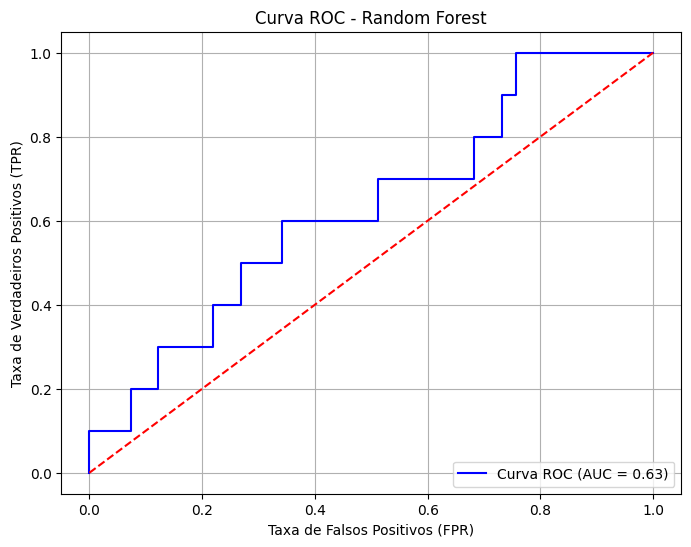

In [ ]:
bayes_fpr_xg_bayes, bayes_tpr_xg_bayes, bayes_thresholds_xg_bayes = roc_curve(y_test, y_probs_xg_bayes)

# Plotar a Curva ROC
plt.figure(figsize=(8, 6))
plt.plot(bayes_fpr_xg_bayes, bayes_tpr_xg_bayes, color='blue', label=f'Curva ROC (AUC = {auc_xg_bayes:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Linha de referência (modelo aleatório)
plt.xlabel("Taxa de Falsos Positivos (FPR)")
plt.ylabel("Taxa de Verdadeiros Positivos (TPR)")
plt.title(f"Curva ROC - Random Forest")
plt.legend(loc="lower right")
plt.grid()
plt.show()

### Importância das variáveis

In [ ]:
modelo_xg_bayes=otimizador_bayes.best_estimator_

In [ ]:
# Ver os tipos de importância disponíveis
melhores_features_xg_bayes_weight=modelo_xg_bayes.get_booster().get_score(importance_type='weight')
melhores_features_xg_bayes_gain=modelo_xg_bayes.get_booster().get_score(importance_type='gain')
melhores_features_xg_bayes_cover=modelo_xg_bayes.get_booster().get_score(importance_type='cover')

<Figure size 1000x800 with 0 Axes>

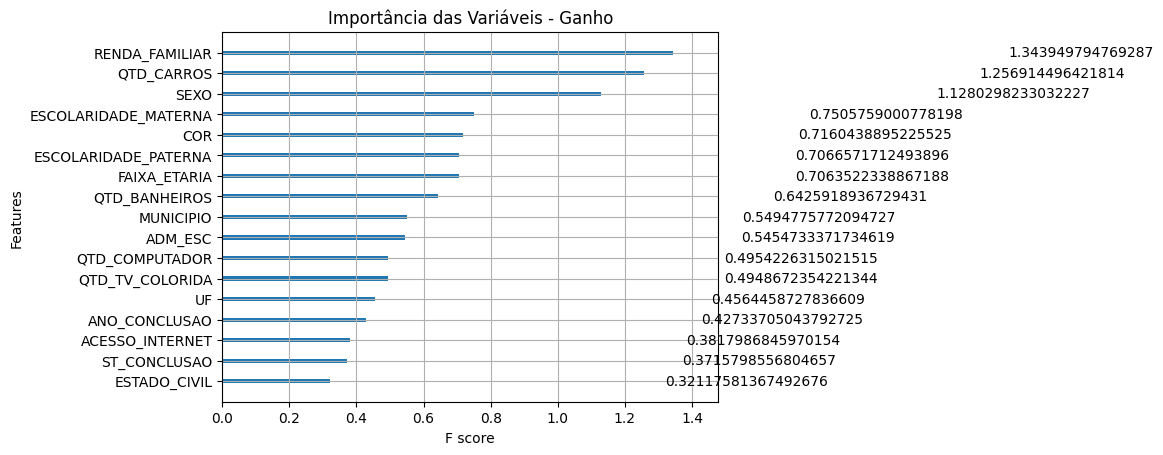

In [ ]:
# Plotar importância baseada no ganho (mais comum)
plt.figure(figsize=(10, 8))
plot_importance(modelo_xg_bayes, importance_type='gain', max_num_features=20)
plt.title('Importância das Variáveis - Ganho')
plt.show()

<Figure size 1000x800 with 0 Axes>

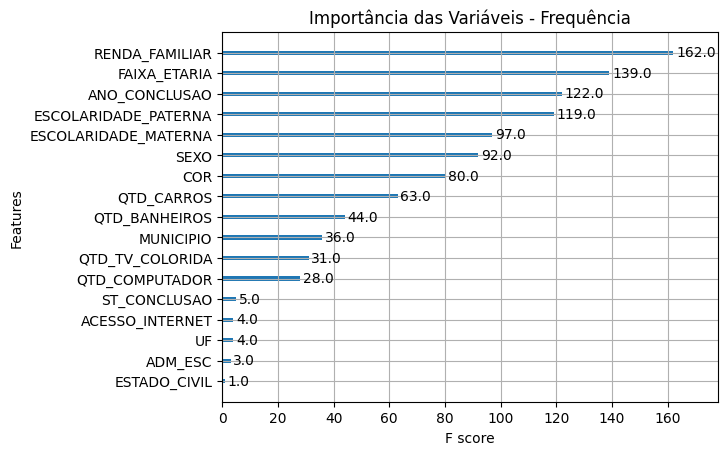

In [ ]:
# Plotar importância baseada no peso (frequência)
plt.figure(figsize=(10, 8))
plot_importance(modelo_xg_bayes, importance_type='weight', max_num_features=20)
plt.title('Importância das Variáveis - Frequência')
plt.show()

<Figure size 1000x800 with 0 Axes>

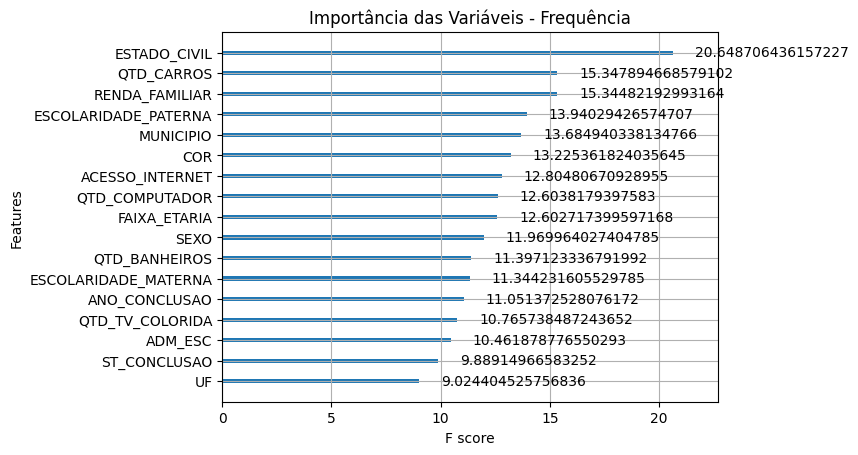

In [ ]:
# Plotar importância baseada no cover
plt.figure(figsize=(10, 8))
plot_importance(modelo_xg_bayes, importance_type='cover', max_num_features=20)
plt.title('Importância das Variáveis - Frequência')
plt.show()

### Shapley

In [ ]:
import shap
shap.initjs()

In [ ]:
explainer_xg = shap.TreeExplainer(modelo_xg_bayes)

In [ ]:
explanation_xg = explainer_xg(X_test)


In [ ]:
print(explanation_xg)

.values =
array([[-1.03341408e-01,  3.15447003e-01,  2.35453699e-04, ...,
         3.53191420e-02, -1.81817252e-03,  0.00000000e+00],
       [-1.79154053e-01,  1.87965885e-01,  1.19748329e-04, ...,
         2.74537839e-02, -2.42759148e-03,  0.00000000e+00],
       [-1.02887405e-02, -1.13683313e-01, -1.85464777e-03, ...,
        -1.76515281e-02, -3.50562646e-03,  0.00000000e+00],
       ...,
       [ 1.99069940e-02,  1.98472738e-01,  1.24875820e-04, ...,
        -1.93814468e-02, -2.98560644e-03,  0.00000000e+00],
       [ 8.60322174e-03, -1.54196516e-01,  2.18514731e-04, ...,
         1.09200887e-02, -1.80039124e-03,  0.00000000e+00],
       [-1.12957396e-01, -1.20762527e-01,  2.35453699e-04, ...,
        -2.71124765e-02, -2.98560644e-03,  0.00000000e+00]], dtype=float32)

.base_values =
array([-1.3304015, -1.3304015, -1.3304015, -1.3304015, -1.3304015,
       -1.3304015, -1.3304015, -1.3304015, -1.3304015, -1.3304015,
       -1.3304015, -1.3304015, -1.3304015, -1.3304015, -1.3304015,
 

In [ ]:
shap_features=explanation_xg.feature_names

In [ ]:
shap_values = explanation_xg.values
shap_values

array([[-1.03341408e-01,  3.15447003e-01,  2.35453699e-04, ...,
         3.53191420e-02, -1.81817252e-03,  0.00000000e+00],
       [-1.79154053e-01,  1.87965885e-01,  1.19748329e-04, ...,
         2.74537839e-02, -2.42759148e-03,  0.00000000e+00],
       [-1.02887405e-02, -1.13683313e-01, -1.85464777e-03, ...,
        -1.76515281e-02, -3.50562646e-03,  0.00000000e+00],
       ...,
       [ 1.99069940e-02,  1.98472738e-01,  1.24875820e-04, ...,
        -1.93814468e-02, -2.98560644e-03,  0.00000000e+00],
       [ 8.60322174e-03, -1.54196516e-01,  2.18514731e-04, ...,
         1.09200887e-02, -1.80039124e-03,  0.00000000e+00],
       [-1.12957396e-01, -1.20762527e-01,  2.35453699e-04, ...,
        -2.71124765e-02, -2.98560644e-03,  0.00000000e+00]], dtype=float32)

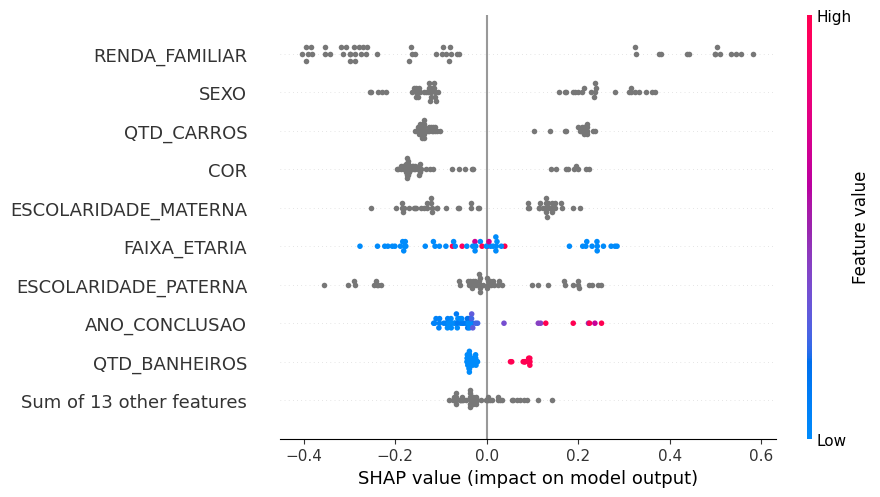

In [ ]:
#Qual impacto cada variável tem na saída do modelo para indivíduos no conjunto de dados de validação
shap.plots.beeswarm(explanation_xg)

Observe que RENDA_FAMILIAR é a variável com a maior importância, indicando que a renda familiar tem um impacto significativo na análise realizada. Isso sugere que questões socioeconômicas são determinantes no contexto estudado.

A segunda variável mais importante é SEXO, isto pode indicar diferenças significativas entre gêneros nos dados analisados.

QTD_CARROS: Também tem relevância considerável, possivelmente relacionada ao poder aquisitivo ou estilo de vida.

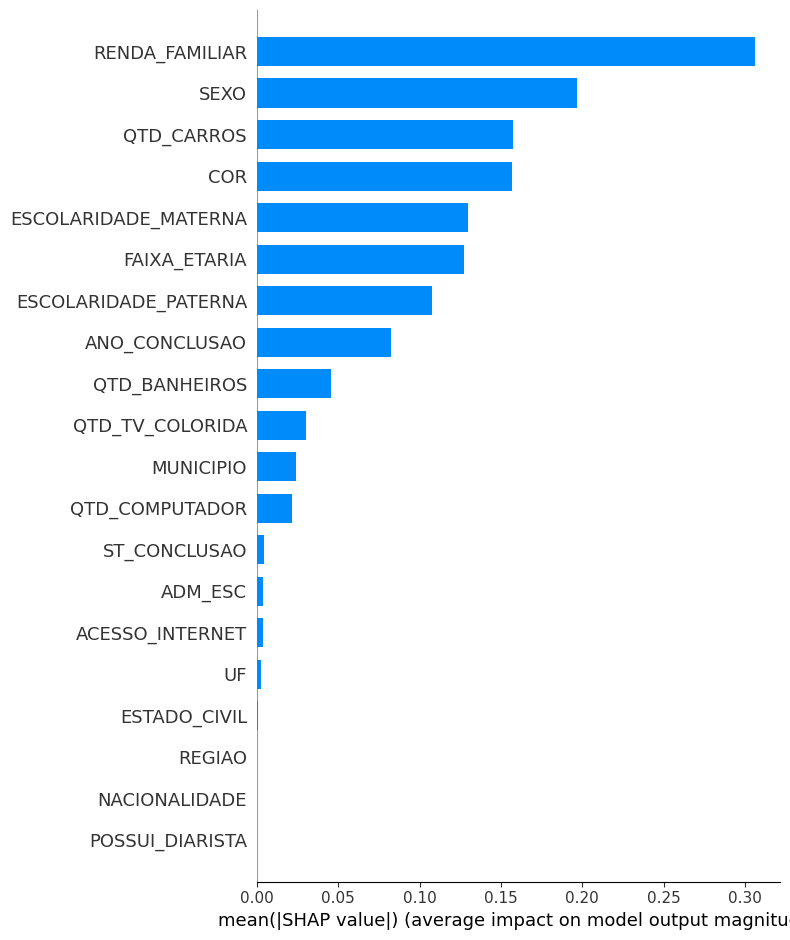

In [ ]:
shap.summary_plot(shap_values, X, plot_type="bar")